<h1 style="text-align: center; font-size: 40px;">BANK'S CHURN MODELLING</h1>

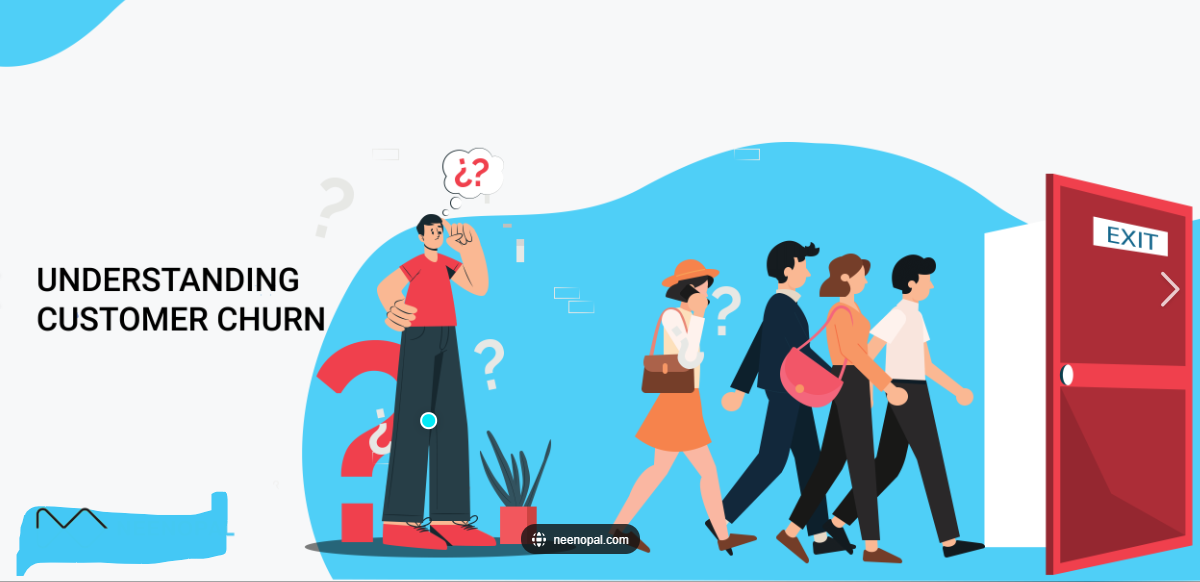

<h1 style="text-align: right; font-size: 12px;">By - Bindiya Singh </h1>
<h1 style="text-align: right; font-size: 12px;">Submission Date - 05th March 2024 </h1>

# Introduction

Retaining customers has become a top problem for financial institutions in today's cutthroat banking sector. Customer churn, the phenomena where customers switch banks, has a big impact on banks' profitability, market share, and long-term viability. For banks looking to lower churn rates and enhance customer retention tactics, understanding the undelying causes of customer churn and developing efficient predictive models to identify at-risk customers have become critical.

The aim of this project is to analyze bank customer churn and investigate the key drivers behind it. We strive to obtain insight into the reasons that impact consumers' decisions to leave their present bank by looking at a variety of aspects including customer demographics, banking behavior, and service related factors. In addition, we will explore the viability of predictive modeling methods to forecast customer churn and create a precise prediction model for early detection of probable churners.

By delving into this subject matter, we aspire to provide valuable recommendations that can empower banks to proactively retain their customers and foster long-term relationships in an ever-evolving financial landscape.

## Table of Contents

Business Goal<br>
Description of Dataset<br>
Preprocessing and Data Analysis<br>
Univariate Analysis<br>
Bivariate Analysis<br>
Multivariate Analysis<br>
Encoding<br>
Scaling Data<br>
Model Building<br>
Model Evaluation<br>
Prediction<br>
Recommendations<br>
Conclusion<br>

**Business Problem :**<br>ABC Multistate Bank is concerned about customers leaving their banking services. 

**Business Goal**:<br>The goal of this analysis is to create a model that returns the probability of a customer to churn. This prediction will help the bank proactively engage with at-risk customers, provide better services, and ultimately reduce customer churn.

The dataset in this notebook is downloaded from kaggle <a href='https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling' target='_blank'>here</a>.

## Description of Dataset

The dataset has 10000 obeservations and 14 variables 

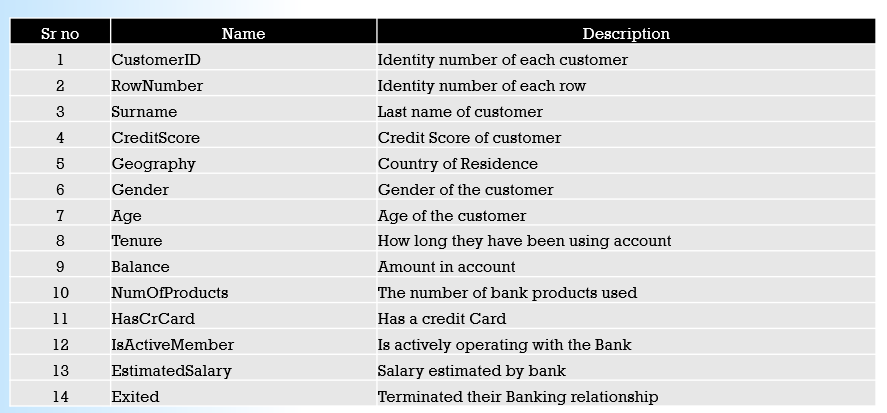

# Importing the libraries

In [95]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats as stats

from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

import math

from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report,f1_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.neighbors import LocalOutlierFactor

from sklearn.feature_selection import RFE

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import SGDClassifier

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier


from sklearn.dummy import DummyClassifier


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

pd.options.display.float_format = "{:.2f}".format

from sklearn.decomposition import PCA

##KNN-
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans

##from lazypredict.Supervised import LazyClassifier

from scipy.stats import chi2_contingency

from sklearn.ensemble import RandomForestClassifier
import xgboost
from sklearn.svm import SVC

from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors

from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, RocCurveDisplay

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
sns.set()
warnings.simplefilter('ignore')

**Getting the data**

In [97]:
data = pd.read_csv('churn.csv')
df = data.copy()
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure   Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2      0.00              1          1               1   
1       1  83807.86              1          0               1   
2       8 159660.80              3          1               0   
3       1      0.00              2          0               0   
4       2 125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [98]:
df.shape

(10000, 14)

In [99]:
df.describe()

RowNumber  CustomerId  CreditScore      Age   Tenure   Balance  \
count   10000.00    10000.00     10000.00 10000.00 10000.00  10000.00   
mean     5000.50 15690940.57       650.53    38.92     5.01  76485.89   
std      2886.90    71936.19        96.65    10.49     2.89  62397.41   
min         1.00 15565701.00       350.00    18.00     0.00      0.00   
25%      2500.75 15628528.25       584.00    32.00     3.00      0.00   
50%      5000.50 15690738.00       652.00    37.00     5.00  97198.54   
75%      7500.25 15753233.75       718.00    44.00     7.00 127644.24   
max     10000.00 15815690.00       850.00    92.00    10.00 250898.09   

       NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary   Exited  
count       10000.00   10000.00        10000.00         10000.00 10000.00  
mean            1.53       0.71            0.52        100090.24     0.20  
std             0.58       0.46            0.50         57510.49     0.40  
min             1.00       0.00            0.00            11.58     0.00  
25%             1.00       0.00            0.00         51002.11     0.00  
50%             1.00       1.00            1.00        100193.91     0.00  
75%             2.00       1.00            1.00        149388.25     0.00  
max             4.00       1.00            1.00        199992.48     1.00

In [100]:
df.describe(include='O')

Surname Geography Gender
count    10000     10000  10000
unique    2932         3      2
top      Smith    France   Male
freq        32      5014   5457

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### Analyzing Duplicate Values 

In [102]:
df.duplicated().sum()

0

### Analyzing Missing Values 

In [103]:
df.isnull().sum().to_frame('No. of Nulls')

No. of Nulls
RowNumber                   0
CustomerId                  0
Surname                     0
CreditScore                 0
Geography                   0
Gender                      0
Age                         0
Tenure                      0
Balance                     0
NumOfProducts               0
HasCrCard                   0
IsActiveMember              0
EstimatedSalary             0
Exited                      0

In [104]:
df_original=df[:]

### Dropping Irrelevant Features

In [105]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
df.head()

CreditScore Geography  Gender  Age  Tenure   Balance  NumOfProducts  \
0          619    France  Female   42       2      0.00              1   
1          608     Spain  Female   41       1  83807.86              1   
2          502    France  Female   42       8 159660.80              3   
3          699    France  Female   39       1      0.00              2   
4          850     Spain  Female   43       2 125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

In [106]:
df.dtypes.to_frame('Data Type')

Data Type
CreditScore         int64
Geography          object
Gender             object
Age                 int64
Tenure              int64
Balance           float64
NumOfProducts       int64
HasCrCard           int64
IsActiveMember      int64
EstimatedSalary   float64
Exited              int64

Okay, data is clean and not null. Let's move towards Exploratory Data Analysis.

<div style="padding: 10px; font-size: 30px;text-align: center;font-weight: bold;">
Exploratory Data Analysis
</div>

## Univariate Analysis
Response variable: **Exited**

### Geography

In [107]:
df.Geography.value_counts(normalize=True)*100

Geography
France    50.14
Germany   25.09
Spain     24.77
Name: proportion, dtype: float64

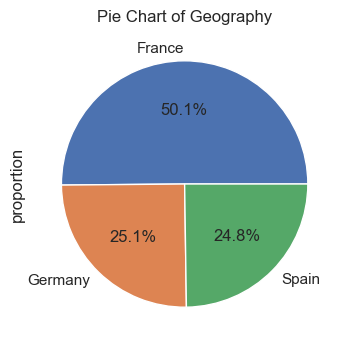

In [108]:
plt.figure(figsize=(5,4))
(df.Geography.value_counts(normalize=True) * 100).plot.pie(autopct='%.1f%%', startangle=0)
plt.title('Pie Chart of Geography')
plt.show()

**Comments:<br>
From the above visualization , we can see that 50% of the customers belong to France , 25% to Germany and rest belong to Spain** 

### Gender

In [109]:
df.Gender.value_counts(normalize=True)*100

Gender
Male     54.57
Female   45.43
Name: proportion, dtype: float64

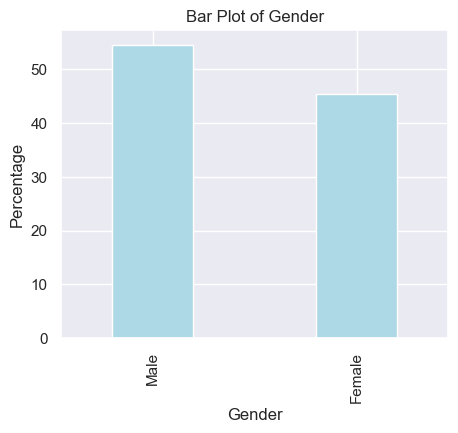

In [110]:
plt.figure(figsize=(5,4))
(df.Gender.value_counts(normalize=True)*100).plot.bar(color='lightblue',width=0.4)
plt.title('Bar Plot of Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.show()

**Comment:<br>
In our dataset , we have more male customers than female which makes 54% of the total.**

### NumOfProducts

In [111]:
df.NumOfProducts.value_counts(normalize=True)*100

NumOfProducts
1   50.84
2   45.90
3    2.66
4    0.60
Name: proportion, dtype: float64

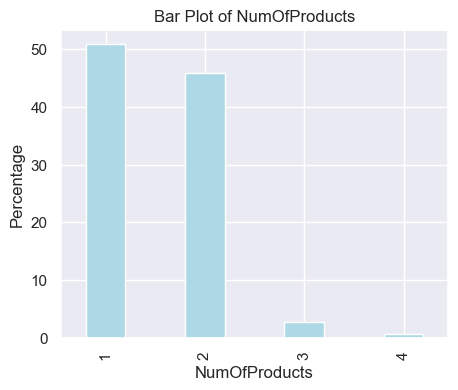

In [112]:
plt.figure(figsize=(5,4))
(df.NumOfProducts.value_counts(normalize=True)*100).plot.bar(color='lightblue',width=0.4)
plt.title('Bar Plot of NumOfProducts')
plt.xlabel('NumOfProducts')
plt.ylabel('Percentage')
plt.show()

**Comments:<br>
The majority of customers (about 51%) have one product , followed by approximately 46% of customers who have two products. Only a small percentage of customers have three or four products, with 3% having three products and less than 1% having four products.**

### HasCrCard

In [113]:
df.HasCrCard.value_counts(normalize=True)*100

HasCrCard
1   70.55
0   29.45
Name: proportion, dtype: float64

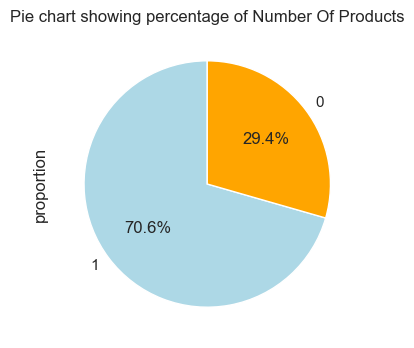

In [114]:
plt.figure(figsize=(5,4))
(df['HasCrCard'].value_counts(normalize=True) * 100).plot.pie(autopct='%.1f%%', startangle=90, colors=['lightblue', 'orange'])
plt.title('Pie chart showing percentage of Number Of Products')
plt.show()

**Comments:<br>
About 71% of customers have a credit card, while the remaining 29% do not.**

### IsActiveMember

In [115]:
df.IsActiveMember.value_counts(normalize=True)*100

IsActiveMember
1   51.51
0   48.49
Name: proportion, dtype: float64

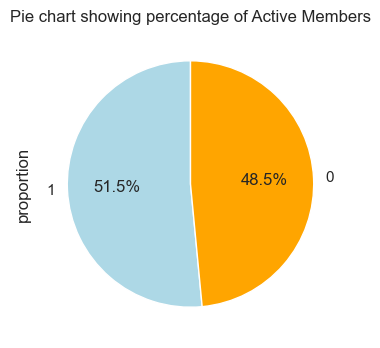

In [116]:
plt.figure(figsize=(5,4))
(df['IsActiveMember'].value_counts(normalize=True) * 100).plot.pie(autopct='%.1f%%', startangle=90, colors=['lightblue', 'orange'])
plt.title('Pie chart showing percentage of Active Members')
plt.show()

**Comments:<br>
52% of customers are active members, while about 48% are inactive.**

### Exited

In [117]:
df.Exited.value_counts(normalize=True)*100

Exited
0   79.63
1   20.37
Name: proportion, dtype: float64

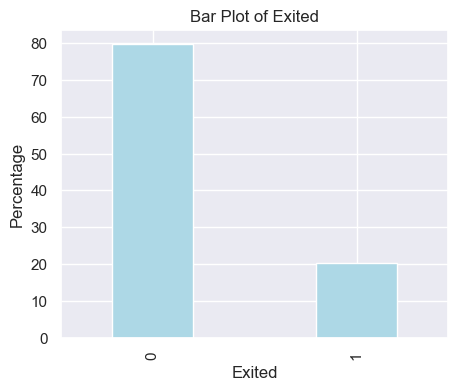

In [118]:
plt.figure(figsize=(5,4))
(df.Exited.value_counts(normalize=True)*100).plot.bar(color='lightblue',width=0.4)
plt.title('Bar Plot of Exited')
plt.xlabel('Exited')
plt.ylabel('Percentage')
plt.show()

**Comments:<br>
This data represents the distribution of customer churn (Exited) in the dataset. About 20% of customers have churned (Exited = 1), while approximately 80% are retained (Exited = 0). It shows the distribution is highly imbalanced.**

### Tenure

In [119]:
df.Tenure.value_counts(normalize=True)*100

Tenure
2    10.48
1    10.35
7    10.28
8    10.25
5    10.12
3    10.09
4     9.89
9     9.84
6     9.67
10    4.90
0     4.13
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Bar chart of Tenure')

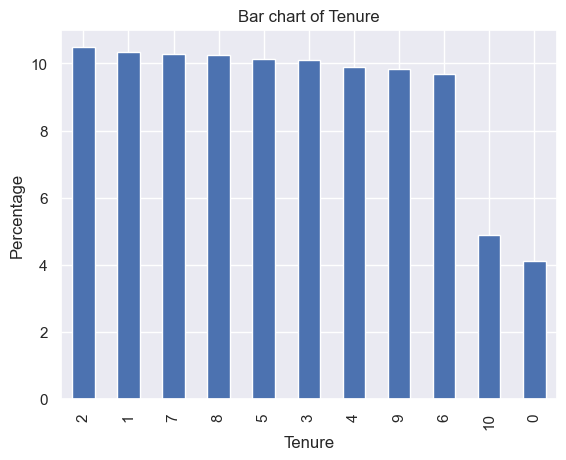

In [120]:
(df.Tenure.value_counts(normalize=True)*100).plot.bar()
plt.ylabel('Percentage')
plt.title('Bar chart of Tenure')

**Comments:<br>
Customers with a tenure of 2 years make up the largest proportion at 10.48%, followed closely by customers with a tenure of 1 year at 10.35%. The tenure decreases gradually for subsequent years, with the lowest proportions for tenures of 10 years (4.90%) and less than a year (4.13%)**

### Credit Score 

In [121]:
df.CreditScore.describe()

count   10000.00
mean      650.53
std        96.65
min       350.00
25%       584.00
50%       652.00
75%       718.00
max       850.00
Name: CreditScore, dtype: float64

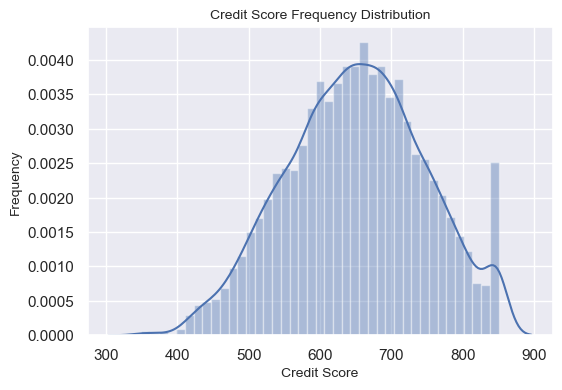

In [122]:
plt.figure(figsize=(6, 4))
sns.distplot(df.CreditScore)
plt.ylabel('Frequency', fontsize=10)
plt.xlabel('Credit Score', fontsize=10)
plt.title('Credit Score Frequency Distribution', fontsize=10)
plt.show()

<Axes: >

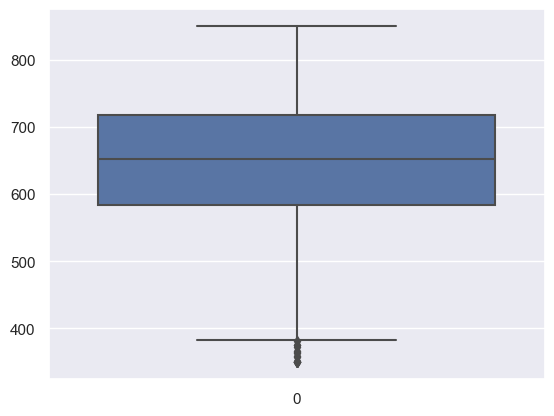

In [123]:
sns.boxplot(df.CreditScore)

In [124]:
stats.normaltest(df['CreditScore'])

NormaltestResult(statistic=132.82837928588427, pvalue=1.434445056038405e-29)

Since p-value is less than .05 , we reject null hypothesis and conclude that Age is not normally distributed.

In [125]:
normalized_cs, lambda_value = stats.boxcox(df['CreditScore'])

df['CreditScore_norm'] = normalized_cs

print("\nAfter Normalization:")
print(df['CreditScore_norm'].describe())


After Normalization:
count   10000.00
mean     1329.07
std       222.32
min       658.66
25%      1174.66
50%      1330.30
75%      1483.38
max      1794.88
Name: CreditScore_norm, dtype: float64


In [126]:
stats.normaltest(df['CreditScore_norm'])

NormaltestResult(statistic=140.96973935823408, pvalue=2.4479922620024585e-31)

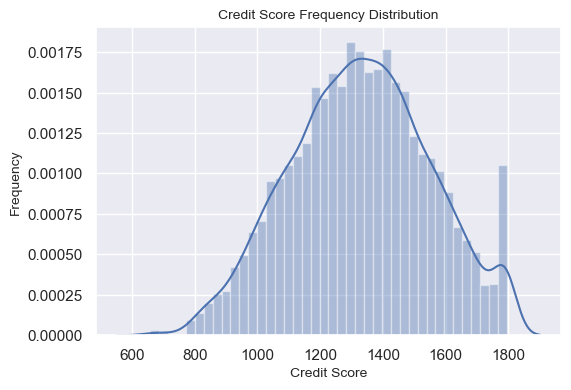

In [127]:
plt.figure(figsize=(6, 4))
sns.distplot(df.CreditScore_norm)
plt.ylabel('Frequency', fontsize=10)
plt.xlabel('Credit Score', fontsize=10)
plt.title('Credit Score Frequency Distribution', fontsize=10)
plt.show()

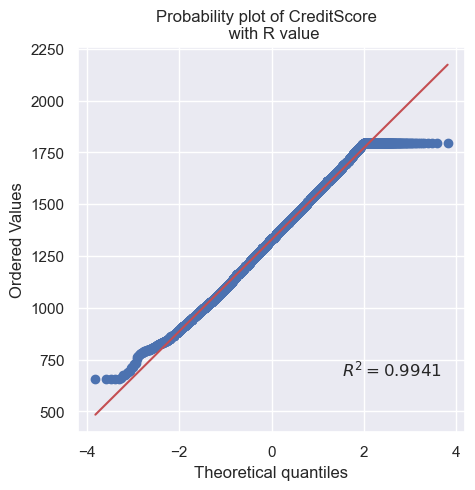

In [128]:
fig = plt.figure(figsize= (5, 5))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(df.CreditScore_norm, plot= plt, rvalue= True)
ax.set_title("Probability plot of CreditScore  \n with R value")
ax.set

plt.show()

**Comments:<br>
From the above plots we can see that , we have outliers and the feature is not normally distributed , hence we have used boxcox method to normalise it. On an average customers credit score surrounds around 650.**

### Age 

In [129]:
df.Age.describe()

count   10000.00
mean       38.92
std        10.49
min        18.00
25%        32.00
50%        37.00
75%        44.00
max        92.00
Name: Age, dtype: float64

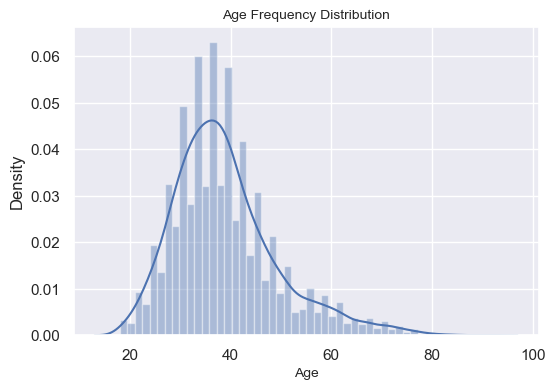

In [130]:
plt.figure(figsize=(6, 4))
sns.distplot(df.Age)
plt.xlabel('Age', fontsize=10)
plt.title('Age Frequency Distribution', fontsize=10)
plt.show()

<Axes: >

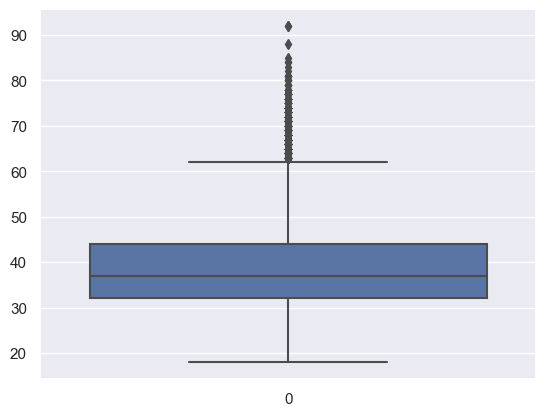

In [131]:
sns.boxplot(df.Age)

In [132]:
stats.normaltest(df['Age'])

NormaltestResult(statistic=1507.7908881363314, pvalue=0.0)

In [133]:
normalized_age, lambda_value = stats.boxcox(df['Age'])

df['Age_norm'] = normalized_age

print("\nAfter Normalization:")
print(df['Age_norm'].describe())


After Normalization:
count   10000.00
mean        2.48
std         0.11
min         2.13
25%         2.41
50%         2.48
75%         2.55
max         2.84
Name: Age_norm, dtype: float64


In [134]:
stats.normaltest(df['Age_norm'])

NormaltestResult(statistic=7.009785705029078, pvalue=0.03004999295286659)

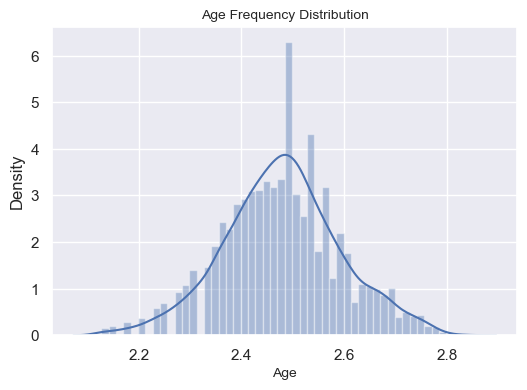

In [135]:
plt.figure(figsize=(6, 4))
sns.distplot(df.Age_norm)
plt.xlabel('Age', fontsize=10)
plt.title('Age Frequency Distribution', fontsize=10)
plt.show()

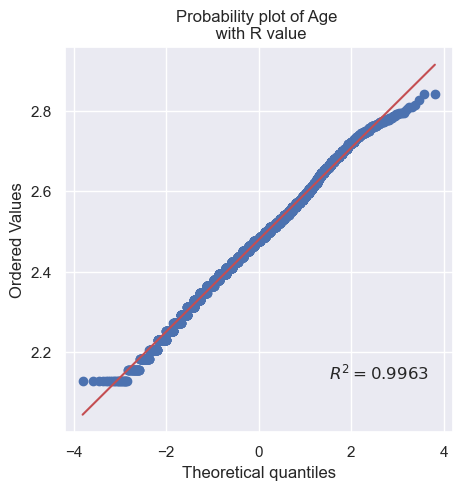

In [136]:
fig = plt.figure(figsize= (5, 5))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(df.Age_norm, plot= plt, rvalue= True)
ax.set_title("Probability plot of Age \n with R value")
ax.set

plt.show()

**Comments:<br>
From the above plots we can visualize that Age has outliers and all are above upper whisker.Also the data was not normally distributed, we have performed boxcox to normalise it.The mean value of Age is 38.92.** 

### Estimated Salary 

In [137]:
df.EstimatedSalary.describe()

count    10000.00
mean    100090.24
std      57510.49
min         11.58
25%      51002.11
50%     100193.91
75%     149388.25
max     199992.48
Name: EstimatedSalary, dtype: float64

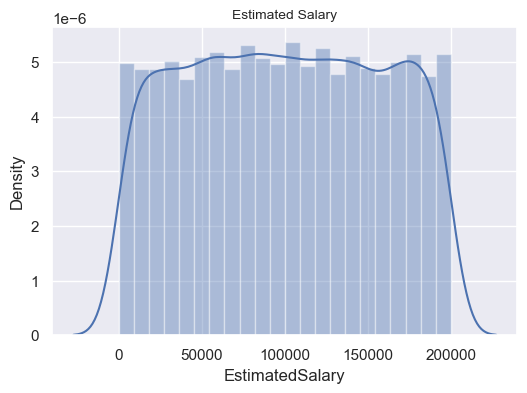

In [138]:
plt.figure(figsize=(6, 4))
sns.distplot(df.EstimatedSalary)
plt.title('Estimated Salary', fontsize=10)
plt.show()

<Axes: >

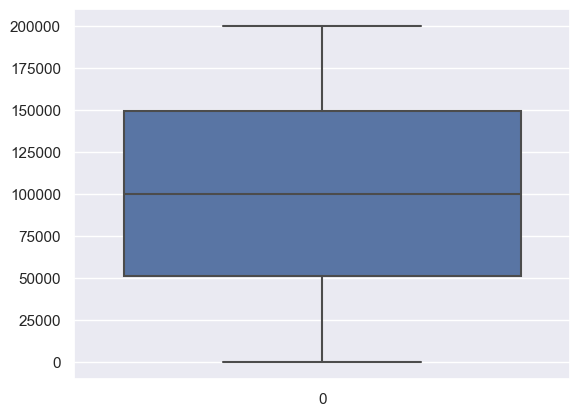

In [139]:
sns.boxplot(df.EstimatedSalary)

In [140]:
stats.normaltest(df['EstimatedSalary'])

NormaltestResult(statistic=7397.149829198932, pvalue=0.0)

In [141]:
normalized_salary, lambda_value = stats.boxcox(df['EstimatedSalary'])

df['EstimatedSalary_norm'] = normalized_salary

print("\nAfter Normalization:")
print(df['EstimatedSalary_norm'].describe())


After Normalization:
count   10000.00
mean     4887.52
std      2224.90
min         6.63
25%      3158.72
50%      5109.85
75%      6791.54
max      8359.99
Name: EstimatedSalary_norm, dtype: float64


In [142]:
stats.normaltest(df['EstimatedSalary_norm'])

NormaltestResult(statistic=2215.9125397710295, pvalue=0.0)

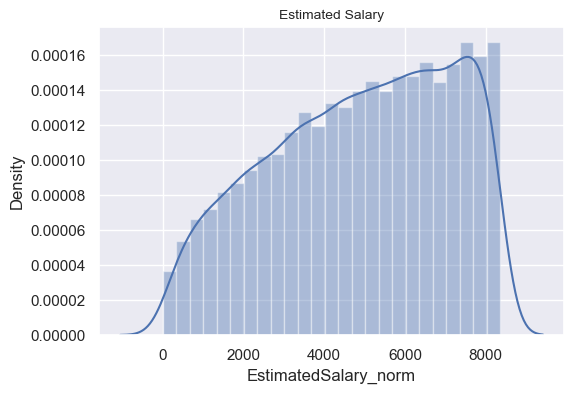

In [143]:
plt.figure(figsize=(6, 4))
sns.distplot(df.EstimatedSalary_norm)
plt.title('Estimated Salary', fontsize=10)
plt.show()

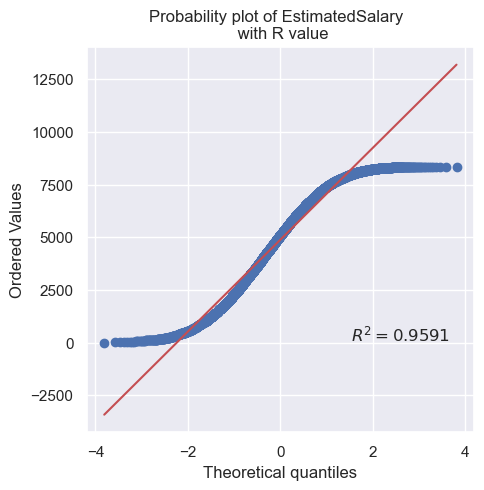

In [144]:
fig = plt.figure(figsize= (5, 5))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(df.EstimatedSalary_norm, plot= plt, rvalue= True)
ax.set_title("Probability plot of EstimatedSalary  \n with R value")
ax.set

plt.show()

**Comments:<br>
Comments: From the above plots we can visualize that Estimated Salary has no outliers. But as the data was not normally distributed, we have performed boxcox to normalise it.The average estimated salary of the customers if 100090.24 (dollar) and the standard deviation of salaries is approximately 57,510.49(dollar), indicating the spread of salaries around the mean.**

### Balance 

In [145]:
df.Balance.describe()

count    10000.00
mean     76485.89
std      62397.41
min          0.00
25%          0.00
50%      97198.54
75%     127644.24
max     250898.09
Name: Balance, dtype: float64

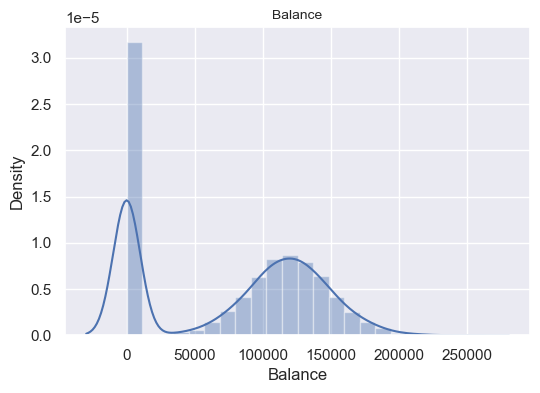

In [146]:
plt.figure(figsize=(6, 4))
sns.distplot(df.Balance)
plt.title('Balance', fontsize=10)
plt.show()

In [147]:
df["Balance0"]=df["Balance"]

In [148]:
df["Balance"]=df["Balance0"]

<Axes: >

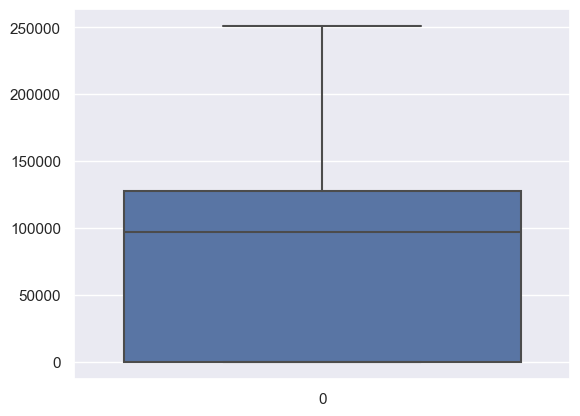

In [149]:
sns.boxplot(df.Balance)

In [150]:
stats.normaltest(df['Balance'])

NormaltestResult(statistic=62973.389518519696, pvalue=0.0)

In [151]:
import numpy as np
from scipy import stats

constant = 1  

# Add the constant value to the 'Balance' column
df['Balance_positive'] = df['Balance'] + constant

# Apply Box-Cox transformation to the modified data
normalized_balance, lambda_value = stats.boxcox(df['Balance_positive'])
df['Balance_norm'] = normalized_balance

# Print the transformed DataFrame
print(df.Balance_norm.describe())

count   10000.00
mean       19.56
std        14.77
min         0.00
25%         0.00
50%        29.68
75%        31.16
max        35.09
Name: Balance_norm, dtype: float64


In [152]:
stats.normaltest(df['Balance_norm'])

NormaltestResult(statistic=45713.831588129666, pvalue=0.0)

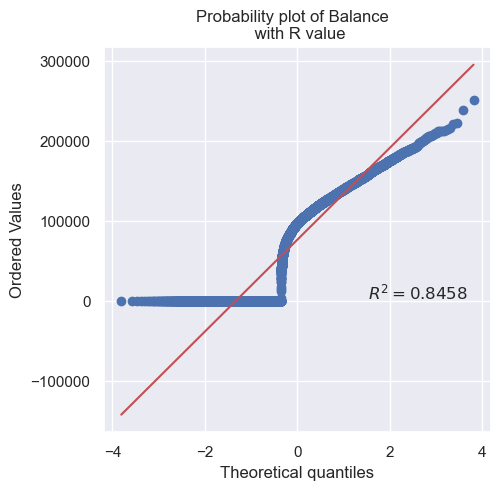

In [153]:
fig = plt.figure(figsize= (5, 5))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(df.Balance, plot= plt, rvalue= True)
ax.set_title("Probability plot of Balance  \n with R value")
ax.set

plt.show()

**Comments:<br>
From the above plot we can visualize that there are no outliers . The average value of this variable is approximately 76,485.89(dollar).**

# Bivariate Analysis and Mutivariate Analysis

## Analyzing dependent variable 'Exited' with independent variables 

In [154]:
list(df.Geography.unique())

['France', 'Spain', 'Germany']

In [155]:
df.groupby(['Geography','Exited'])['CreditScore'].mean()

Geography  Exited
France     0        651.16
           1        641.91
Germany    0        653.26
           1        647.69
Spain      0        652.10
           1        647.48
Name: CreditScore, dtype: float64

<Figure size 1500x800 with 0 Axes>

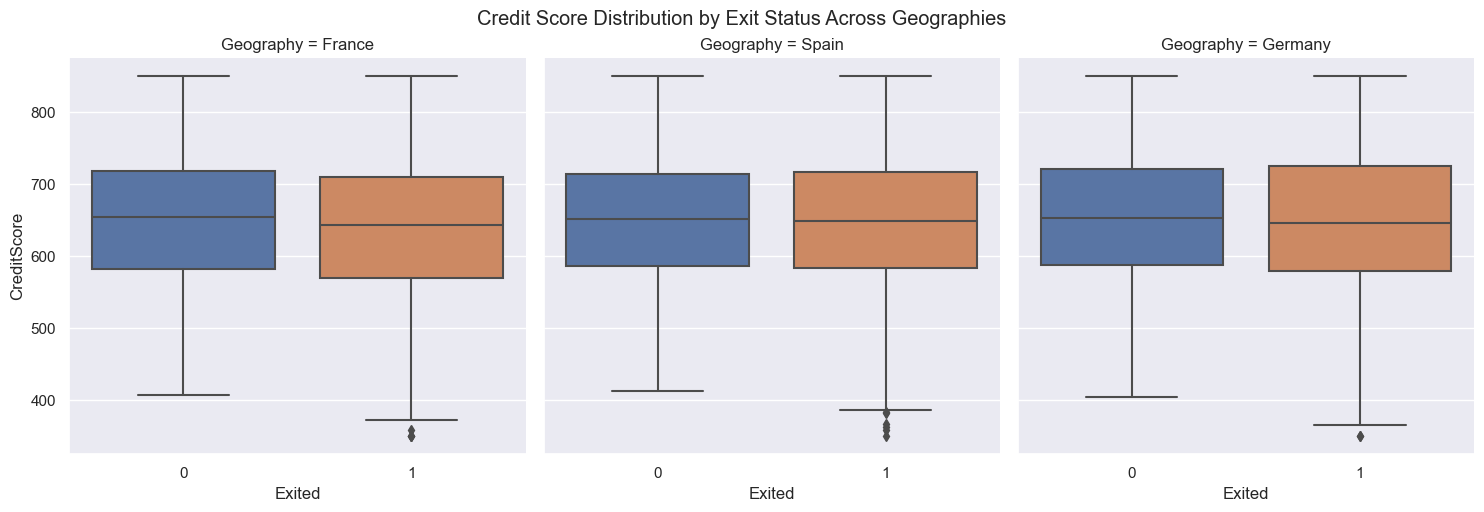

In [156]:
plt.figure(figsize=(15, 8))
sns.catplot(kind='box', y='CreditScore',x='Exited', data=df, col='Geography')
plt.suptitle('Credit Score Distribution by Exit Status Across Geographies', y=1.02)
plt.show()

In [157]:
from scipy.stats import f_oneway
groups = {}
for name, group in df.groupby('Geography'):
    groups[name] = group['CreditScore'].tolist()

# Perform one-way ANOVA test
f_statistic, p_value = f_oneway(groups['France'], groups['Germany'], groups['Spain'])

# Print the results
print("F-statistic:", f_statistic)
print("p-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("The means of the groups are significantly different (reject the null hypothesis)")
else:
    print("The means of the groups are not significantly different (fail to reject the null hypothesis)")

F-statistic: 0.39941989894651797
p-value: 0.6707197151786737
The means of the groups are not significantly different (fail to reject the null hypothesis)


**Comments:<br>
The above graph seems to suggest that people with lower credit scores seem to be slightly more likely to withdraw from the bank which is to be expected.**

### Credit score by gender

In [158]:
df.groupby(['Gender', 'Exited']).agg({'CreditScore': ['count', 'min']})

CreditScore     
                    count  min
Gender Exited                 
Female 0             3404  410
       1             1139  350
Male   0             4559  405
       1              898  350

<Figure size 1500x800 with 0 Axes>

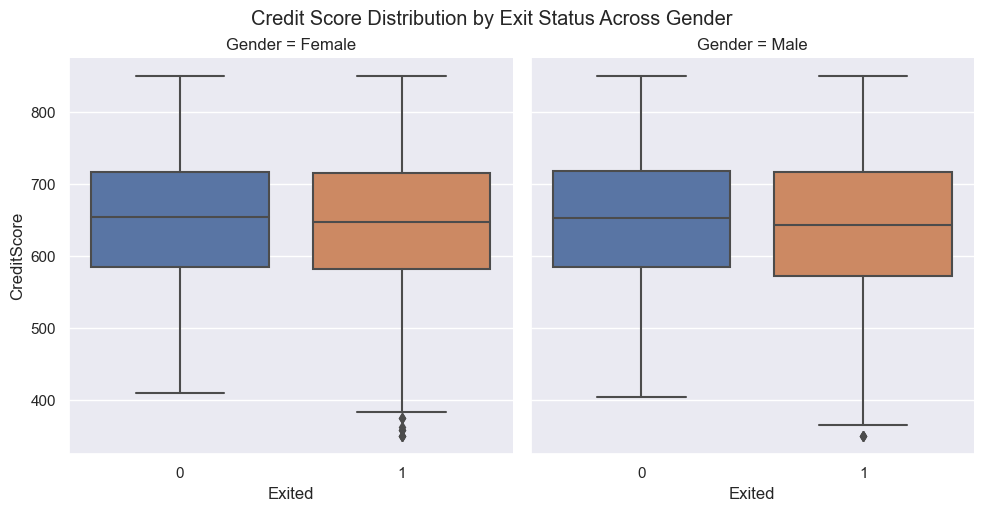

In [159]:
plt.figure(figsize=(15, 8))
sns.catplot(kind='box', x='Exited',y='CreditScore', data=df, col='Gender')
plt.suptitle('Credit Score Distribution by Exit Status Across Gender\n', y=1.02)
plt.show()

**Comments:
The dataset has more female customers with low CreditScores as compared to males and have churned.The minimum churn value in both the categories is the same .

In [160]:
df.groupby(['Gender','Exited'])['Exited'].count()

Gender  Exited
Female  0         3404
        1         1139
Male    0         4559
        1          898
Name: Exited, dtype: int64

<Figure size 500x400 with 0 Axes>

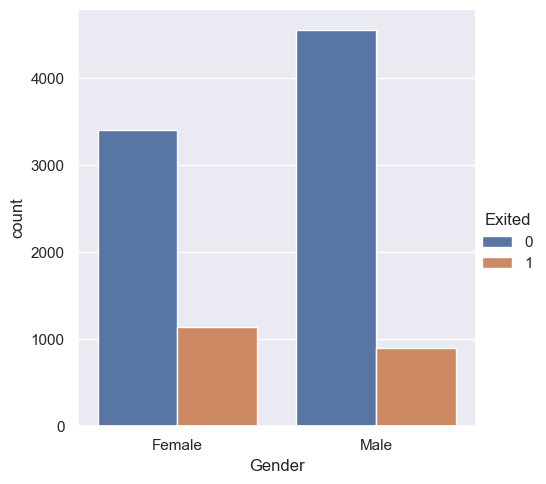

In [161]:
plt.figure(figsize=(5,4))
sns.catplot(x='Gender', hue='Exited', data=df, kind='count')

**Comments:<br>
The count of Females churned are higher than male customers . 

### Credit Score by age 

<Axes: xlabel='CreditScore', ylabel='Age'>

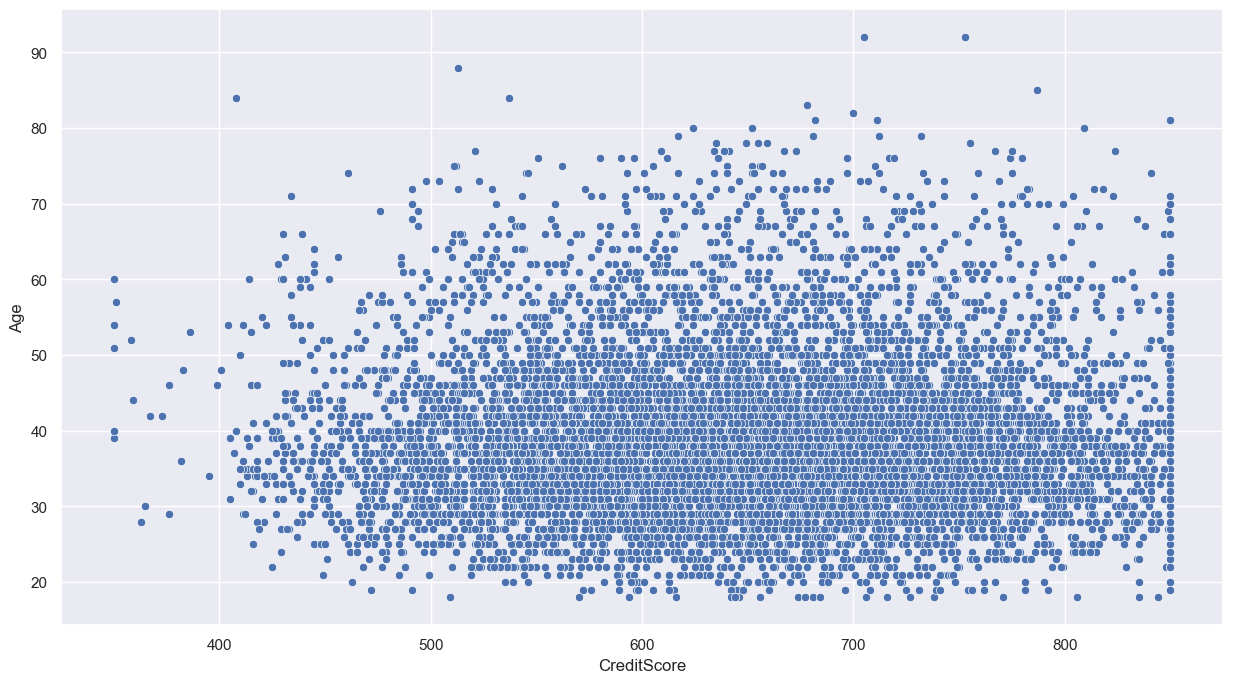

In [162]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x='CreditScore', data=df, y='Age')

There appears to be no correlation among age and credit score.

In [163]:
df[['Age', 'CreditScore']].corr()

Age  CreditScore
Age          1.00        -0.00
CreditScore -0.00         1.00

**Comment:<br>
From the above we can visualize that there is no correlation between Credit Score and Age.**

### Geography - Exited 

In [164]:
df.groupby(['Geography','Exited'])['Exited'].count()

Geography  Exited
France     0         4204
           1          810
Germany    0         1695
           1          814
Spain      0         2064
           1          413
Name: Exited, dtype: int64

<Figure size 600x400 with 0 Axes>

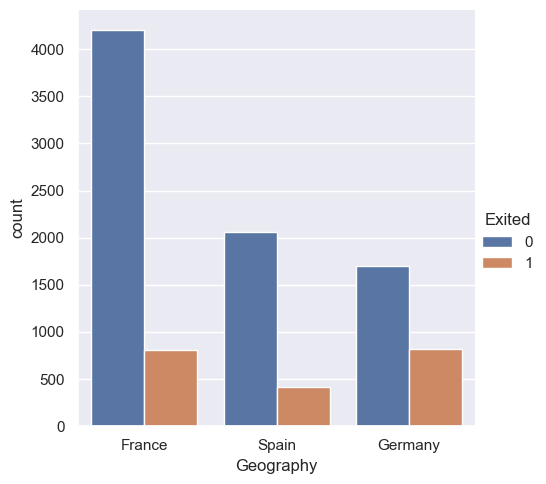

In [165]:
plt.figure(figsize=(6,4))
sns.catplot(kind='count', x='Geography',data=df, hue='Exited')

In [166]:
df.groupby('Geography')['Exited'].describe()

count  mean  std  min  25%  50%  75%  max
Geography                                            
France    5014.00  0.16 0.37 0.00 0.00 0.00 0.00 1.00
Germany   2509.00  0.32 0.47 0.00 0.00 0.00 1.00 1.00
Spain     2477.00  0.17 0.37 0.00 0.00 0.00 0.00 1.00

In [167]:
print(df["Geography"].value_counts(normalize=True)),print(df.groupby("Geography")["Exited"].mean())

Geography
France    0.50
Germany   0.25
Spain     0.25
Name: proportion, dtype: float64
Geography
France    0.16
Germany   0.32
Spain     0.17
Name: Exited, dtype: float64


(None, None)

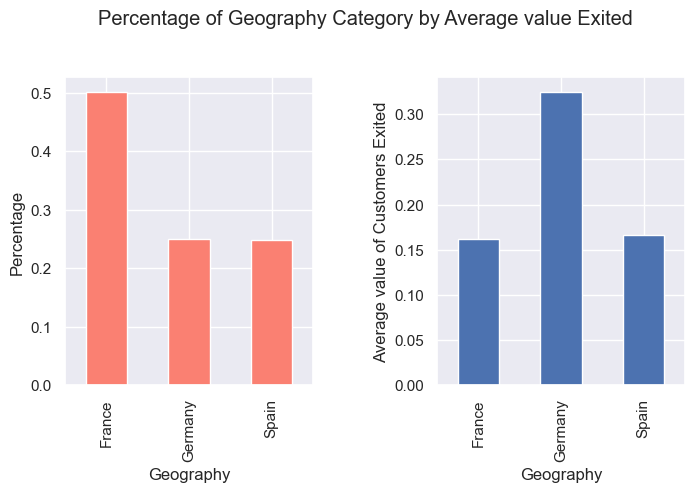

In [168]:
plt.figure(figsize=[8,4])
plt.subplot(1,2,1)
(df["Geography"].value_counts(normalize=True)).plot.bar(color='salmon')
plt.ylabel('Percentage')
plt.subplot(1,2,2)
plt.ylabel('Average value of Customers Exited')
(df.groupby("Geography")["Exited"].mean()).plot.bar()
plt.suptitle('Percentage of Geography Category by Average value Exited\n', y=1.05)
#plt.title('Percentage of Geography Category by Average value Exited\n')
plt.subplots_adjust(wspace=0.5)

In [169]:
pd.crosstab(df.Geography,df.Exited,margins=True)

Exited        0     1    All
Geography                   
France     4204   810   5014
Germany    1695   814   2509
Spain      2064   413   2477
All        7963  2037  10000

In [170]:
df.groupby("Geography")["Exited"].mean()

Geography
France    0.16
Germany   0.32
Spain     0.17
Name: Exited, dtype: float64

In [171]:
from scipy.stats import chi2_contingency
def chi_square(c1,c2):
    chi_2, p_val, dof, exp_val = chi2_contingency(pd.crosstab(df[c1],df[c2],margins = False))# make sure margins = False
    print("Actual values:\n")
    print(pd.crosstab(df[c1],df[c2],margins = False))
    print("="*100)
    print("Expected values: \n")
    print(exp_val)
    print("="*100)
    #print('\nChi-square is : %f'%chi_2, '\n\np_value is : %f'%p_val, '\n\ndegree of freedom is : %i'%dof)
    print(f'\nChi-square is : {chi_2}', f'\n\np_value is : {p_val}', f'\n\ndegree of freedom is :{dof}')
    print("="*100)
    if exp_val.min()<5 or np.sum(exp_val)<30 : print("\n********************************************\nWarning :We have some small expected \
values or the total number of observations is not enough to get any conclusion\n******************************************** ")
        #Note for sum of all values in dataframe use df.values.sum() and for numpy.ndarray use np.sum(arr)
    elif p_val < 0.05:# consider significan level is 5%
        print(F"\nThere is statistiacally significant correlation between {c1} and {c2} at 0.05 significant level")
    else:
        print(F"\nThere is no correlation between the two variables( we don't have enough evidence to conclude there is a a statistically significant relationship between {c1} and {c2}")        

In [172]:
chi_square('Exited','Geography')

Actual values:

Geography  France  Germany  Spain
Exited                           
0            4204     1695   2064
1             810      814    413
Expected values: 

[[3992.6482 1997.9167 1972.4351]
 [1021.3518  511.0833  504.5649]]

Chi-square is : 301.2553368243453 

p_value is : 3.830317605354266e-66 

degree of freedom is :2

There is statistiacally significant correlation between Exited and Geography at 0.05 significant level


**Comments:<br>
The data , plots and test indicates that the customers from Germany are more likely to Exit as compared to France and Spain.<br>
50% of total customers belongs to France.<br>
Approximately 40% of the total customers from France still banks with the institution.**

### Gender - Exited

In [173]:
sns.set()

Text(0.5, 1.0, 'Count of Customers by Gender')

<Figure size 500x300 with 0 Axes>

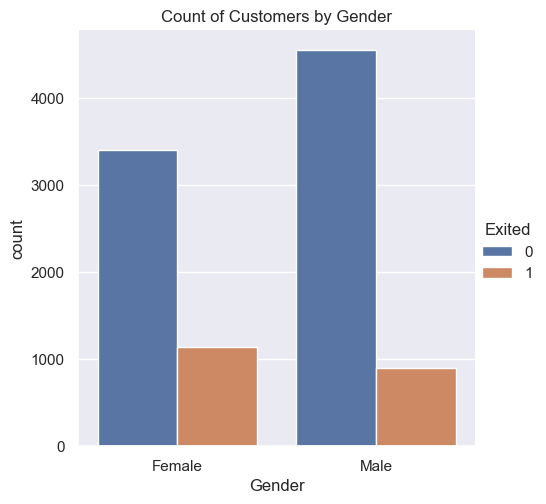

In [80]:
plt.figure(figsize=(5,3))
sns.catplot(kind='count', x='Gender', data=df, hue='Exited')
plt.title('Count of Customers by Gender')

In [81]:
df.groupby(['Gender','Exited'])['Exited'].count()

Gender  Exited
Female  0         3404
        1         1139
Male    0         4559
        1          898
Name: Exited, dtype: int64

In [82]:
df.groupby('Gender')['Exited'].describe()

count  mean  std  min  25%  50%  75%  max
Gender                                            
Female 4543.00  0.25 0.43 0.00 0.00 0.00 1.00 1.00
Male   5457.00  0.16 0.37 0.00 0.00 0.00 0.00 1.00

In [83]:
print(df["Gender"].value_counts(normalize=True)),print(df.groupby("Gender")["Exited"].mean())

Gender
Male     0.55
Female   0.45
Name: proportion, dtype: float64
Gender
Female   0.25
Male     0.16
Name: Exited, dtype: float64


(None, None)

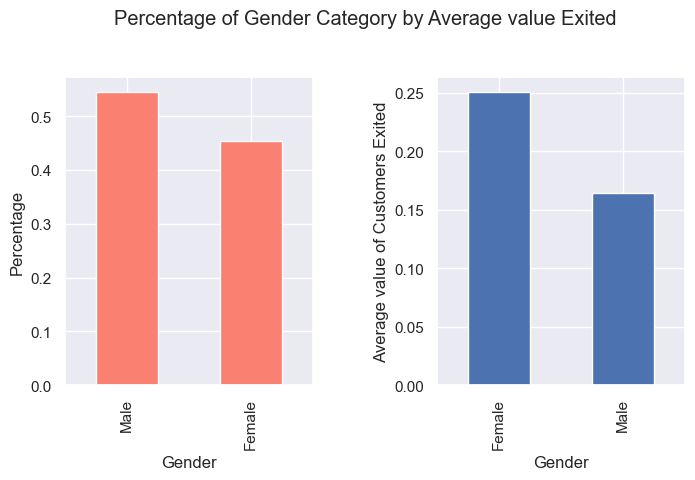

In [84]:
plt.figure(figsize=[8,4])
plt.subplot(1,2,1)
(df["Gender"].value_counts(normalize=True)).plot.bar(color='salmon')
plt.ylabel('Percentage')
plt.subplot(1,2,2)
plt.ylabel('Average value of Customers Exited')
(df.groupby("Gender")["Exited"].mean()).plot.bar()
plt.suptitle('Percentage of Gender Category by Average value Exited\n', y=1.05)
plt.subplots_adjust(wspace=0.5)

In [85]:
chi_square('Exited','Gender')

Actual values:

Gender  Female  Male
Exited              
0         3404  4559
1         1139   898
Expected values: 

[[3617.5909 4345.4091]
 [ 925.4091 1111.5909]]

Chi-square is : 112.91857062096116 

p_value is : 2.2482100097131755e-26 

degree of freedom is :1

There is statistiacally significant correlation between Exited and Gender at 0.05 significant level


**Comments:<br>
**Females are more likely to churn as compared to men .**
**Count: 55% of the customers are male and 45% are female.**<br>
**In terms of average churn value, around 25% of the female customers have exited, whereas approximately average of 16% of male customers have exited.**

### NumofProducts-Exited

In [86]:
df.groupby(['NumOfProducts','Exited'])['Exited'].count()

NumOfProducts  Exited
1              0         3675
               1         1409
2              0         4242
               1          348
3              0           46
               1          220
4              1           60
Name: Exited, dtype: int64

Text(0.5, 1.0, 'Count of Customers by NumofProducts and Exited Staus\n')

<Figure size 500x300 with 0 Axes>

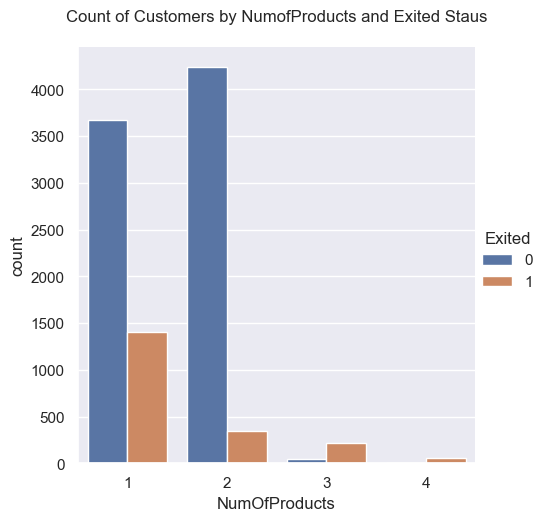

In [87]:
plt.figure(figsize=(5,3))
sns.catplot(kind='count', x='NumOfProducts',data=df, hue='Exited')
plt.title('Count of Customers by NumofProducts and Exited Staus\n')

In [88]:
df.groupby('NumOfProducts')['Exited'].describe()

count  mean  std  min  25%  50%  75%  max
NumOfProducts                                            
1             5084.00  0.28 0.45 0.00 0.00 0.00 1.00 1.00
2             4590.00  0.08 0.26 0.00 0.00 0.00 0.00 1.00
3              266.00  0.83 0.38 0.00 1.00 1.00 1.00 1.00
4               60.00  1.00 0.00 1.00 1.00 1.00 1.00 1.00

In [89]:
print(df["NumOfProducts"].value_counts(normalize=True)),print(df.groupby("NumOfProducts")["Exited"].mean())

NumOfProducts
1   0.51
2   0.46
3   0.03
4   0.01
Name: proportion, dtype: float64
NumOfProducts
1   0.28
2   0.08
3   0.83
4   1.00
Name: Exited, dtype: float64


(None, None)

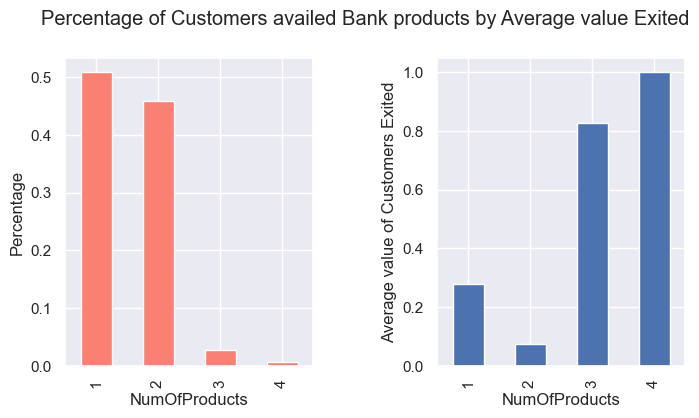

In [90]:
plt.figure(figsize=[8,4])
plt.subplot(1,2,1)
plt.ylabel('Percentage')
df["NumOfProducts"].value_counts(normalize=True).plot.bar(color='salmon')
plt.subplot(1,2,2)
df.groupby("NumOfProducts")["Exited"].mean().plot.bar()
plt.ylabel('Average value of Customers Exited')
plt.suptitle('Percentage of Customers availed Bank products by Average value Exited\n', y=1.00)
plt.subplots_adjust(wspace=0.5)

In [91]:
chi_square('Exited','NumOfProducts')

Actual values:

NumOfProducts     1     2    3   4
Exited                            
0              3675  4242   46   0
1              1409   348  220  60
Expected values: 

[[4048.3892 3655.017   211.8158   47.778 ]
 [1035.6108  934.983    54.1842   12.222 ]]

Chi-square is : 1503.6293615070408 

p_value is : 0.0 

degree of freedom is :3

There is statistiacally significant correlation between Exited and NumOfProducts at 0.05 significant level


**Comments:<br>
Around 51% of customers have one product, while 46% have two products. Only a small percentage of customers have three (3%) or four (1%) products.
In terms of churn rate, customers with one product have an exit rate of 28%, while those with two products have a lower exit rate of 8%. However, customers with three or four products exhibit significantly higher exit rates, with 83% and 100% .**

### HasCrCard - Exited

In [92]:
print(df["HasCrCard"].value_counts(normalize=True)),print(df.groupby("HasCrCard")["Exited"].mean())

HasCrCard
1   0.71
0   0.29
Name: proportion, dtype: float64
HasCrCard
0   0.21
1   0.20
Name: Exited, dtype: float64


(None, None)

Text(0.5, 1.0, 'Count of Customers with Credit Card by Exited Staus\n')

<Figure size 500x300 with 0 Axes>

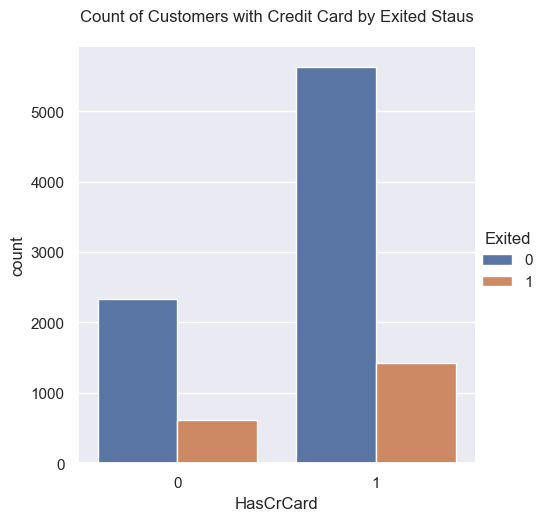

In [93]:
plt.figure(figsize=(5,3))
sns.catplot(kind='count', x='HasCrCard',data=df, hue='Exited')
plt.title('Count of Customers with Credit Card by Exited Staus\n')

In [94]:
df.groupby(['HasCrCard','Exited'])['Exited'].count()

HasCrCard  Exited
0          0         2332
           1          613
1          0         5631
           1         1424
Name: Exited, dtype: int64

In [95]:
df.groupby('HasCrCard')['Exited'].describe()

count  mean  std  min  25%  50%  75%  max
HasCrCard                                            
0         2945.00  0.21 0.41 0.00 0.00 0.00 0.00 1.00
1         7055.00  0.20 0.40 0.00 0.00 0.00 0.00 1.00

In [96]:
pd.options.display.float_format = "{:.2f}".format

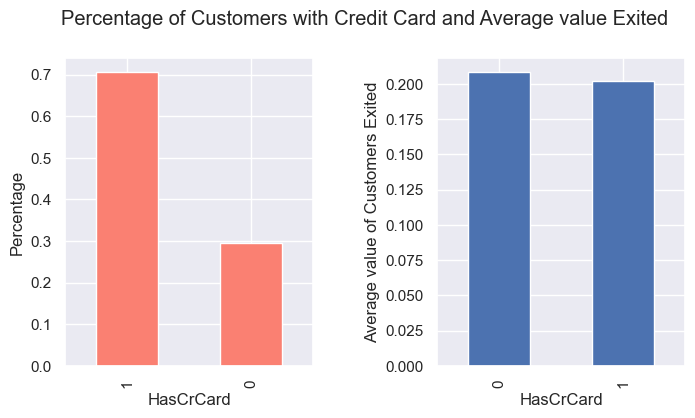

In [97]:
plt.figure(figsize=[8,4])
plt.subplot(1,2,1)
plt.ylabel('Percentage')
df['HasCrCard'].value_counts(normalize=True).plot.bar(color='salmon')
plt.subplot(1,2,2)
df.groupby('HasCrCard')["Exited"].mean().plot.bar()
plt.ylabel('Average value of Customers Exited')
plt.suptitle('Percentage of Customers with Credit Card and Average value Exited\n', y=1.00)
plt.subplots_adjust(wspace=0.5)

In [98]:
chi_square('Exited','HasCrCard')

Actual values:

HasCrCard     0     1
Exited               
0          2332  5631
1           613  1424
Expected values: 

[[2345.1035 5617.8965]
 [ 599.8965 1437.1035]]

Chi-square is : 0.4713377990444081 

p_value is : 0.49237236141554686 

degree of freedom is :1

There is no correlation between the two variables( we don't have enough evidence to conclude there is a a statistically significant relationship between Exited and HasCrCard


**Comments:<br>
71% of customers have a credit card, while approximately 29% do not.
In the second plot, it shows that among customers who exited, about 21% did not have a credit card, while 20% did have one.**

### Tenure-Exited

In [99]:
print(df["Tenure"].value_counts(normalize=True)),print(df.groupby("Tenure")["Exited"].mean())

Tenure
2    0.10
1    0.10
7    0.10
8    0.10
5    0.10
3    0.10
4    0.10
9    0.10
6    0.10
10   0.05
0    0.04
Name: proportion, dtype: float64
Tenure
0    0.23
1    0.22
2    0.19
3    0.21
4    0.21
5    0.21
6    0.20
7    0.17
8    0.19
9    0.22
10   0.21
Name: Exited, dtype: float64


(None, None)

In [100]:
df.groupby('Tenure')['Exited'].describe()

count  mean  std  min  25%  50%  75%  max
Tenure                                            
0       413.00  0.23 0.42 0.00 0.00 0.00 0.00 1.00
1      1035.00  0.22 0.42 0.00 0.00 0.00 0.00 1.00
2      1048.00  0.19 0.39 0.00 0.00 0.00 0.00 1.00
3      1009.00  0.21 0.41 0.00 0.00 0.00 0.00 1.00
4       989.00  0.21 0.40 0.00 0.00 0.00 0.00 1.00
5      1012.00  0.21 0.41 0.00 0.00 0.00 0.00 1.00
6       967.00  0.20 0.40 0.00 0.00 0.00 0.00 1.00
7      1028.00  0.17 0.38 0.00 0.00 0.00 0.00 1.00
8      1025.00  0.19 0.39 0.00 0.00 0.00 0.00 1.00
9       984.00  0.22 0.41 0.00 0.00 0.00 0.00 1.00
10      490.00  0.21 0.40 0.00 0.00 0.00 0.00 1.00

<Axes: xlabel='Tenure'>

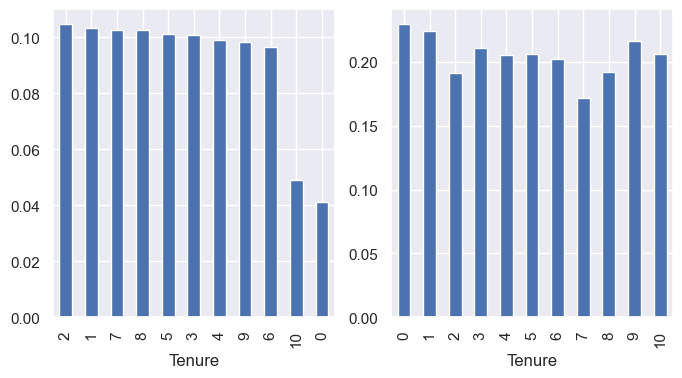

In [101]:
plt.figure(figsize=[8,4])
plt.subplot(1,2,1)
df['Tenure'].value_counts(normalize=True).plot.bar()
plt.subplot(1,2,2)
df.groupby('Tenure')["Exited"].mean().plot.bar()

In [102]:
chi_square('Exited','Tenure')

Actual values:

Tenure   0    1    2    3    4    5    6    7    8    9    10
Exited                                                       
0       318  803  847  796  786  803  771  851  828  771  389
1        95  232  201  213  203  209  196  177  197  213  101
Expected values: 

[[328.8719 824.1705 834.5224 803.4667 787.5407 805.8556 770.0221 818.5964
  816.2075 783.5592 390.187 ]
 [ 84.1281 210.8295 213.4776 205.5333 201.4593 206.1444 196.9779 209.4036
  208.7925 200.4408  99.813 ]]

Chi-square is : 13.900372600390284 

p_value is : 0.17758462026413294 

degree of freedom is :10

There is no correlation between the two variables( we don't have enough evidence to conclude there is a a statistically significant relationship between Exited and Tenure


**Comments:<br>
The first plot of data shows the distribution of tenure among customers, with each category representing approximately 10% of the total.
In the second plot, it displays the proportion of customers who exited for each tenure category, ranging from 4% to 23%.**

### IsActiveMember - Exited

In [103]:
df.groupby(['IsActiveMember','Exited'])['Exited'].count()

IsActiveMember  Exited
0               0         3547
                1         1302
1               0         4416
                1          735
Name: Exited, dtype: int64

Text(0.5, 1.0, 'Count of Active & Inactive Customers by Exited Staus\n')

<Figure size 500x300 with 0 Axes>

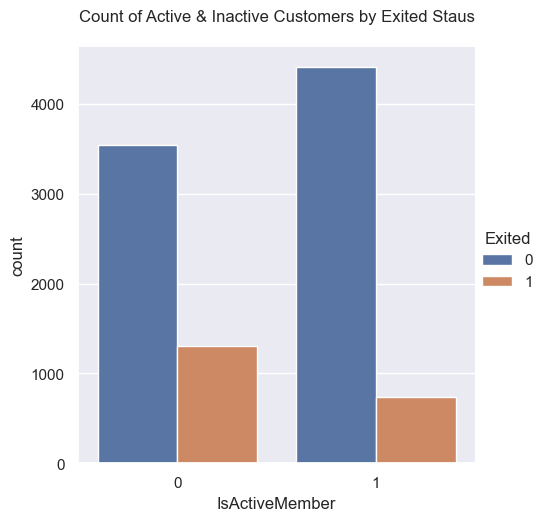

In [104]:
plt.figure(figsize=(5,3))
sns.catplot(kind='count', x='IsActiveMember',data=df, hue='Exited')
plt.title('Count of Active & Inactive Customers by Exited Staus\n')

In [105]:
print(df["IsActiveMember"].value_counts(normalize=True)),print(df.groupby("IsActiveMember")["Exited"].mean())

IsActiveMember
1   0.52
0   0.48
Name: proportion, dtype: float64
IsActiveMember
0   0.27
1   0.14
Name: Exited, dtype: float64


(None, None)

In [106]:
df.groupby('IsActiveMember')['Exited'].describe()

count  mean  std  min  25%  50%  75%  max
IsActiveMember                                            
0              4849.00  0.27 0.44 0.00 0.00 0.00 1.00 1.00
1              5151.00  0.14 0.35 0.00 0.00 0.00 0.00 1.00

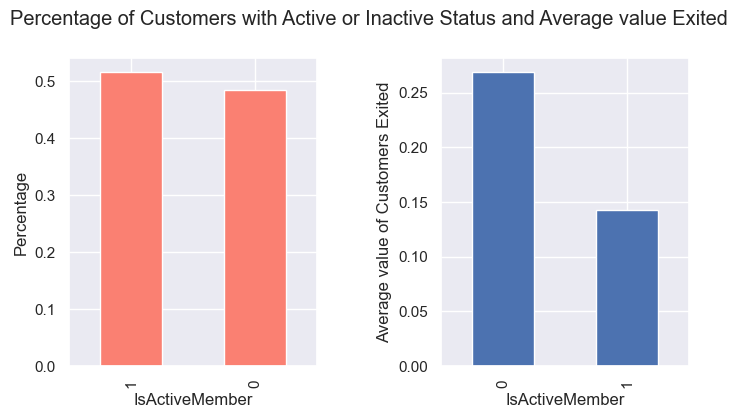

In [107]:
plt.figure(figsize=[8,4])
plt.subplot(1,2,1)
plt.ylabel('Percentage')
df['IsActiveMember'].value_counts(normalize=True).plot.bar(color='salmon')
plt.subplot(1,2,2)
df.groupby('IsActiveMember')["Exited"].mean().plot.bar()
plt.ylabel('Average value of Customers Exited')
plt.suptitle('Percentage of Customers with Active or Inactive Status and Average value Exited\n', y=1.00)
plt.subplots_adjust(wspace=0.5)

In [108]:
chi_square('Exited','IsActiveMember')

Actual values:

IsActiveMember     0     1
Exited                    
0               3547  4416
1               1302   735
Expected values: 

[[3861.2587 4101.7413]
 [ 987.7413 1049.2587]]

Chi-square is : 242.98534164287963 

p_value is : 8.785858269303703e-55 

degree of freedom is :1

There is statistiacally significant correlation between Exited and IsActiveMember at 0.05 significant level


**Comments:<br>
The first plot of data indicates that about 52% of the customers are active members, while 48% are not.
In the second set, it shows that 27% of inactive members and 14% of active members have exited.**

### Age - Exited

In [176]:
df.Age.describe()

count   10000.00
mean       38.92
std        10.49
min        18.00
25%        32.00
50%        37.00
75%        44.00
max        92.00
Name: Age, dtype: float64

In [177]:
df_gp=df[:]

In [187]:
df_gp["Age_gp"]=pd.cut(df.Age,[0,20,40,50,60,80,9999],labels=["<20", "20-40", "40-50", "50-60","60-80" ,"80+" ])

In [179]:
df_gp.groupby("Age_gp")["Exited"].describe()

count  mean  std  min  25%  50%  75%  max
Age_gp                                            
<20      89.00  0.06 0.23 0.00 0.00 0.00 0.00 1.00
20-40  6330.00  0.11 0.31 0.00 0.00 0.00 0.00 1.00
40-50  2320.00  0.34 0.47 0.00 0.00 0.00 1.00 1.00
50-60   797.00  0.56 0.50 0.00 0.00 1.00 1.00 1.00
60-80   452.00  0.25 0.43 0.00 0.00 0.00 1.00 1.00
80+      12.00  0.08 0.29 0.00 0.00 0.00 0.00 1.00

In [180]:
print(df_gp["Age_gp"].value_counts(normalize=True))
print(df_gp.groupby("Age_gp").agg({"Exited":["mean"]}))

Age_gp
20-40   0.63
40-50   0.23
50-60   0.08
60-80   0.05
<20     0.01
80+     0.00
Name: proportion, dtype: float64
       Exited
         mean
Age_gp       
<20      0.06
20-40    0.11
40-50    0.34
50-60    0.56
60-80    0.25
80+      0.08


In [181]:
df_gp.groupby("Age_gp").agg({"Exited":["count","mean"]})

Exited     
        count mean
Age_gp            
<20        89 0.06
20-40    6330 0.11
40-50    2320 0.34
50-60     797 0.56
60-80     452 0.25
80+        12 0.08

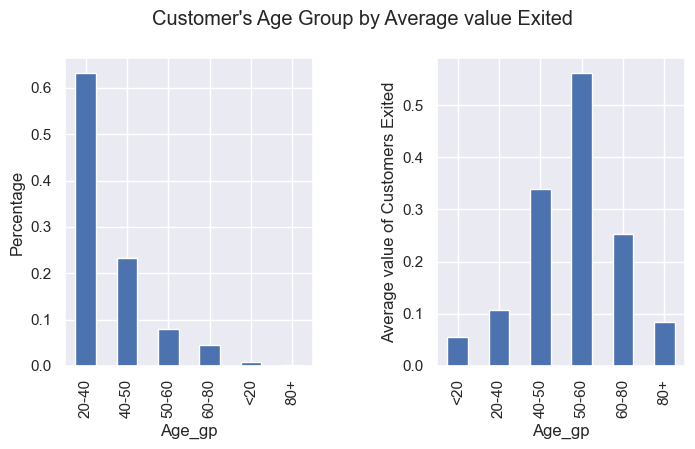

In [182]:
plt.figure(figsize=[8,4])
plt.subplot(1,2,1)
plt.ylabel('Percentage')
df_gp['Age_gp'].value_counts(normalize=True).plot.bar()
plt.subplot(1,2,2)
df_gp.groupby('Age_gp')["Exited"].mean().plot.bar()
plt.ylabel('Average value of Customers Exited')
plt.suptitle("Customer's Age Group by Average value Exited \n", y=1.00)
plt.subplots_adjust(wspace=0.5)

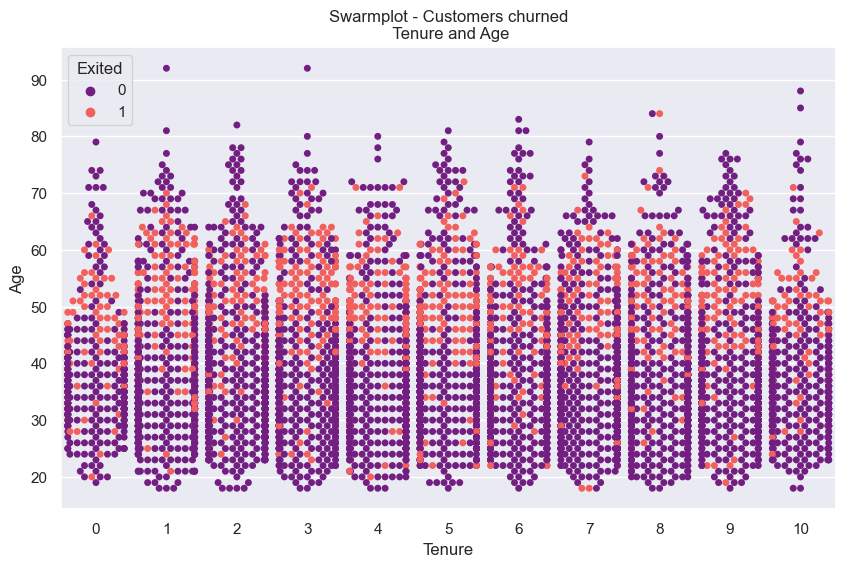

In [183]:
plt.figure(figsize=(10,6))
sns.swarmplot(df,x='Tenure',y='Age',hue='Exited', palette='magma')
plt.title('Swarmplot - Customers churned\n Tenure and Age')
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
sns.swarmplot(df_gp,x='Age_gp',y='Age',hue='Exited', palette='magma')
plt.title('Swarmplot - Customers churned\n by Age')
plt.show()

In [185]:
df_gp.head()

CreditScore Geography  Gender  Age  Tenure   Balance  NumOfProducts  \
0          619    France  Female   42       2      0.00              1   
1          608     Spain  Female   41       1  83807.86              1   
2          502    France  Female   42       8 159660.80              3   
3          699    France  Female   39       1      0.00              2   
4          850     Spain  Female   43       2 125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  CreditScore_norm  \
0          1               1        101348.88       1           1254.49   
1          0               1        112542.58       0           1229.34   
2          1               0        113931.57       1            990.09   
3          0               0         93826.63       0           1439.12   
4          1               1         79084.10       0           1794.88   

   Age_norm  EstimatedSalary_norm  Balance0  Balance_positive  Balance_norm  \
0      2.53               5151.74      0.00              1.00          0.00   
1      2.52               5550.87  83807.86          83808.86         28.90   
2      2.53               5599.58 159660.80         159661.80         32.42   
3      2.50               4876.38      0.00              1.00          0.00   
4      2.54               4317.35 125510.82         125511.82         31.07   

  Age_gp  
0  40-50  
1  40-50  
2  40-50  
3  20-40  
4  40-50

In [189]:
from scipy.stats import chi2_contingency
def chi_square(c1,c2):
    chi_2, p_val, dof, exp_val = chi2_contingency(pd.crosstab(df_gp[c1],df_gp[c2],margins = False))# make sure margins = False
    print("Actual values:\n")
    print(pd.crosstab(df_gp[c1],df_gp[c2],margins = False))
    print("="*100)
    print("Expected values: \n")
    print(exp_val)
    print("="*100)
    #print('\nChi-square is : %f'%chi_2, '\n\np_value is : %f'%p_val, '\n\ndegree of freedom is : %i'%dof)
    print(f'\nChi-square is : {chi_2}', f'\n\np_value is : {p_val}', f'\n\ndegree of freedom is :{dof}')
    print("="*100)
    if exp_val.min()<5 or np.sum(exp_val)<30 : print("\n********************************************\nWarning :We have some small expected \
values or the total number of observations is not enough to get any conclusion\n******************************************** ")
        #Note for sum of all values in dataframe use df.values.sum() and for numpy.ndarray use np.sum(arr)
    elif p_val < 0.05:# consider significan level is 5%
        print(F"\nThere is statistiacally significant correlation between {c1} and {c2} at 0.05 significant level")
    else:
        print(F"\nThere is no correlation between the two variables( we don't have enough evidence to conclude there is a a statistically significant relationship between {c1} and {c2}")        

In [190]:
chi_square('Exited','Age_gp')

Actual values:

Age_gp  <20  20-40  40-50  50-60  60-80  80+
Exited                                      
0        84   5649   1532    349    338   11
1         5    681    788    448    114    1
Expected values: 

[[7.087070e+01 5.040579e+03 1.847416e+03 6.346511e+02 3.599276e+02
  9.555600e+00]
 [1.812930e+01 1.289421e+03 4.725840e+02 1.623489e+02 9.207240e+01
  2.444400e+00]]

Chi-square is : 1275.635595086533 

p_value is : 1.2124944995376075e-273 

degree of freedom is :5

********************************************
******************************************** 


**Comments:<br>
The data shows that older customers, particularly those in the 40-50 and 50-60 age groups, have higher exit rates compared to younger age groups.** 

**For customers aged between 40 and 50 years old, there are 2320 customers (23% of the total), and their exit average rate is at 34%.
The age group of 50-60 years old comprises 797 customers(7% of the total), with a relatively high exit average rate of 56%.**

Sugg:This suggests that the company may need to focus on strategies to retain and engage older customers to reduce churn in these segments. Additionally, understanding the reasons behind the higher churn rates among older customers could help tailor retention strategies effectively.

<Axes: xlabel='Age', ylabel='Exited'>

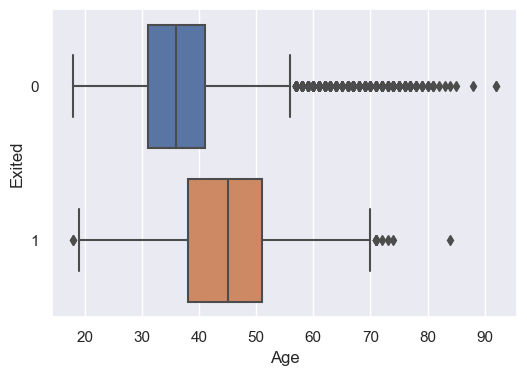

In [119]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df_gp.Age, y=df_gp.Exited, orient='h')

### Estimated Salary - Exited

In [120]:
df_gp.EstimatedSalary.describe()

count    10000.00
mean    100090.24
std      57510.49
min         11.58
25%      51002.11
50%     100193.91
75%     149388.25
max     199992.48
Name: EstimatedSalary, dtype: float64

In [191]:
df_gp["Salary_gp"]=pd.cut(df.EstimatedSalary,[0,50000,100000,150000,200000],labels=["<50000", "50000-100000", "100000-150000", "150000-200000"])

In [192]:
df_gp.groupby("Salary_gp")["Exited"].describe()

count  mean  std  min  25%  50%  75%  max
Salary_gp                                                
<50000        2453.00  0.20 0.40 0.00 0.00 0.00 0.00 1.00
50000-100000  2537.00  0.20 0.40 0.00 0.00 0.00 0.00 1.00
100000-150000 2555.00  0.20 0.40 0.00 0.00 0.00 0.00 1.00
150000-200000 2455.00  0.21 0.41 0.00 0.00 0.00 0.00 1.00

In [123]:
df_gp["Salary_gp"].value_counts(normalize=True)*100

Salary_gp
100000-150000   25.55
50000-100000    25.37
150000-200000   24.55
<50000          24.53
Name: proportion, dtype: float64

In [124]:
df_gp.groupby("Salary_gp").agg({"Exited":["count","mean"]})

Exited     
               count mean
Salary_gp                
<50000          2453 0.20
50000-100000    2537 0.20
100000-150000   2555 0.20
150000-200000   2455 0.21

<Axes: xlabel='Salary_gp'>

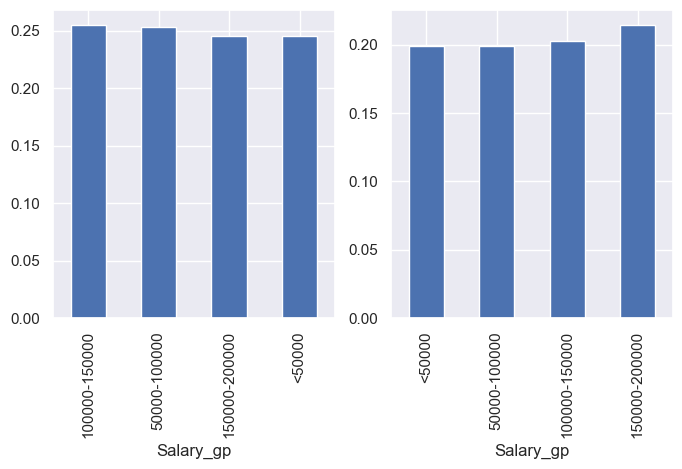

In [125]:
plt.figure(figsize=[8,4])
plt.subplot(1,2,1)
df_gp["Salary_gp"].value_counts(normalize=True).plot.bar()
plt.subplot(1,2,2)
df_gp.groupby("Salary_gp")["Exited"].mean().plot.bar()

In [126]:
df_gp.groupby(["Salary_gp", 'Exited']).agg({'Balance': 'sum', 'Exited': 'count'})

Balance  Exited
Salary_gp     Exited                     
<50000        0      139313928.42    1964
              1       45366562.97     489
50000-100000  0      148022654.99    2033
              1       45366145.66     504
100000-150000 0      150258094.70    2038
              1       46933704.21     517
150000-200000 0      141676120.14    1928
              1       47921681.79     527

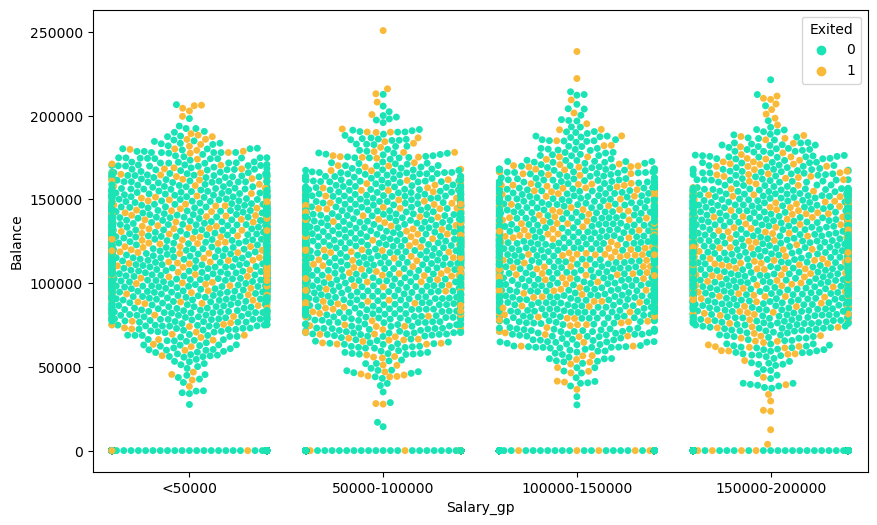

In [982]:
plt.figure(figsize=(10,6))
sns.swarmplot(df_gp,x="Salary_gp",y='Balance',hue='Exited', palette='turbo')
plt.show()

In [127]:
chi_square('Exited','Salary_gp')

Actual values:

Salary_gp  <50000  50000-100000  100000-150000  150000-200000
Exited                                                       
0            1964          2033           2038           1928
1             489           504            517            527
Expected values: 

[[1953.3239 2020.2131 2034.5465 1954.9165]
 [ 499.6761  516.7869  520.4535  500.0835]]

Chi-square is : 2.53191409644878 

p_value is : 0.4695510909618005 

degree of freedom is :3

There is no correlation between the two variables( we don't have enough evidence to conclude there is a a statistically significant relationship between Exited and Salary_gp


**Comments:<br>
Data indicates relatively consistent exit rates across different salary groups, with approximately 20% to 21% of customers exiting across different income brackets. This suggests that salary alone may not be a significant factor influencing customer churn in this dataset. Further analysis may be needed to identify other variables or factors contributing to customer attrition.**

**Customers with salaries between 100,000 and 150,000 had the highest total balance and one of the highest count of exits, while those earning less than 50,000 had the lowest balance and exit count.**

In [128]:
res1=df_gp.groupby(['Age_gp','Exited'])['EstimatedSalary'].sum()
res1.unstack()

Exited            0           1
Age_gp                         
<20      7867118.85   552176.11
20-40  564616025.17 68158096.63
40-50  155116356.70 81632783.88
50-60   32591267.09 44838027.32
60-80   32937873.27 11316016.67
80+      1088172.60   188484.52

In [129]:
res=(df_gp.groupby(['Age_gp','Exited'])['EstimatedSalary'].sum()/df_gp.groupby('Age_gp')['EstimatedSalary'].sum())*100
res.unstack()

Exited     0     1
Age_gp            
<20    93.44  6.56
20-40  89.23 10.77
40-50  65.52 34.48
50-60  42.09 57.91
60-80  74.43 25.57
80+    85.24 14.76

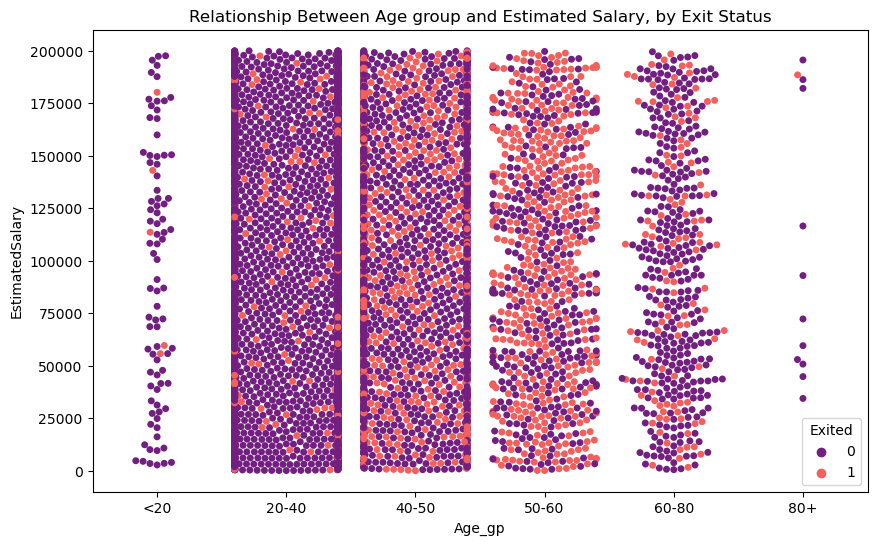

In [181]:
plt.figure(figsize=(10,6))
sns.swarmplot(df_gp,x='Age_gp',y='EstimatedSalary',hue='Exited', palette='magma')
plt.title('Relationship Between Age group and Estimated Salary, by Exit Status')
plt.show()

**Comments:<br>
From the above plot we can visualize that the proportion of customers in each age group who exited (1) or remained (0), with the percentage indicating the proportion of estimated salary contributed by each group to the total.**

**The main concern is for below 2 groups :<br>
Among customers aged 40 to 50 years, customers earning 34.48% of the total EstimatedSalary of the group exited.
For the age group of 50 to 60 years, customers earning 57.91% of the total EstimatedSalary of the group exited.**

### Balance - Exited

In [130]:
df_gp.Balance.describe()

count    10000.00
mean     76485.89
std      62397.41
min          0.00
25%          0.00
50%      97198.54
75%     127644.24
max     250898.09
Name: Balance, dtype: float64

<Axes: xlabel='Balance', ylabel='Exited'>

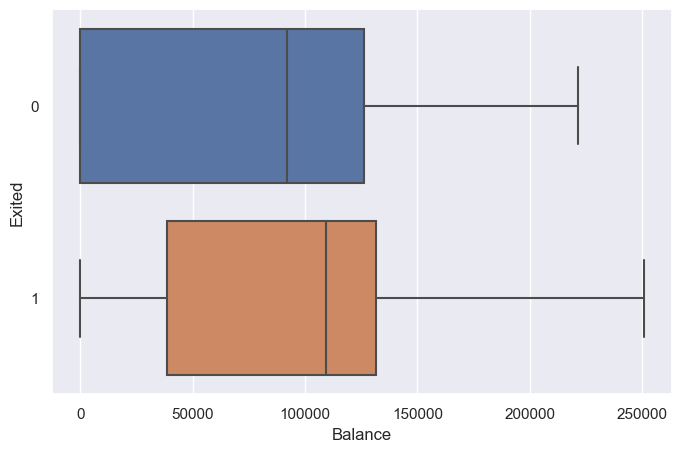

In [131]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Balance', y='Exited', data=df_gp, orient='h')

From the above box plots, we can see that trend is almost the same. However, some of the churns are from people having balance reaching 250000.

In [ ]:
plt.figure(figsize=(10,6))
sns.swarmplot(df_gp,x='EstimatedSalary',y='Balance',hue='Exited', palette='viridis')
plt.title('Relationship Between Estimated Salary and Balance, by Exit Status')
plt.show()

In [193]:
df_gp["Balance_gp"]=pd.cut(df.Balance,[0,50000,100000,120000,150000,200000,250000],labels=['<50000',"50000-100000","100000-120000", "120000-150000",'150000-200000',"200000+"])

In [194]:
df_gp['Balance']=df.Balance.astype(int)

In [140]:
df_gp.Balance.head()

0         0
1     83807
2    159660
3         0
4    125510
Name: Balance, dtype: int32

In [195]:
df_gp.Balance_gp.value_counts(normalize=True)*100

Balance_gp
120000-150000   34.66
100000-120000   25.35
50000-100000    23.64
150000-200000   14.65
<50000           1.18
200000+          0.52
Name: proportion, dtype: float64

In [196]:
df_gp.groupby("Balance_gp")["Exited"].describe()

count  mean  std  min  25%  50%  75%  max
Balance_gp                                               
<50000          75.00  0.35 0.48 0.00 0.00 0.00 1.00 1.00
50000-100000  1509.00  0.20 0.40 0.00 0.00 0.00 0.00 1.00
100000-120000 1618.00  0.28 0.45 0.00 0.00 0.00 1.00 1.00
120000-150000 2212.00  0.24 0.43 0.00 0.00 0.00 0.00 1.00
150000-200000  935.00  0.22 0.41 0.00 0.00 0.00 0.00 1.00
200000+         33.00  0.55 0.51 0.00 0.00 1.00 1.00 1.00

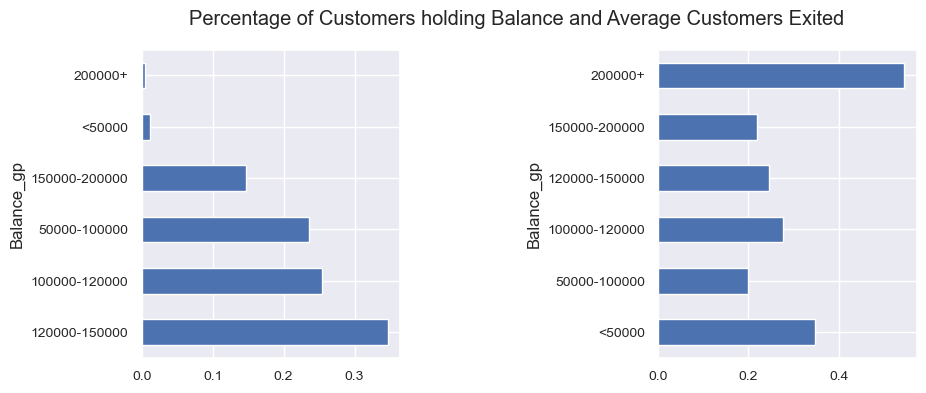

In [143]:
plt.figure(figsize=[10, 4])

# Plot 1
plt.subplot(1, 2, 1)
plt.xlabel('Percentage')  # X-axis label for the first subplot
df_gp["Balance_gp"].value_counts(normalize=True).plot.barh(fontsize=10)
plt.ylabel('Balance_gp')

# Plot 2
plt.subplot(1, 2, 2)
plt.xlabel('Average Customer Exited')  # X-axis label for the second subplot
df_gp.groupby("Balance_gp")["Exited"].mean().plot.barh(fontsize=10)
plt.ylabel('Balance_gp')

plt.suptitle('Percentage of Customers holding Balance and Average Customers Exited')
plt.subplots_adjust(wspace=1.0)
plt.show()

In [197]:
res_bec=df_gp.groupby(['Balance_gp','Exited']).agg({'CreditScore':['count','mean'],'Balance':['sum']})
res_bec

CreditScore           Balance
                           count   mean        sum
Balance_gp    Exited                              
<50000        0               49 666.73    1986696
              1               26 635.58     971827
50000-100000  0             1209 653.35  101428293
              1              300 647.22   25126423
100000-120000 0             1172 654.50  128983774
              1              446 646.17   49405474
120000-150000 0             1671 650.70  223322917
              1              541 643.87   72032928
150000-200000 0              730 654.12  120423955
              1              205 647.30   34026314
200000+       0               15 606.40    3122743
              1               18 671.44    3773473

In [145]:
chi_square('Exited','Balance_gp')

Actual values:

Balance_gp  <50000  50000-100000  100000-120000  120000-150000  150000-200000  \
Exited                                                                          
0               49          1209           1172           1671            730   
1               26           300            446            541            205   

Balance_gp  200000+  
Exited               
0                15  
1                18  
Expected values: 

[[  56.94923222 1145.81855218 1228.58476966 1679.62268881  709.96709495
    25.05766217]
 [  18.05076778  363.18144782  389.41523034  532.37731119  225.03290505
     7.94233783]]

Chi-square is : 49.21979518104631 

p_value is : 2.0011426413945258e-09 

degree of freedom is :5

There is statistiacally significant correlation between Exited and Balance_gp at 0.05 significant level


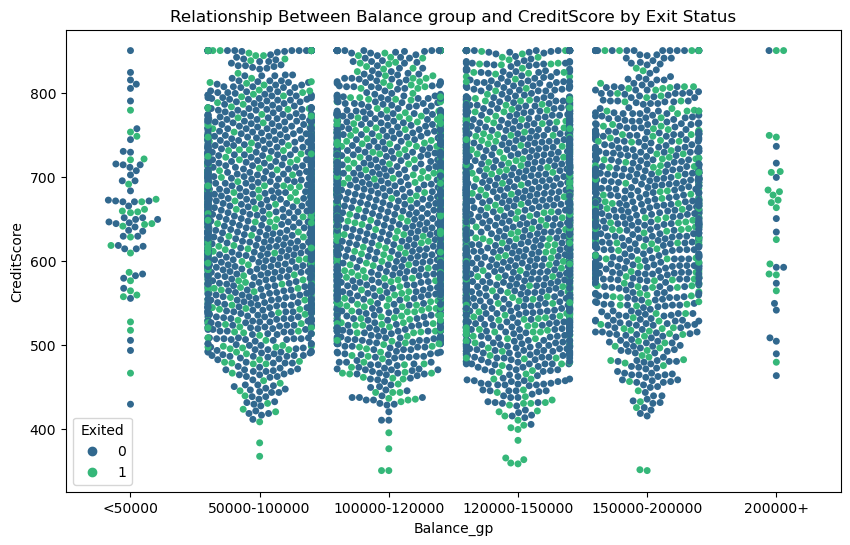

In [230]:
plt.figure(figsize=(10,6))
sns.swarmplot(df_gp,x='Balance_gp',y='CreditScore', hue='Exited', palette='viridis')
plt.title('Relationship Between Balance group and CreditScore by Exit Status')
plt.show()

**Comments:<br>
120000-150000 balance group constitutes 34.66% of the total observations and is the highest followed by 100000-120000 balance group at 25.35%.**

**Customers holding balance of 200K and above is the concern area. Average churn rate of the group is 55% as compared to all and is the highest, followed by the customers maintaining balance of 50000k and below at 35%.

### Credit Score - Exited

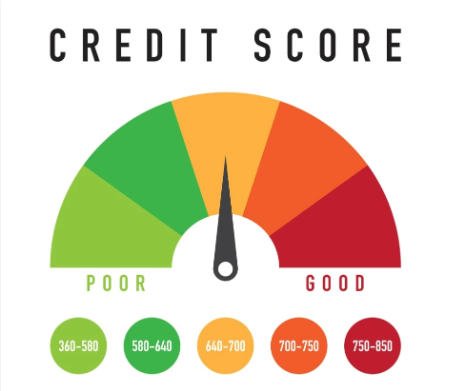

In [198]:
df_gp["CreditScore_gp"]=pd.cut(df.CreditScore,[0,360,580,640,700,750,850],labels=['<360',"360-580","580-640", "640-700",'700-750',"750+"])

In [199]:
df_gp.CreditScore_gp.value_counts(normalize=True)*100

CreditScore_gp
360-580   23.85
640-700   23.34
580-640   21.57
750+      15.98
700-750   15.18
<360       0.08
Name: proportion, dtype: float64

In [148]:
df_gp.groupby("CreditScore_gp").agg({"Exited":['mean','count']})

Exited      
                 mean count
CreditScore_gp             
<360             1.00     8
360-580          0.22  2385
580-640          0.21  2157
640-700          0.19  2334
700-750          0.20  1518
750+             0.20  1598

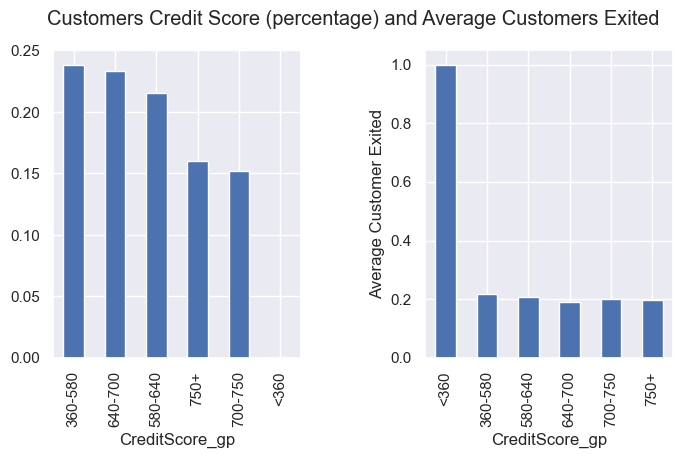

In [149]:
plt.figure(figsize=[8,4])
plt.subplot(1,2,1)
df_gp["CreditScore_gp"].value_counts(normalize=True).plot.bar()
plt.subplot(1,2,2)
plt.ylabel('Percentage')
df_gp.groupby("CreditScore_gp")["Exited"].mean().plot.bar()


plt.suptitle('Customers Credit Score (percentage) and Average Customers Exited')
plt.ylabel('Average Customer Exited')
plt.subplots_adjust(wspace=0.5)
plt.show()

**Comments:<br>
In the CreditScore_gp category, customers with scores between 360-580 and 640-700 represent the highest and second-highest proportions, at 23.85% and 23.34% respectively.**

**Credit scores ranging from 360 and below have an average exit portion of 1(100%) and have discontinued the service.It means all customers(8) holding credit score less than 360 have already exited the bank . 

In [150]:
df_gp.groupby('CreditScore_gp').agg({'Balance':['count','sum']})

Balance           
                 count        sum
CreditScore_gp                   
<360                 8     808943
360-580           2385  181687282
580-640           2157  162570646
640-700           2334  180421371
700-750           1518  113541282
750+              1598  125826191

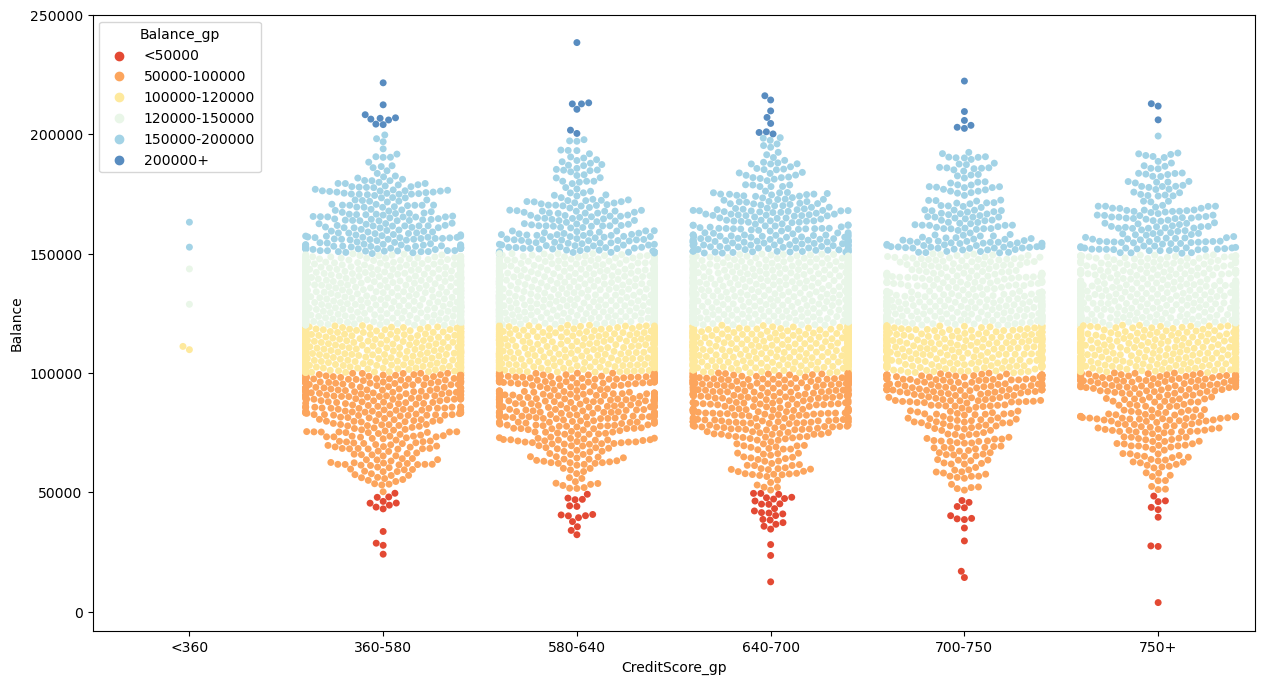

In [245]:
plt.figure(figsize=(15,8))
sns.swarmplot(df_gp,x='CreditScore_gp',y='Balance',hue='Balance_gp', palette='RdYlBu')
plt.show()

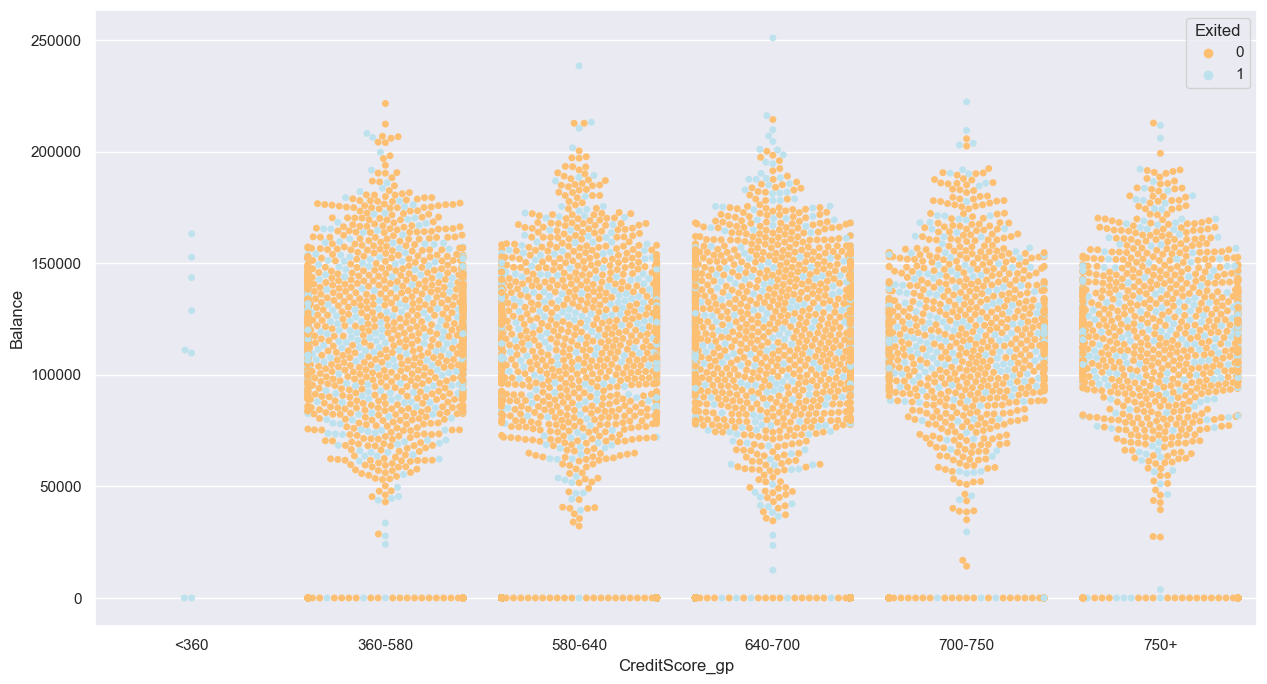

In [294]:
plt.figure(figsize=(15,8))
sns.swarmplot(df_gp,x='CreditScore_gp',y='Balance',hue='Exited', palette='RdYlBu')
plt.show()

In [151]:
Comp_CreSc_Bal_Exited=df_gp.groupby(['CreditScore_gp','Balance_gp'])['Exited'].mean()
comp_df=Comp_CreSc_Bal_Exited.unstack()
comp_df

Balance_gp      <50000  50000-100000  100000-120000  120000-150000  \
CreditScore_gp                                                       
<360               NaN           NaN           1.00           1.00   
360-580           0.54          0.22           0.32           0.26   
580-640           0.27          0.19           0.27           0.26   
640-700           0.38          0.20           0.22           0.23   
700-750           0.25          0.17           0.30           0.25   
750+              0.22          0.20           0.27           0.23   

Balance_gp      150000-200000  200000+  
CreditScore_gp                          
<360                     1.00      NaN  
360-580                  0.24     0.22  
580-640                  0.22     0.57  
640-700                  0.21     0.75  
700-750                  0.20     0.67  
750+                     0.21     0.67

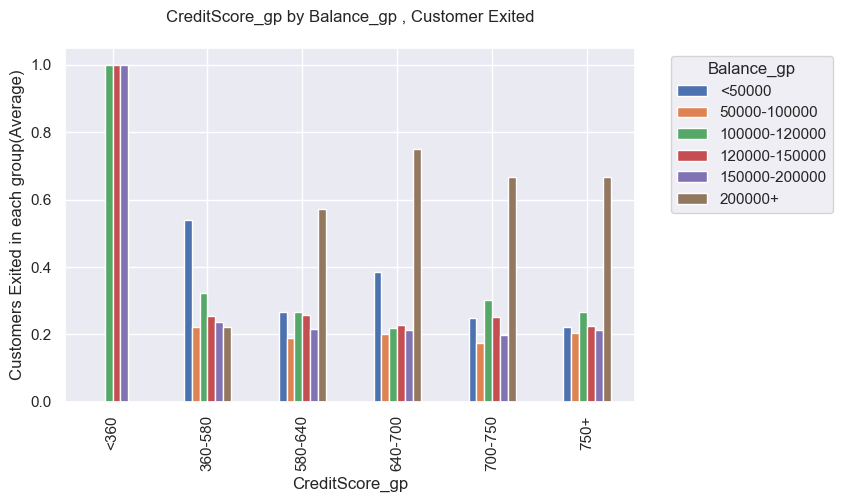

In [152]:
comp_df.plot.bar()
plt.tight_layout()
plt.title('CreditScore_gp by Balance_gp , Customer Exited\n')
plt.legend(title='Balance_gp', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel('Customers Exited in each group(Average)')
plt.show()

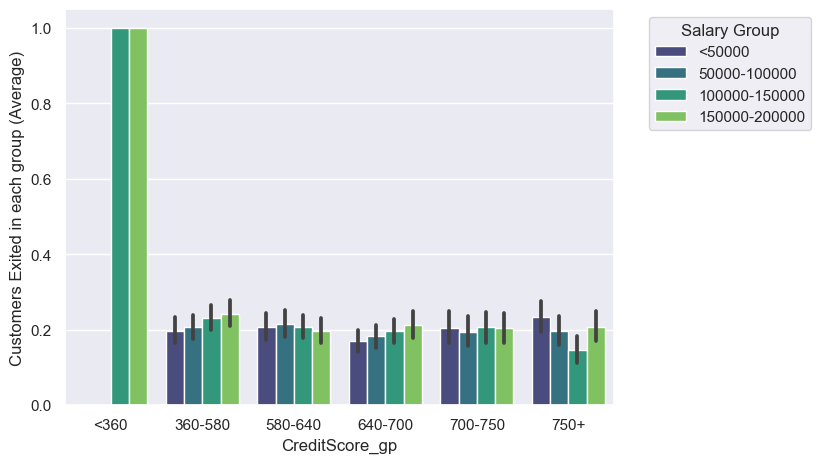

In [153]:
sns.barplot(data = df_gp, x='CreditScore_gp',y='Exited',hue='Salary_gp',palette='viridis')
plt.tight_layout()
plt.legend(title='Salary Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel('Customers Exited in each group (Average)')
plt.show()

In [153]:
chi_square('Balance_gp','CreditScore_gp')

Actual values:

CreditScore_gp  <360  360-580  580-640  640-700  700-750  750+
Balance_gp                                                    
<50000             0       13       15       26       12     9
50000-100000       0      338      340      354      236   241
100000-120000      2      382      337      377      254   266
120000-150000      2      552      484      503      299   372
150000-200000      2      214      184      234      146   155
200000+            0        9        7        8        6     3
Expected values: 

[[7.05108117e-02 1.77217173e+01 1.60647133e+01 1.76512065e+01
  1.11994673e+01 1.22923848e+01]
 [1.41867753e+00 3.56560953e+02 3.23222031e+02 3.55142275e+02
  2.25333281e+02 2.47322783e+02]
 [1.52115324e+00 3.82316515e+02 3.46569414e+02 3.80795362e+02
  2.41609840e+02 2.65187715e+02]
 [2.07959887e+00 5.22672516e+02 4.73801943e+02 5.20592918e+02
  3.30309621e+02 3.62543403e+02]
 [8.79034785e-01 2.20930743e+02 2.00273425e+02 2.20051708e+02
  1.39620025e+02 1.

In [154]:
chi_square('Exited','CreditScore_gp')

Actual values:

CreditScore_gp  <360  360-580  580-640  640-700  700-750  750+
Exited                                                        
0                  0     1863     1712     1891     1212  1285
1                  8      522      445      443      306   313
Expected values: 

[[6.3704000e+00 1.8991755e+03 1.7176191e+03 1.8585642e+03 1.2087834e+03
  1.2724874e+03]
 [1.6296000e+00 4.8582450e+02 4.3938090e+02 4.7543580e+02 3.0921660e+02
  3.2551260e+02]]

Chi-square is : 38.17144677609438 

p_value is : 3.485523154728192e-07 

degree of freedom is :5

********************************************
******************************************** 


In [156]:
chi_square('Age_gp','CreditScore_gp')

Actual values:

CreditScore_gp  <360  360-580  580-640  640-700  700-750  750+
Age_gp                                                        
<20                0       10       19       27       17    16
20-40              2     1525     1337     1475      963  1028
40-50              1      552      521      549      354   343
50-60              5      193      173      181      119   126
60-80              0      102      107       99       63    81
80+                0        3        0        3        2     4
Expected values: 

[[7.120000e-02 2.122650e+01 1.919730e+01 2.077260e+01 1.351020e+01
  1.422220e+01]
 [5.064000e+00 1.509705e+03 1.365381e+03 1.477422e+03 9.608940e+02
  1.011534e+03]
 [1.856000e+00 5.533200e+02 5.004240e+02 5.414880e+02 3.521760e+02
  3.707360e+02]
 [6.376000e-01 1.900845e+02 1.719129e+02 1.860198e+02 1.209846e+02
  1.273606e+02]
 [3.616000e-01 1.078020e+02 9.749640e+01 1.054968e+02 6.861360e+01
  7.222960e+01]
 [9.600000e-03 2.862000e+00 2.588400e+00 2.800

In [155]:
df_gp.head()

CreditScore Geography  Gender  Age  Tenure  Balance  NumOfProducts  \
0          619    France  Female   42       2        0              1   
1          608     Spain  Female   41       1    83807              1   
2          502    France  Female   42       8   159660              3   
3          699    France  Female   39       1        0              2   
4          850     Spain  Female   43       2   125510              1   

   HasCrCard  IsActiveMember  EstimatedSalary  ...  CreditScore_norm  \
0          1               1        101348.88  ...           1254.49   
1          0               1        112542.58  ...           1229.34   
2          1               0        113931.57  ...            990.09   
3          0               0         93826.63  ...           1439.12   
4          1               1         79084.10  ...           1794.88   

   Age_norm  EstimatedSalary_norm  Balance0  Balance_positive  Balance_norm  \
0      2.53               5151.74      0.00              1.00          0.00   
1      2.52               5550.87  83807.86          83808.86         28.90   
2      2.53               5599.58 159660.80         159661.80         32.42   
3      2.50               4876.38      0.00              1.00          0.00   
4      2.54               4317.35 125510.82         125511.82         31.07   

   Age_gp      Salary_gp     Balance_gp CreditScore_gp  
0   40-50  100000-150000            NaN        580-640  
1   40-50  100000-150000   50000-100000        580-640  
2   40-50  100000-150000  150000-200000        360-580  
3   20-40   50000-100000            NaN        640-700  
4   40-50   50000-100000  120000-150000           750+  

[5 rows x 21 columns]

Balance_gp  <50000  50000-100000  100000-120000  120000-150000  150000-200000  \
Gender                                                                          
Female        0.47          0.25           0.32           0.30           0.27   
Male          0.19          0.15           0.24           0.20           0.18   

Balance_gp  200000+  
Gender               
Female         0.62  
Male           0.47  


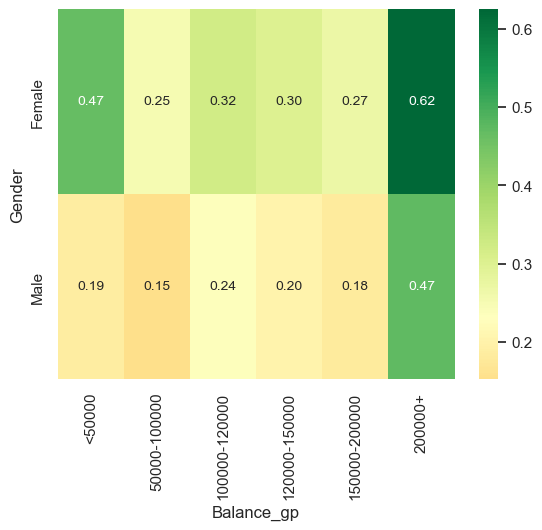

In [441]:
comp=pd.pivot_table(data=df_gp, index='Gender', columns='Balance_gp',values="Exited",fill_value=0)
sns.heatmap(comp, annot=True, annot_kws={"size": 10},cmap="RdYlGn", center=0.2308,fmt='.2f')
print(comp)

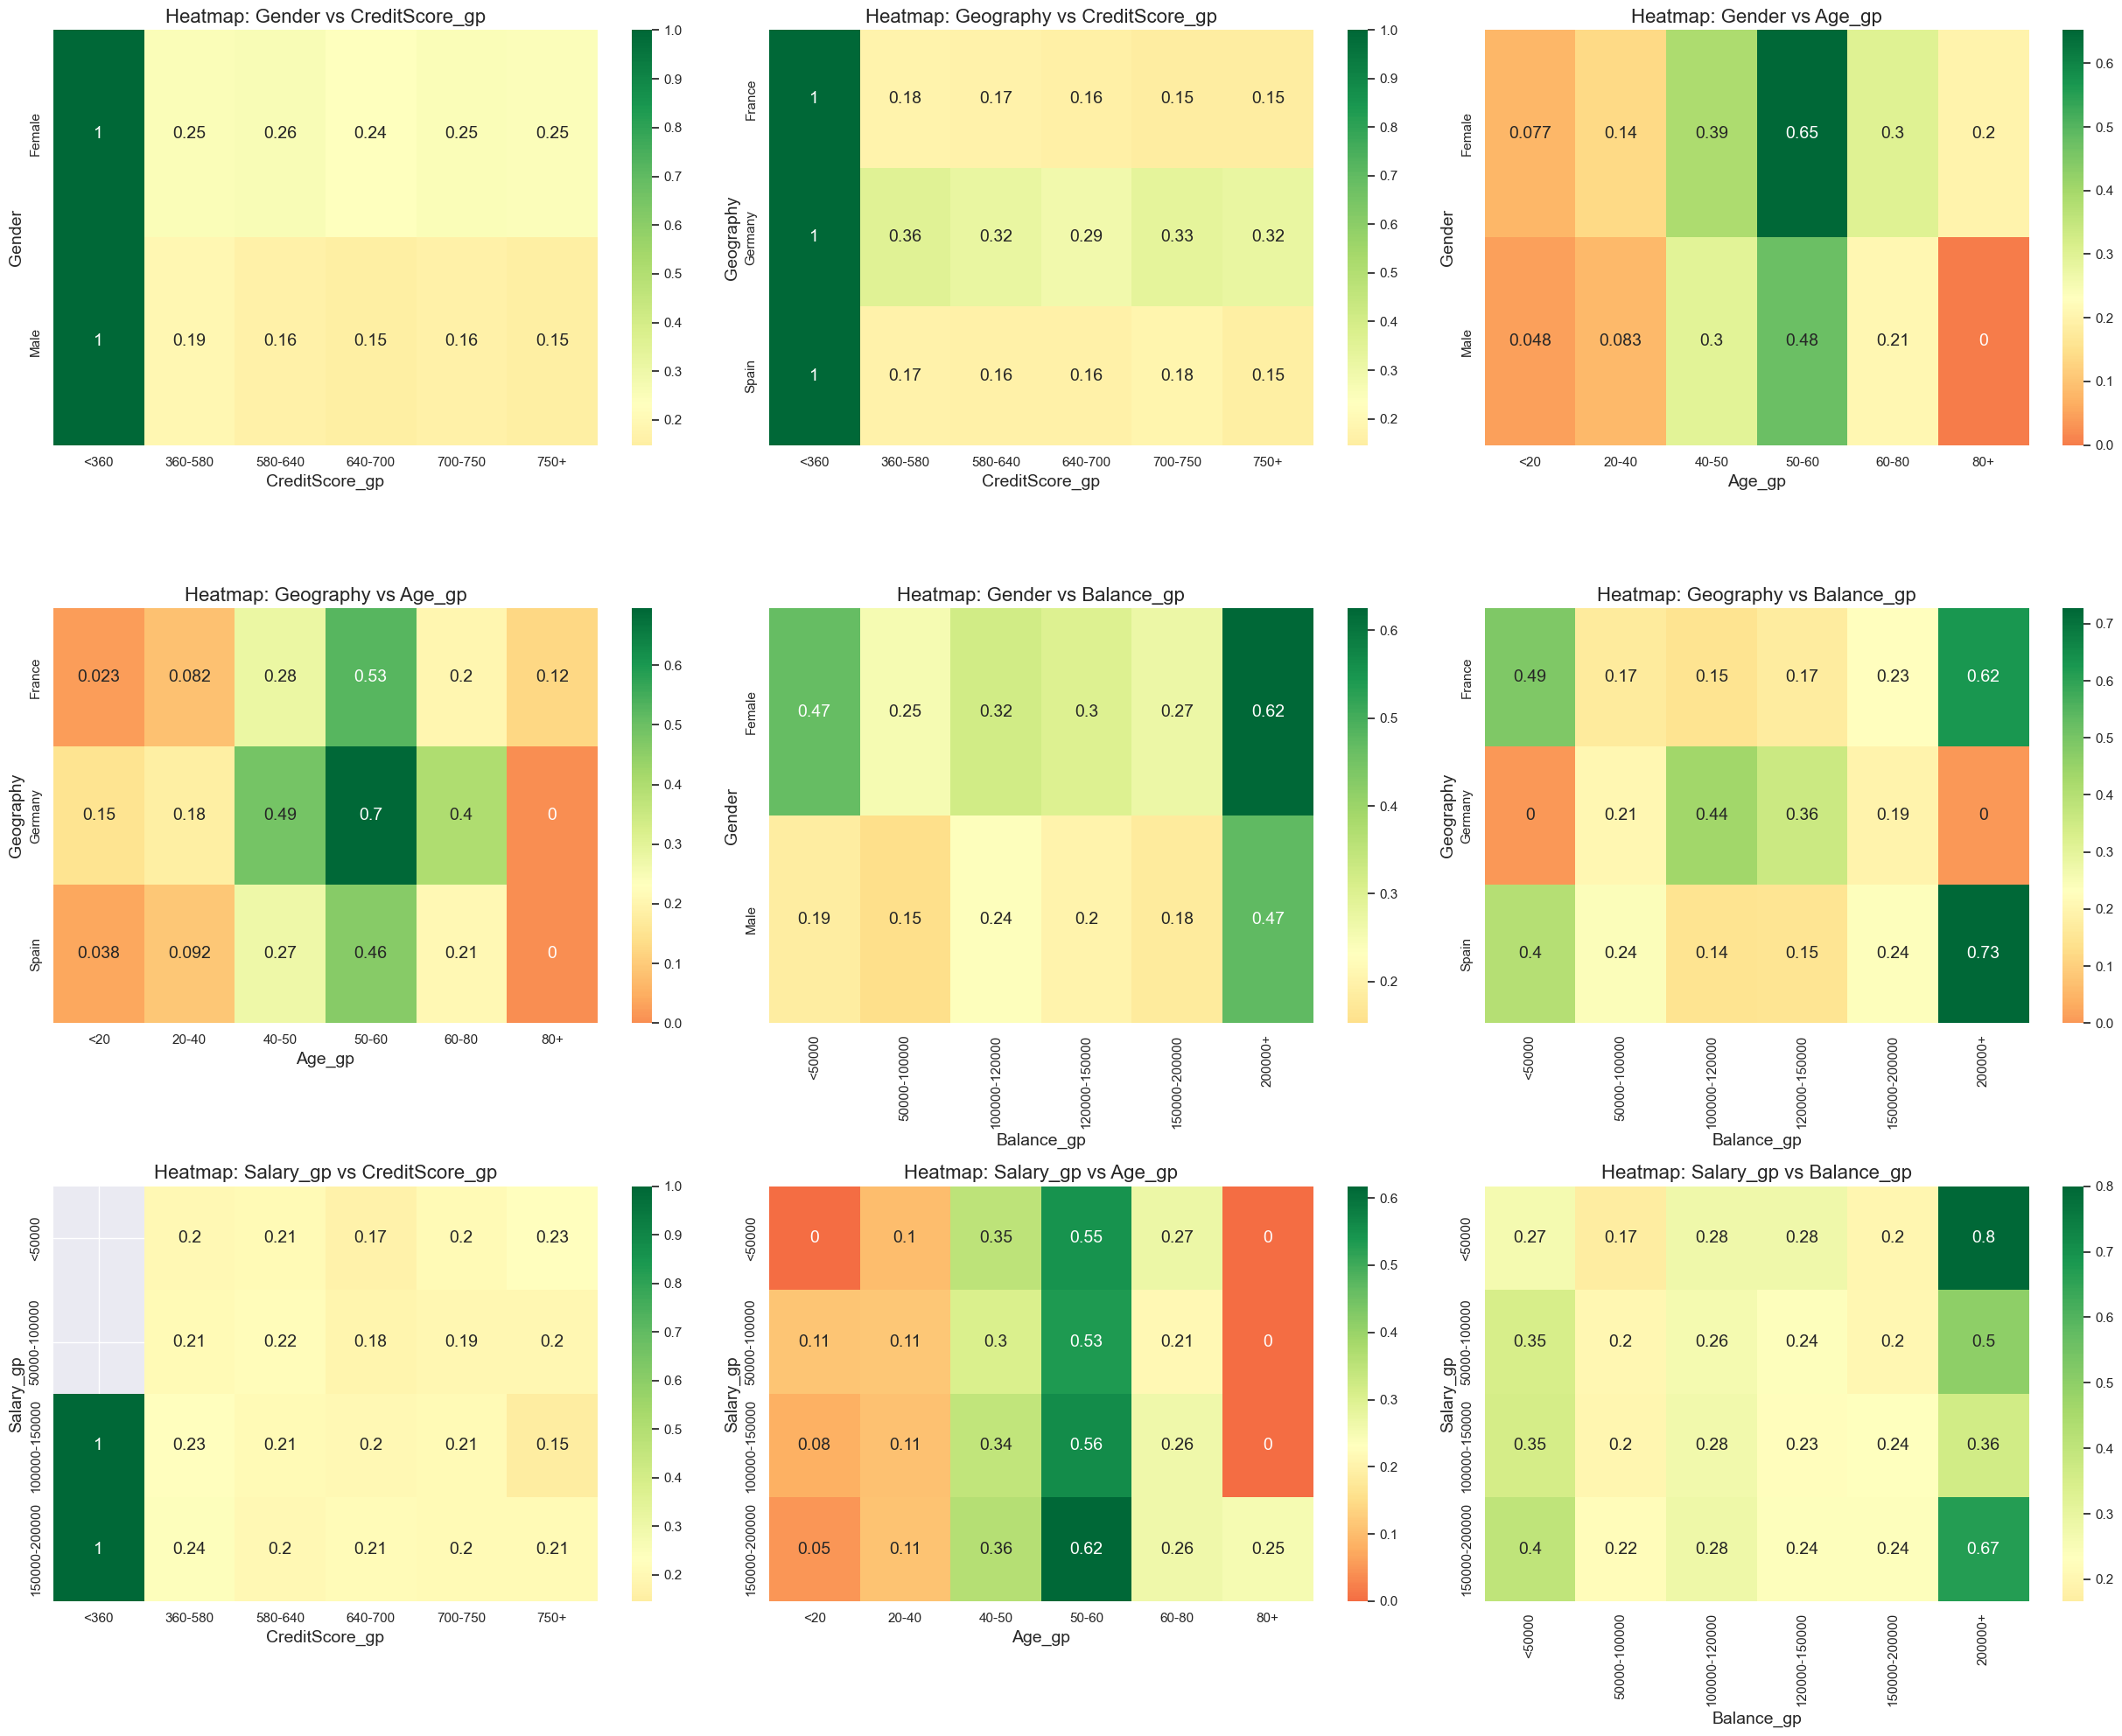

In [414]:

# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(25, 20))

# Reshape axes for easy iteration
axes = axes.flatten()

# Groupings for pivot tables
groupings = [("Gender", "CreditScore_gp"), ("Geography", "CreditScore_gp"), ("Gender", "Age_gp"), 
             ("Geography", "Age_gp"), ("Gender", "Balance_gp"), ("Geography", "Balance_gp"),
            ("Salary_gp", "CreditScore_gp"),("Salary_gp", "Age_gp"),("Salary_gp", "Balance_gp")]

# Plot each pivot table as heatmap
for i, (index, columns) in enumerate(groupings):
    res = pd.pivot_table(data=df_gp, index=index, columns=columns, values="Exited")
    sns.heatmap(res, annot=True, annot_kws={"size": 14},cmap="RdYlGn", center=0.2308, ax=axes[i])
    axes[i].set_title(f"Heatmap: {index} vs {columns}",fontsize=16)
    axes[i].set_xlabel(columns, fontsize=14)  
    axes[i].set_ylabel(index, fontsize=14) 
    
res
# Adjust layout
plt.tight_layout()
plt.show()

### Chi-Square Test

In [157]:
from scipy.stats import chi2_contingency
def chi_square(c1,c2):
    chi_2, p_val, dof, exp_val = chi2_contingency(pd.crosstab(df[c1],df[c2],margins = False))# make sure margins = False
    print("Actual values:\n")
    print(pd.crosstab(df[c1],df[c2],margins = False))
    print("="*100)
    print("Expected values: \n")
    print(exp_val)
    print("="*100)
    #print('\nChi-square is : %f'%chi_2, '\n\np_value is : %f'%p_val, '\n\ndegree of freedom is : %i'%dof)
    print(f'\nChi-square is : {chi_2}', f'\n\np_value is : {p_val}', f'\n\ndegree of freedom is :{dof}')
    print("="*100)
    if exp_val.min()<5 or np.sum(exp_val)<30 : print("\n********************************************\nWarning :We have some small expected \
values or the total number of observations is not enough to get any conclusion\n******************************************** ")
        #Note for sum of all values in dataframe use df.values.sum() and for numpy.ndarray use np.sum(arr)
    elif p_val < 0.05:# consider significan level is 5%
        print(F"\nThere is statistiacally significant correlation between {c1} and {c2} at 0.05 significant level")
    else:
        print(F"\nThere is no correlation between the two variables( we don't have enough evidence to conclude there is a a statistically significant relationship between {c1} and {c2}")        

In [81]:
df_gp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  int32  
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
 11  Age_gp           10000 non-null  object 
 12  Salary_gp        10000 non-null  object 
 13  Balance_gp       6382 non-null   object 
 14  CreditScore_gp   10000 non-null  object 
dtypes: float64(1), int32(1), int64(7), object(6)
memory usage: 1.1+ MB


In [158]:
df_gp[['Age_gp','Salary_gp','Balance_gp','CreditScore_gp']]=df_gp[['Age_gp','Salary_gp','Balance_gp','CreditScore_gp']].astype('object')

#### Categorical variables :

In [159]:
col_categorical= df_gp[['Geography','Gender','Age_gp','Salary_gp','Balance_gp','CreditScore_gp']].astype('object')

In [160]:
col_categorical

Geography  Gender Age_gp      Salary_gp     Balance_gp CreditScore_gp
0       France  Female  40-50  100000-150000            NaN        580-640
1        Spain  Female  40-50  100000-150000   50000-100000        580-640
2       France  Female  40-50  100000-150000  150000-200000        360-580
3       France  Female  20-40   50000-100000            NaN        640-700
4        Spain  Female  40-50   50000-100000  120000-150000           750+
...        ...     ...    ...            ...            ...            ...
9995    France    Male  20-40   50000-100000            NaN           750+
9996    France    Male  20-40  100000-150000   50000-100000        360-580
9997    France  Female  20-40         <50000            NaN        700-750
9998   Germany    Male  40-50   50000-100000   50000-100000           750+
9999    France  Female  20-40         <50000  120000-150000           750+

[10000 rows x 6 columns]

In [161]:
col_categorical.dtypes

Geography         object
Gender            object
Age_gp            object
Salary_gp         object
Balance_gp        object
CreditScore_gp    object
dtype: object

In [162]:
def cramers_V(var1,var2) :
    crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
    stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
    obs = np.sum(crosstab) # Number of observations
    mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
    return np.sqrt((stat/(obs*mini)))

In [163]:
rows = []

for var1 in col_categorical:
    col = []
    for var2 in col_categorical:
        cramers = cramers_V(col_categorical[var1], col_categorical[var2])  # Cramer's V test
        col.append(round(cramers, 2))  # Keeping of the rounded value of the Cramer's V
    rows.append(col)
rows

[[1.0, 0.03, 0.05, 0.01, 0.07, 0.02],
 [0.03, 1.0, 0.04, 0.03, 0.03, 0.02],
 [0.05, 0.04, 1.0, 0.02, 0.02, 0.03],
 [0.01, 0.03, 0.02, 1.0, 0.02, 0.03],
 [0.07, 0.03, 0.02, 0.02, 1.0, 0.03],
 [0.02, 0.02, 0.03, 0.03, 0.03, 1.0]]

In [164]:
cramers_results = np.array(rows)
df_cramers = pd.DataFrame(cramers_results, columns=col_categorical.columns, index=col_categorical.columns)
print(df_cramers)

                Geography  Gender  Age_gp  Salary_gp  Balance_gp  \
Geography            1.00    0.03    0.05       0.01        0.07   
Gender               0.03    1.00    0.04       0.03        0.03   
Age_gp               0.05    0.04    1.00       0.02        0.02   
Salary_gp            0.01    0.03    0.02       1.00        0.02   
Balance_gp           0.07    0.03    0.02       0.02        1.00   
CreditScore_gp       0.02    0.02    0.03       0.03        0.03   

                CreditScore_gp  
Geography                 0.02  
Gender                    0.02  
Age_gp                    0.03  
Salary_gp                 0.03  
Balance_gp                0.03  
CreditScore_gp            1.00  


<Axes: >

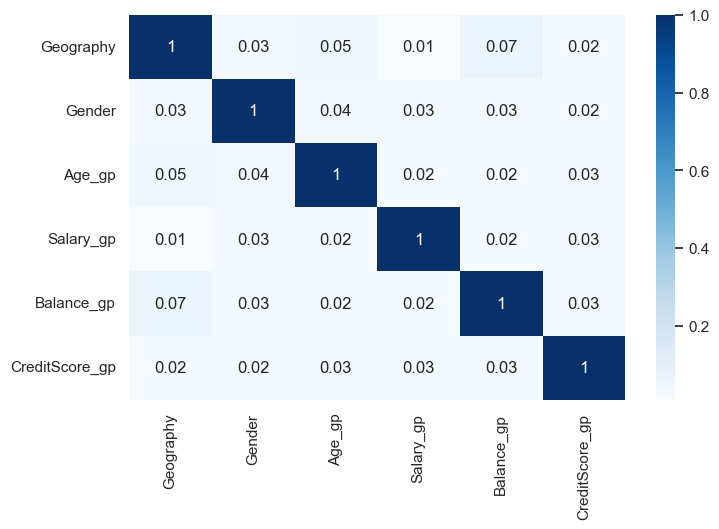

In [165]:
plt.figure(figsize=(8,5))
sns.heatmap(df_cramers, cmap="Blues", annot=True)

**Comments:<br>
All the coefficients suggest very weak correlation between the categorical variables, indicating that there's little to no significant association between the categories of these variables.**

### Analysing Correlation - Numerical Variables 

In [156]:
df_gp['EstimatedSalary']=df_gp['EstimatedSalary'].astype('int')

In [167]:
Numerical_cols = df_gp.select_dtypes(include='int').columns
Numerical_cols 

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [168]:
corr1=df_gp[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary']].corr()
corr1

CreditScore   Age  Tenure  Balance  NumOfProducts  HasCrCard  \
CreditScore             1.00 -0.00    0.00     0.01           0.01      -0.01   
Age                    -0.00  1.00   -0.01     0.03          -0.03      -0.01   
Tenure                  0.00 -0.01    1.00    -0.01           0.01       0.02   
Balance                 0.01  0.03   -0.01     1.00          -0.30      -0.01   
NumOfProducts           0.01 -0.03    0.01    -0.30           1.00       0.00   
HasCrCard              -0.01 -0.01    0.02    -0.01           0.00       1.00   
IsActiveMember          0.03  0.09   -0.03    -0.01           0.01      -0.01   
EstimatedSalary        -0.00 -0.01    0.01     0.01           0.01      -0.01   

                 IsActiveMember  EstimatedSalary  
CreditScore                0.03            -0.00  
Age                        0.09            -0.01  
Tenure                    -0.03             0.01  
Balance                   -0.01             0.01  
NumOfProducts              0.01             0.01  
HasCrCard                 -0.01            -0.01  
IsActiveMember             1.00            -0.01  
EstimatedSalary           -0.01             1.00

<Axes: >

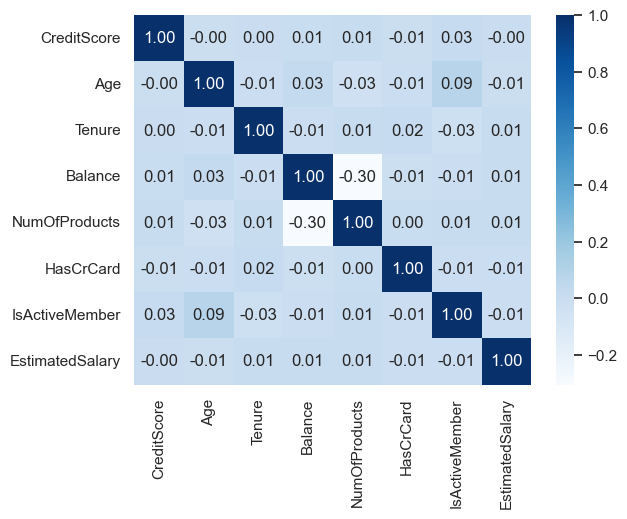

In [169]:
sns.heatmap(corr1,annot=True,fmt='.2f',cmap='Blues')

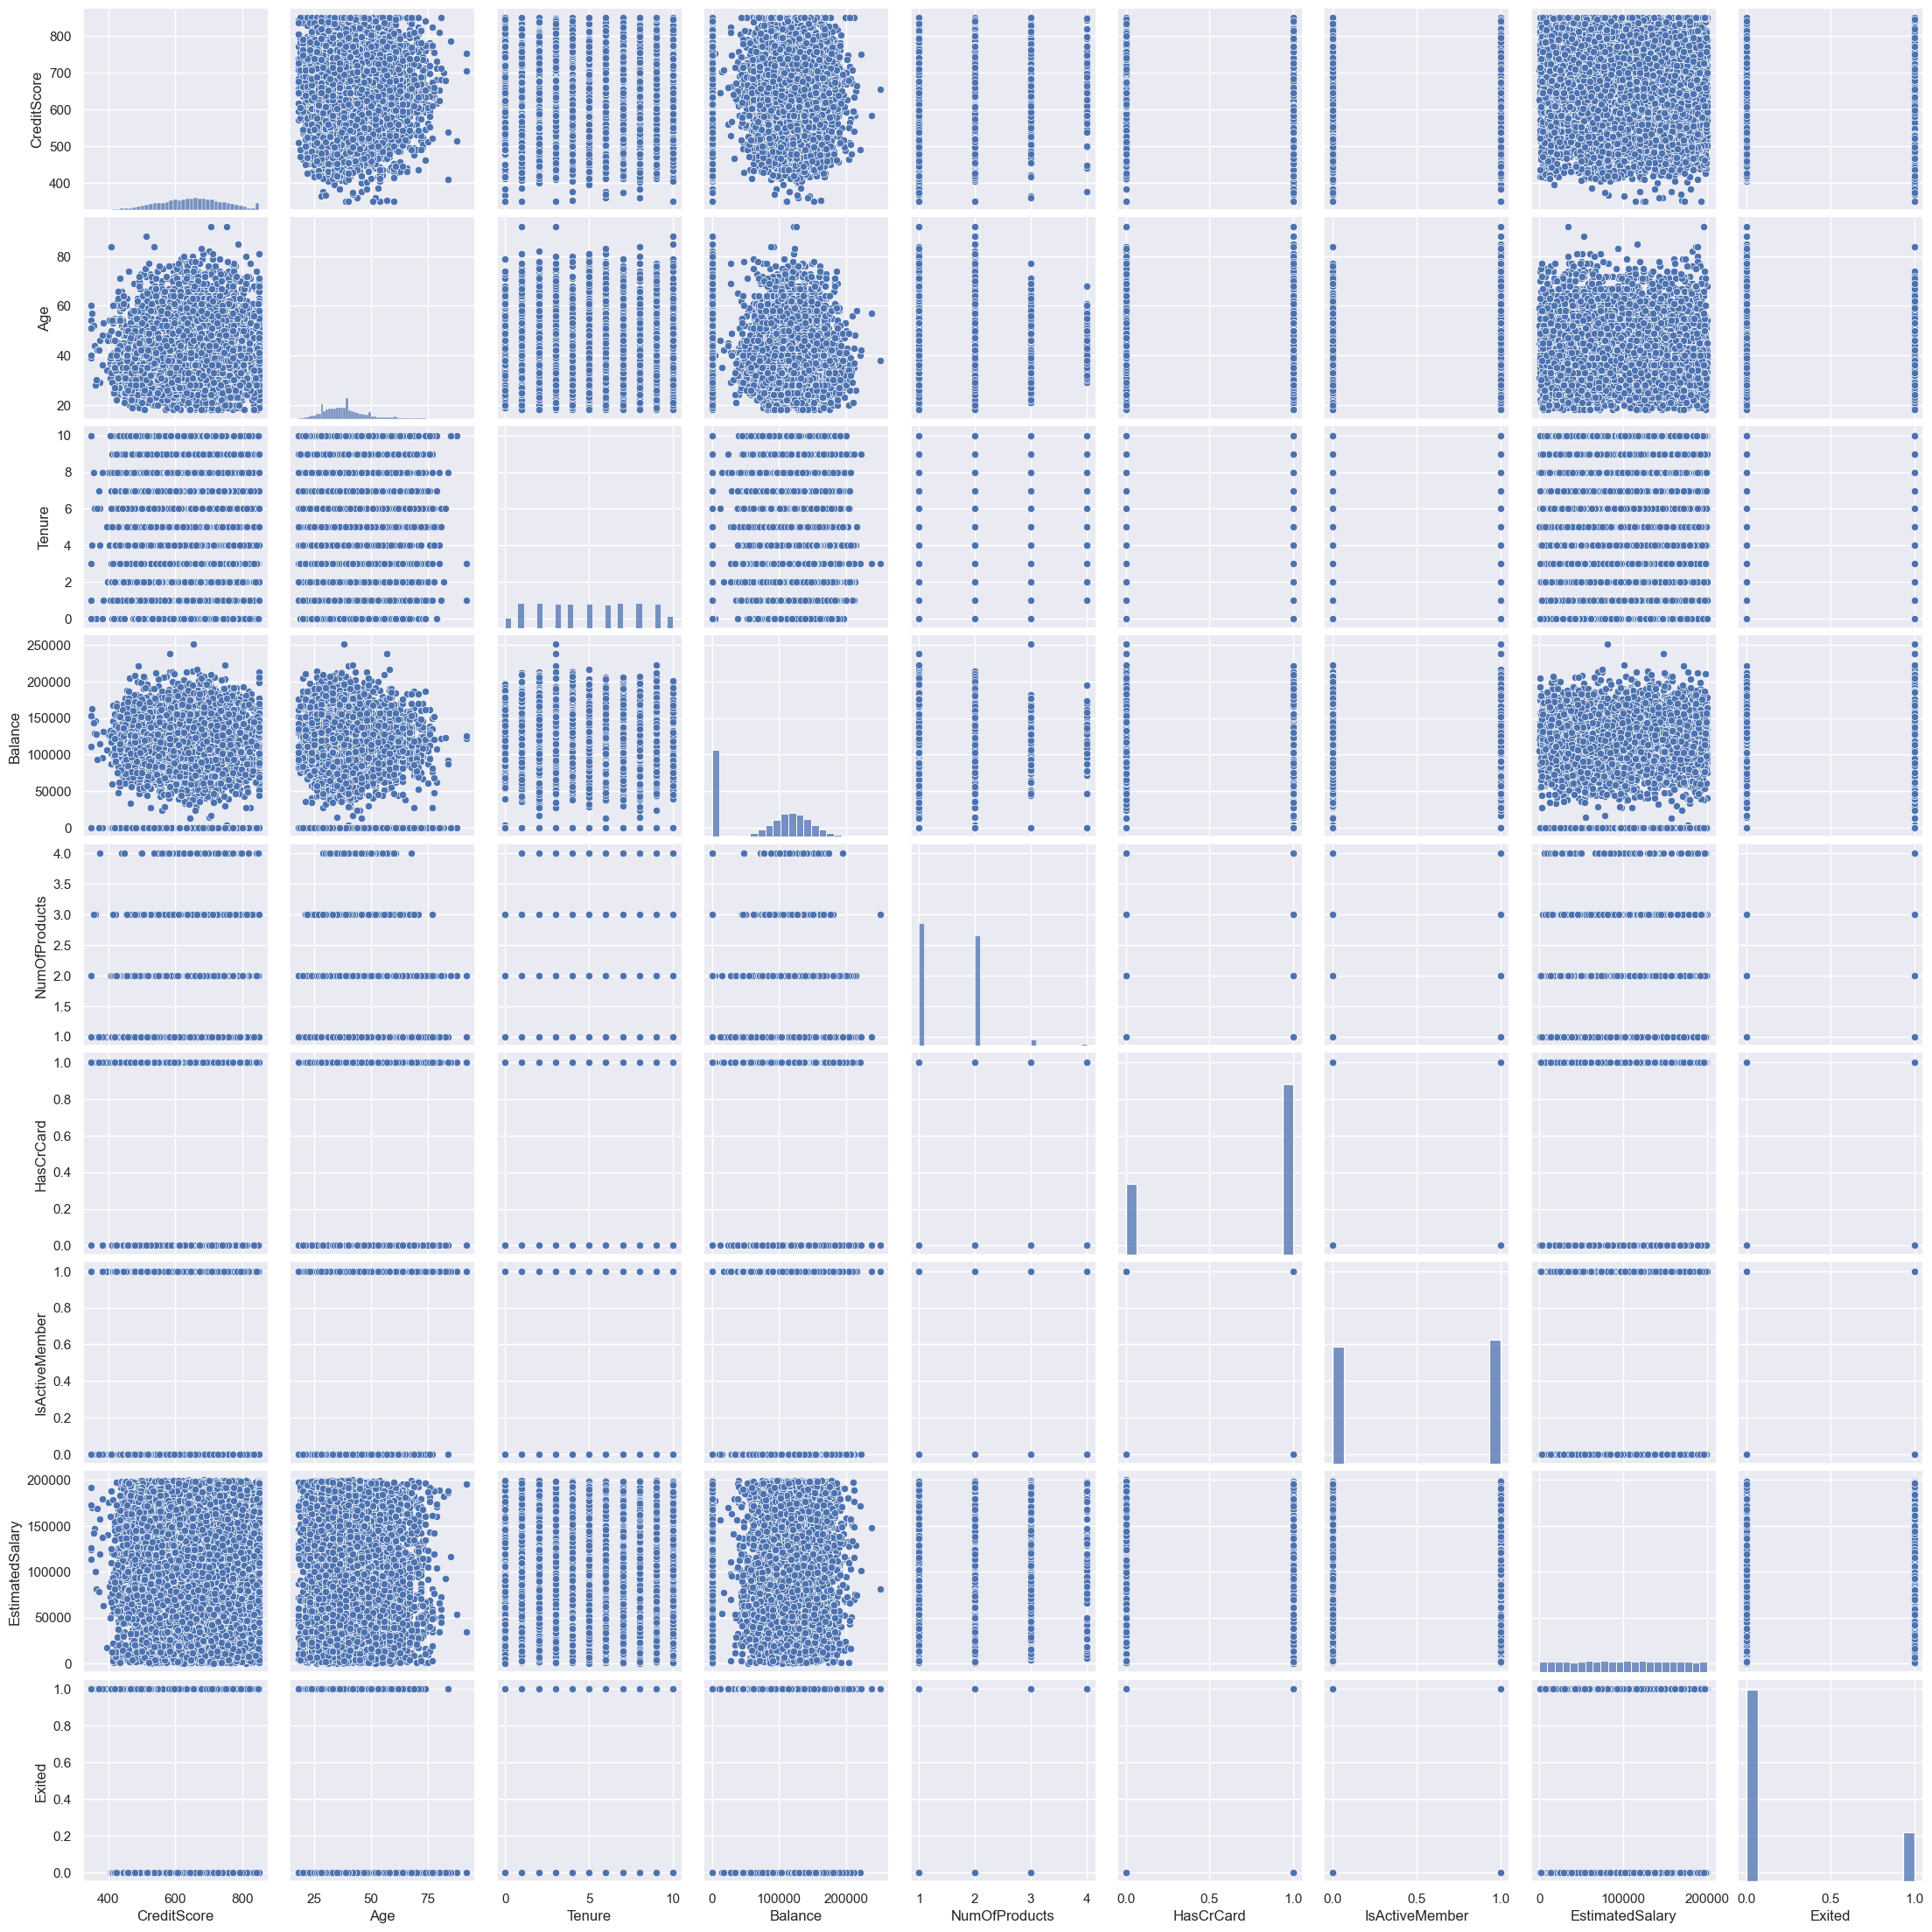

In [170]:
sns.pairplot(df_gp[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited']])

**Comments:<br>
Age, balance, and active membership status appear to have some influence on the likelihood of customers exiting, while other variables such as credit score, tenure, and estimated salary show little to no significant correlation with the likelihood of exiting. These insights can be valuable for businesses in understanding customer behavior and implementing strategies to improve customer retention.**

### One Hot Encoding 

In [200]:
df_gp.head()

CreditScore Geography  Gender  Age  Tenure  Balance  NumOfProducts  \
0          619    France  Female   42       2        0              1   
1          608     Spain  Female   41       1    83807              1   
2          502    France  Female   42       8   159660              3   
3          699    France  Female   39       1        0              2   
4          850     Spain  Female   43       2   125510              1   

   HasCrCard  IsActiveMember  EstimatedSalary  ...  CreditScore_norm  \
0          1               1        101348.88  ...           1254.49   
1          0               1        112542.58  ...           1229.34   
2          1               0        113931.57  ...            990.09   
3          0               0         93826.63  ...           1439.12   
4          1               1         79084.10  ...           1794.88   

   Age_norm  EstimatedSalary_norm  Balance0  Balance_positive  Balance_norm  \
0      2.53               5151.74      0.00              1.00          0.00   
1      2.52               5550.87  83807.86          83808.86         28.90   
2      2.53               5599.58 159660.80         159661.80         32.42   
3      2.50               4876.38      0.00              1.00          0.00   
4      2.54               4317.35 125510.82         125511.82         31.07   

   Age_gp      Salary_gp     Balance_gp CreditScore_gp  
0   40-50  100000-150000            NaN        580-640  
1   40-50  100000-150000   50000-100000        580-640  
2   40-50  100000-150000  150000-200000        360-580  
3   20-40   50000-100000            NaN        640-700  
4   40-50   50000-100000  120000-150000           750+  

[5 rows x 21 columns]

In [201]:
df_bin=df_gp[:]

In [202]:
df_gp.shape

(10000, 21)

In [203]:
df1=df_gp.drop(['Balance0','CreditScore','Balance_gp','CreditScore_gp','Balance_positive','Age_gp','Balance','Age','EstimatedSalary','Salary_gp'],axis=1)

In [204]:
df1.head()

Geography  Gender  Tenure  NumOfProducts  HasCrCard  IsActiveMember  Exited  \
0    France  Female       2              1          1               1       1   
1     Spain  Female       1              1          0               1       0   
2    France  Female       8              3          1               0       1   
3    France  Female       1              2          0               0       0   
4     Spain  Female       2              1          1               1       0   

   CreditScore_norm  Age_norm  EstimatedSalary_norm  Balance_norm  
0           1254.49      2.53               5151.74          0.00  
1           1229.34      2.52               5550.87         28.90  
2            990.09      2.53               5599.58         32.42  
3           1439.12      2.50               4876.38          0.00  
4           1794.88      2.54               4317.35         31.07

In [205]:
df1.shape

(10000, 11)

In [206]:
col = df1[['Geography','Gender']]
col_onehot=pd.get_dummies(col,drop_first=True).astype(int)

In [207]:
col_onehot.head()

Geography_Germany  Geography_Spain  Gender_Male
0                  0                0            0
1                  0                1            0
2                  0                0            0
3                  0                0            0
4                  0                1            0

In [208]:
df1=pd.concat([df1,col_onehot],axis=1)
df1.head()

Geography  Gender  Tenure  NumOfProducts  HasCrCard  IsActiveMember  Exited  \
0    France  Female       2              1          1               1       1   
1     Spain  Female       1              1          0               1       0   
2    France  Female       8              3          1               0       1   
3    France  Female       1              2          0               0       0   
4     Spain  Female       2              1          1               1       0   

   CreditScore_norm  Age_norm  EstimatedSalary_norm  Balance_norm  \
0           1254.49      2.53               5151.74          0.00   
1           1229.34      2.52               5550.87         28.90   
2            990.09      2.53               5599.58         32.42   
3           1439.12      2.50               4876.38          0.00   
4           1794.88      2.54               4317.35         31.07   

   Geography_Germany  Geography_Spain  Gender_Male  
0                  0                0            0  
1                  0                1            0  
2                  0                0            0  
3                  0                0            0  
4                  0                1            0

In [209]:
df1.drop(['Geography','Gender'],axis=1,inplace=True)

In [210]:
df1.shape

(10000, 12)

In [211]:
df1.head()

Tenure  NumOfProducts  HasCrCard  IsActiveMember  Exited  CreditScore_norm  \
0       2              1          1               1       1           1254.49   
1       1              1          0               1       0           1229.34   
2       8              3          1               0       1            990.09   
3       1              2          0               0       0           1439.12   
4       2              1          1               1       0           1794.88   

   Age_norm  EstimatedSalary_norm  Balance_norm  Geography_Germany  \
0      2.53               5151.74          0.00                  0   
1      2.52               5550.87         28.90                  0   
2      2.53               5599.58         32.42                  0   
3      2.50               4876.38          0.00                  0   
4      2.54               4317.35         31.07                  0   

   Geography_Spain  Gender_Male  
0                0            0  
1                1            0  
2                0            0  
3                0            0  
4                1            0

In [212]:
def model_results(name, X_tr, y_tr, X_te, y_te, model, folds, Class_weight="N/A" ):
    '''
    creates an entry to add to the results dataframe
    name: name of the model  
    ytrain: true value of y
    xtrain: features 
    model: model to be fit
    folds: number of folds in cv
    class_weight : Weights associated with classes 
    '''
    #train the model & predict
    model.fit(X_tr,y_tr)
    y_pred = model.predict(X_te)
    y_pred_train=model.predict(X_tr)
    y_pred_proba=model.predict_proba(X_te)
    train_accuracy_score =accuracy_score(y_tr,y_pred_train)
    test_accuracy_score =accuracy_score(y_te,y_pred)
    train_f1_score =round(metrics.f1_score(y_tr,y_pred_train),2)
    test_f1_score =round(metrics.f1_score(y_te,y_pred),2) 
    train_recall =round(recall_score(y_tr,y_pred_train),2)
    test_recall =round(recall_score(y_te,y_pred),2)
    print('Classification_report - TEST SET:\n')
    print(classification_report(y_te,y_pred))
    print("="*100)
    
    # Compute and plot the Confusion matrix
    cnf_matrix = metrics.confusion_matrix(y_te, y_pred)
    disp = metrics.ConfusionMatrixDisplay(cnf_matrix)
    disp.plot()
    plt.show()
    print("="*100)
    
    print('train f1 score:\n')
    print(round(metrics.f1_score(y_tr,y_pred_train),4))
    print("="*100)
    
    print('test f1 score:\n')
    print(round(metrics.f1_score(y_te,y_pred),4))
    print("="*100)
    
    # Compute and plot RoC Curve
    
    fpr, tpr, _ = roc_curve(y_te, y_pred_proba[:, 1])  # Use the probabilities of the positive class
    roc_auc = metrics.auc(fpr, tpr)
    display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=name)
    display.plot()
    plt.show()


    # Cross validation scores for the model. 
    auc=cross_val_score(model,X_tr,y_tr,cv=folds, n_jobs=-1,scoring='roc_auc').mean()
    Accuracy=cross_val_score(model,X_tr,y_tr,cv=folds, n_jobs=-1).mean()
    scores = cross_val_score(model,X_tr,y_tr,cv=folds, n_jobs=-1,scoring='f1')
    f1score=scores.mean()

    entry = {'Model': [name],
         'Class_weight' : [Class_weight],
         'AUC-Train':[auc],
         'AUC-Test':[roc_auc],
         'train_recall_pos_class': [train_recall],
         'test_recall_pos_class': [test_recall],
         'train_accuracy_score': [train_accuracy_score],
         'test_accuracy_score': [test_accuracy_score],
         'train_f1_score': [train_f1_score],
         'test_f1_score': [test_f1_score],
         'CrossVal_Mean(Accuracy)': [Accuracy],  
         'CrossVal_Mean(F1_score)': [f1score],
         'CrossVal1(f1)': [scores[0]],
         'CrossVal2(f1)': [scores[1]],
         'CrossVal3(f1)': [scores[2]],
         'CrossVal4(f1)': [scores[3]],
         'CrossVal5(f1)': [scores[4]],
          }


    result = pd.DataFrame(entry)
    return result


## Data Preprocessing - Removing Outliers

In [213]:
X = df1.drop(['Exited'], axis = 1)
y = df1['Exited']
X.shape

(10000, 11)

In [214]:
from sklearn.neighbors import LocalOutlierFactor
lof=LocalOutlierFactor(n_neighbors=20)# LOF initialized with 
res=lof.fit_predict(X)
X_not_outlier=X[res !=-1]
y_not_outlier=y[res !=-1]

In [215]:
X_not_outlier.shape,y_not_outlier.shape

((9974, 11), (9974,))

In [216]:
df2=pd.concat([X_not_outlier,y_not_outlier],axis=1)
df2.shape

(9974, 12)

In [217]:
X_outlier=X[res ==-1]#Number of outliers
y_outlier=y[res ==-1]

In [218]:
df_out=pd.concat([X_outlier,y_outlier],axis=1)
df_out.shape

(26, 12)

In [219]:
df2.head()

Tenure  NumOfProducts  HasCrCard  IsActiveMember  CreditScore_norm  \
0       2              1          1               1           1254.49   
1       1              1          0               1           1229.34   
2       8              3          1               0            990.09   
3       1              2          0               0           1439.12   
4       2              1          1               1           1794.88   

   Age_norm  EstimatedSalary_norm  Balance_norm  Geography_Germany  \
0      2.53               5151.74          0.00                  0   
1      2.52               5550.87         28.90                  0   
2      2.53               5599.58         32.42                  0   
3      2.50               4876.38          0.00                  0   
4      2.54               4317.35         31.07                  0   

   Geography_Spain  Gender_Male  Exited  
0                0            0       1  
1                1            0       0  
2                0            0       1  
3                0            0       0  
4                1            0       0

In [220]:
df2.shape

(9974, 12)

### REF

In [179]:
X=df2.drop('Exited',axis=1)
y=df2.Exited

In [181]:
X_train, X_test, y_train,y_test = train_test_split(X, y,stratify=y,shuffle = True,test_size=0.20,random_state=1)

In [183]:
from sklearn.metrics import precision_score, recall_score
def sm_model_evaluation (model, x_test, y_test, columns):
    '''
    model = sm model
    y_test = series of labels 
    columns = list of columns in features
    x_test = test dataframe 
    '''
    X_sm = sm.add_constant(x_test[columns],has_constant='add')
    y_pred = res.predict(X_sm)
    y_test.reset_index(drop=True,inplace=True)
    y_pred.reset_index(drop=True,inplace=True)
    y_train_pred_final = pd.DataFrame({'y':y_test, 'y_Prob':y_pred})
    y_train_pred_final['predicted'] = y_train_pred_final.y_Prob.map(lambda x: 1 if x > 0.5 else 0)
    # Let's check the overall accuracy.
    print("Acuracy:\n")
    ac=metrics.accuracy_score(y_train_pred_final.y, y_train_pred_final.predicted)
    print(ac)
    print("="*100)
    # Let's check the f1_score.
    print('f1 score:\n')
    f=round(f1_score(y_train_pred_final.y, y_train_pred_final.predicted),4)
    print(f)
    print("="*100)
    confusion = metrics.confusion_matrix(y_train_pred_final.y, y_train_pred_final.predicted )
    print("Confusion Matrix:\n")
    print(confusion)
    print("="*100)
    print('classification_report:\n')
    print(classification_report(y_train_pred_final.y, y_train_pred_final.predicted))
    R=round(recall_score(y_train_pred_final.y, y_train_pred_final.predicted),4)
    P=round(precision_score(y_train_pred_final.y, y_train_pred_final.predicted),4)
    return ac,f,R,P

In [184]:
RFE_df = pd.DataFrame( columns = ['Number of features','Accuracy','Recall','Precision','f1_score'])
LR_WB= LogisticRegression(class_weight='balanced',random_state=1234)
#acuuracy_scores=[]
#f_scores=[]
j=1
for i in range(2, 12,2):
    rfe = RFE(LR, n_features_to_select = i)           
    rfe = rfe.fit(X_train, y_train)
    col = X_train.columns[rfe.support_]
    X_train_sm = sm.add_constant(X_train[col],has_constant='add')
    y_train1=y_train.values.reshape(-1,1)
    logm2 = sm.GLM(y_train1,X_train_sm, family = sm.families.Binomial())
    res = logm2.fit()
    print ("*"*100)
    print ("*"*100)
    print ("i=",i)
    a,f,R,P=sm_model_evaluation (res, X_test, y_test, col)
#   acuuracy_scores.append(a)
#   f_scores.append(f)
    RFE_df.loc[j] =[ i ,a,R,P,f]
    j=j+1

****************************************************************************************************
****************************************************************************************************
i= 2
Acuracy:

0.8130325814536341
f1 score:

0.2584
Confusion Matrix:

[[1557   34]
 [ 339   65]]
classification_report:

              precision    recall  f1-score   support

           0       0.82      0.98      0.89      1591
           1       0.66      0.16      0.26       404

    accuracy                           0.81      1995
   macro avg       0.74      0.57      0.58      1995
weighted avg       0.79      0.81      0.76      1995

****************************************************************************************************
****************************************************************************************************
i= 4
Acuracy:

0.8150375939849624
f1 score:

0.3583
Confusion Matrix:

[[1523   68]
 [ 301  103]]
classification_report:

              precision  

In [185]:
RFE_df

Number of features  Accuracy  Recall  Precision  f1_score
1                2.00      0.81    0.16       0.66      0.26
2                4.00      0.82    0.26       0.60      0.36
3                6.00      0.82    0.25       0.61      0.36
4                8.00      0.82    0.26       0.62      0.36
5               10.00      0.81    0.26       0.60      0.36

Text(0.5, 1.0, 'Finding optimal number of features')

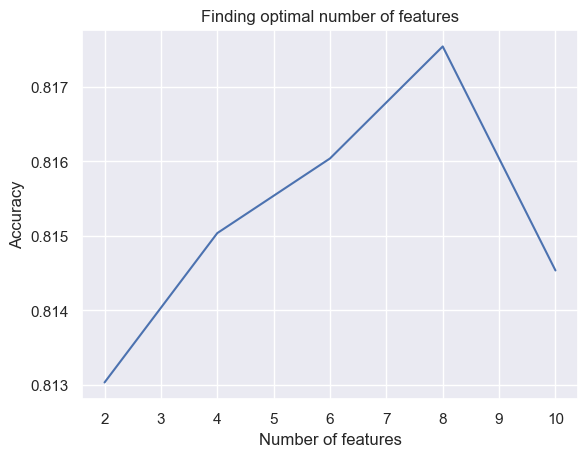

In [186]:
plt.plot(range(2, 12,2),RFE_df.Accuracy)
plt.xlabel("Number of features")
plt.ylabel("Accuracy")
plt.title("Finding optimal number of features")

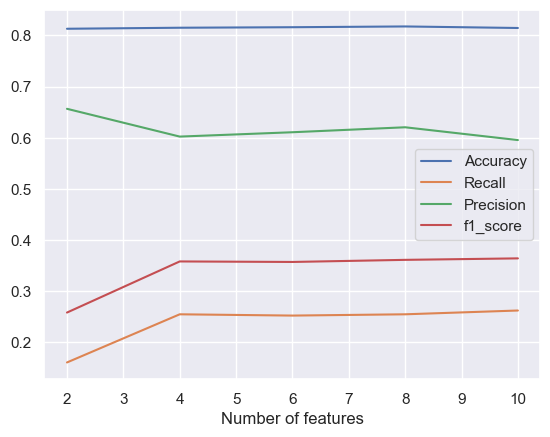

In [187]:
RFE_df.plot.line(x='Number of features', y=['Accuracy','Recall','Precision','f1_score'])
plt.show()

In [188]:
rfe = RFE(LR, n_features_to_select = 8)           # running RFE with 8 variable output.
rfe = rfe.fit(X_train, y_train)
col = X_train.columns[rfe.support_]
X_train_sm = sm.add_constant(X_train[col])
y_train1=y_train.values.reshape(-1,1)
logm2 = sm.GLM(y_train1,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
sm_model_evaluation (res, X_test, y_test, col)

Acuracy:

0.8175438596491228
f1 score:

0.3614
Confusion Matrix:

[[1528   63]
 [ 301  103]]
classification_report:

              precision    recall  f1-score   support

           0       0.84      0.96      0.89      1591
           1       0.62      0.25      0.36       404

    accuracy                           0.82      1995
   macro avg       0.73      0.61      0.63      1995
weighted avg       0.79      0.82      0.79      1995



(0.8175438596491228, 0.3614, 0.255, 0.6205)

### Feature Elimination using VIF - Analyzing Multicollinearity Assumption

In [221]:
def multicollinearity_assumption(model, features, label, feature_names=None):
    """
    Multicollinearity: Assumes that predictors are not correlated with each other. If there is
                       correlation among the predictors, then either remove prepdictors with high
                       Variance Inflation Factor (VIF) values or perform dimensionality reduction
                           
                       This assumption being violated causes issues with interpretability of the 
                       coefficients and the standard errors of the coefficients.
    """
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    
    print('Assumption 2: Little to no multicollinearity among predictors')
        
    # Plotting the heatmap
    plt.figure(figsize = (18,10))
    sns.heatmap(pd.DataFrame(features, columns=feature_names).corr(), annot=True,annot_kws={'size':14},fmt='.2f',cmap='coolwarm')
    plt.title('Correlation of Variables')
    plt.show()
        
    print('Variance Inflation Factors (VIF)')
    print('> 10: An indication that multicollinearity may be present')
    print('> 100: Certain multicollinearity among the variables')
    print('-------------------------------------')
       
    # Gathering the VIF for each variable
    VIF = [variance_inflation_factor(features, i) for i in range(features.shape[1])]
    for idx, vif in enumerate(VIF):
        print('{0}: {1}'.format(feature_names[idx], vif))
        
    # Gathering and printing total cases of possible or definite multicollinearity
    possible_multicollinearity = sum([1 for vif in VIF if vif > 10])
    definite_multicollinearity = sum([1 for vif in VIF if vif > 100])
    print()
    print('{0} cases of possible multicollinearity'.format(possible_multicollinearity))
    print('{0} cases of definite multicollinearity'.format(definite_multicollinearity))
    print()

    if definite_multicollinearity == 0:
        if possible_multicollinearity == 0:
            print('Assumption satisfied')
        else:
            print('Assumption possibly satisfied')
            print()
            print('Coefficient interpretability may be problematic')
            print('Consider removing variables with a high Variance Inflation Factor (VIF)')

    else:
        print('Assumption not satisfied')
        print()
        print('Coefficient interpretability will be problematic')
        print('Consider removing variables with a high Variance Inflation Factor (VIF)')

In [192]:
X=df2.drop('Exited',axis=1)
y=df2.Exited

In [202]:
corrdf2=df2.corr()
corrdf2

Tenure  NumOfProducts  HasCrCard  IsActiveMember  \
Tenure                  1.00           0.01       0.02           -0.03   
NumOfProducts           0.01           1.00       0.00            0.01   
HasCrCard               0.02           0.00       1.00           -0.01   
IsActiveMember         -0.03           0.01      -0.01            1.00   
CreditScore_norm       -0.00           0.01      -0.00            0.02   
Age_norm               -0.01          -0.03      -0.01            0.06   
EstimatedSalary_norm    0.01           0.01      -0.01           -0.01   
Balance_norm           -0.01          -0.33      -0.02           -0.00   
Geography_Germany       0.00          -0.01       0.01           -0.02   
Geography_Spain         0.00           0.01      -0.01            0.02   
Gender_Male             0.02          -0.02       0.01            0.02   
Exited                 -0.01          -0.05      -0.01           -0.16   

                      CreditScore_norm  Age_norm  EstimatedSalary_norm  \
Tenure                           -0.00     -0.01                  0.01   
NumOfProducts                     0.01     -0.03                  0.01   
HasCrCard                        -0.00     -0.01                 -0.01   
IsActiveMember                    0.02      0.06                 -0.01   
CreditScore_norm                  1.00     -0.00                 -0.00   
Age_norm                         -0.00      1.00                 -0.01   
EstimatedSalary_norm             -0.00     -0.01                  1.00   
Balance_norm                      0.01      0.04                  0.01   
Geography_Germany                 0.01      0.05                  0.01   
Geography_Spain                   0.01     -0.00                 -0.01   
Gender_Male                      -0.00     -0.03                 -0.01   
Exited                           -0.02      0.29                  0.01   

                      Balance_norm  Geography_Germany  Geography_Spain  \
Tenure                       -0.01               0.00             0.00   
NumOfProducts                -0.33              -0.01             0.01   
HasCrCard                    -0.02               0.01            -0.01   
IsActiveMember               -0.00              -0.02             0.02   
CreditScore_norm              0.01               0.01             0.01   
Age_norm                      0.04               0.05            -0.00   
EstimatedSalary_norm          0.01               0.01            -0.01   
Balance_norm                  1.00               0.44            -0.15   
Geography_Germany             0.44               1.00            -0.33   
Geography_Spain              -0.15              -0.33             1.00   
Gender_Male                   0.01              -0.02             0.02   
Exited                        0.12               0.17            -0.05   

                      Gender_Male  Exited  
Tenure                       0.02   -0.01  
NumOfProducts               -0.02   -0.05  
HasCrCard                    0.01   -0.01  
IsActiveMember               0.02   -0.16  
CreditScore_norm            -0.00   -0.02  
Age_norm                    -0.03    0.29  
EstimatedSalary_norm        -0.01    0.01  
Balance_norm                 0.01    0.12  
Geography_Germany           -0.02    0.17  
Geography_Spain              0.02   -0.05  
Gender_Male                  1.00   -0.11  
Exited                      -0.11    1.00

Assumption 2: Little to no multicollinearity among predictors


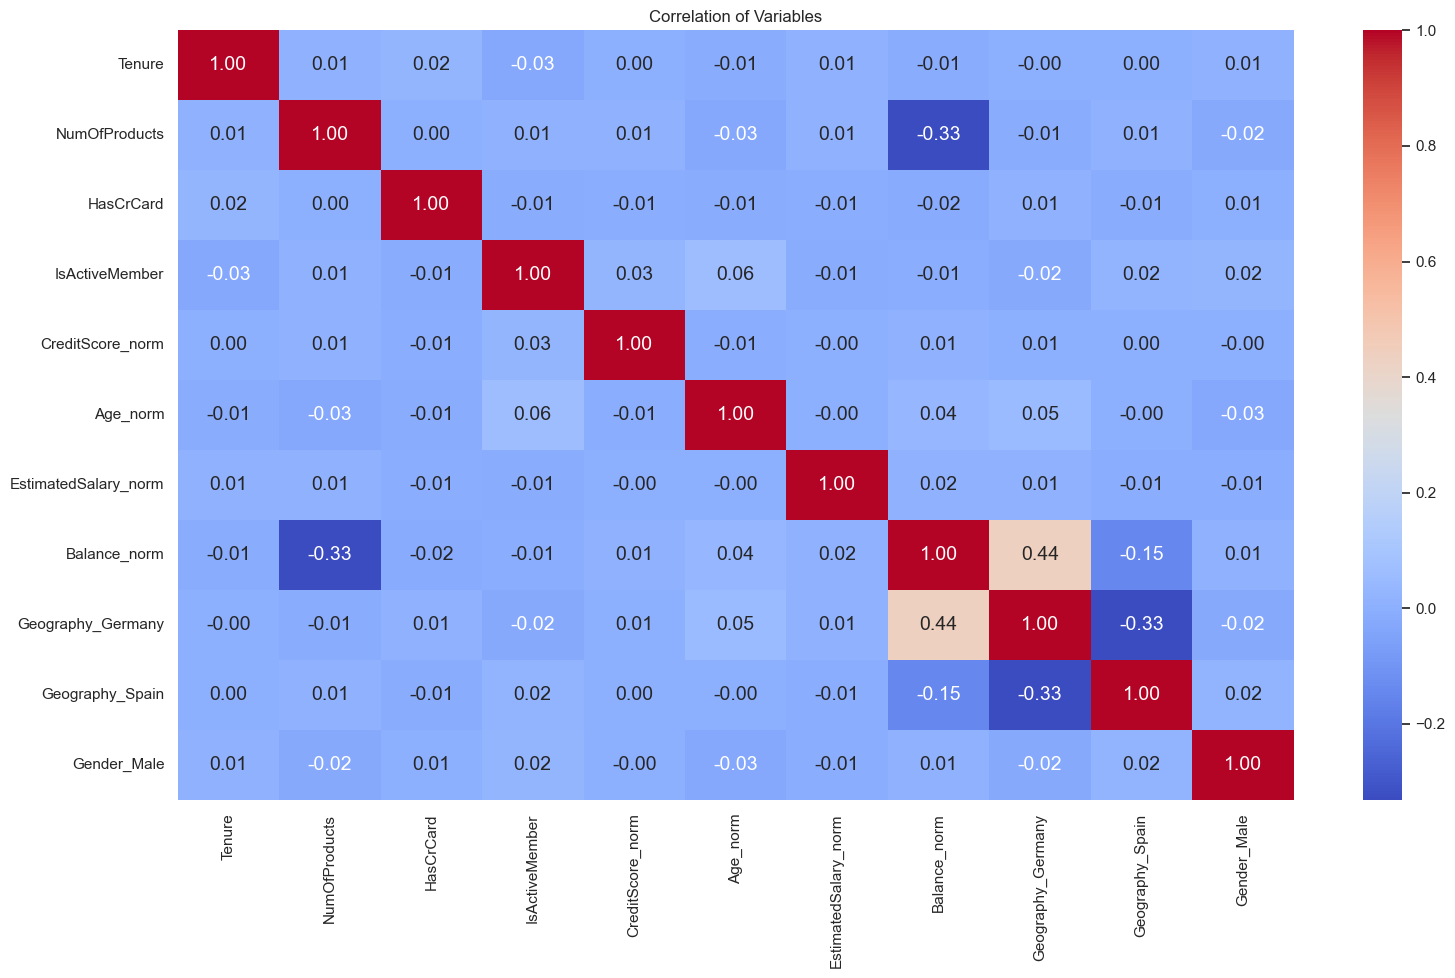

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
Tenure: 3.9867948212173827
NumOfProducts: 8.884808813246202
HasCrCard: 3.3800523917111613
IsActiveMember: 2.07538737491821
CreditScore_norm: 34.252946256842726
Age_norm: 54.021424931663326
EstimatedSalary_norm: 5.778061759749321
Balance_norm: 3.8768519652941813
Geography_Germany: 1.854391126915714
Geography_Spain: 1.4945003644061994
Gender_Male: 2.1955230325040276

2 cases of possible multicollinearity
0 cases of definite multicollinearity

Assumption possibly satisfied

Coefficient interpretability may be problematic
Consider removing variables with a high Variance Inflation Factor (VIF)


In [222]:
multicollinearity_assumption(df2, X, y, X.columns)

In [223]:
df3=df2.drop('Age_norm',axis=1)#Dropped Age_norm first.
df3.shape

(9974, 11)

In [224]:
X=df3.drop('Exited',axis=1)
y=df3.Exited

In [225]:
df3.head()

Tenure  NumOfProducts  HasCrCard  IsActiveMember  CreditScore_norm  \
0       2              1          1               1           1254.49   
1       1              1          0               1           1229.34   
2       8              3          1               0            990.09   
3       1              2          0               0           1439.12   
4       2              1          1               1           1794.88   

   EstimatedSalary_norm  Balance_norm  Geography_Germany  Geography_Spain  \
0               5151.74          0.00                  0                0   
1               5550.87         28.90                  0                1   
2               5599.58         32.42                  0                0   
3               4876.38          0.00                  0                0   
4               4317.35         31.07                  0                1   

   Gender_Male  Exited  
0            0       1  
1            0       0  
2            0       1  
3            0       0  
4            0       0

Assumption 2: Little to no multicollinearity among predictors


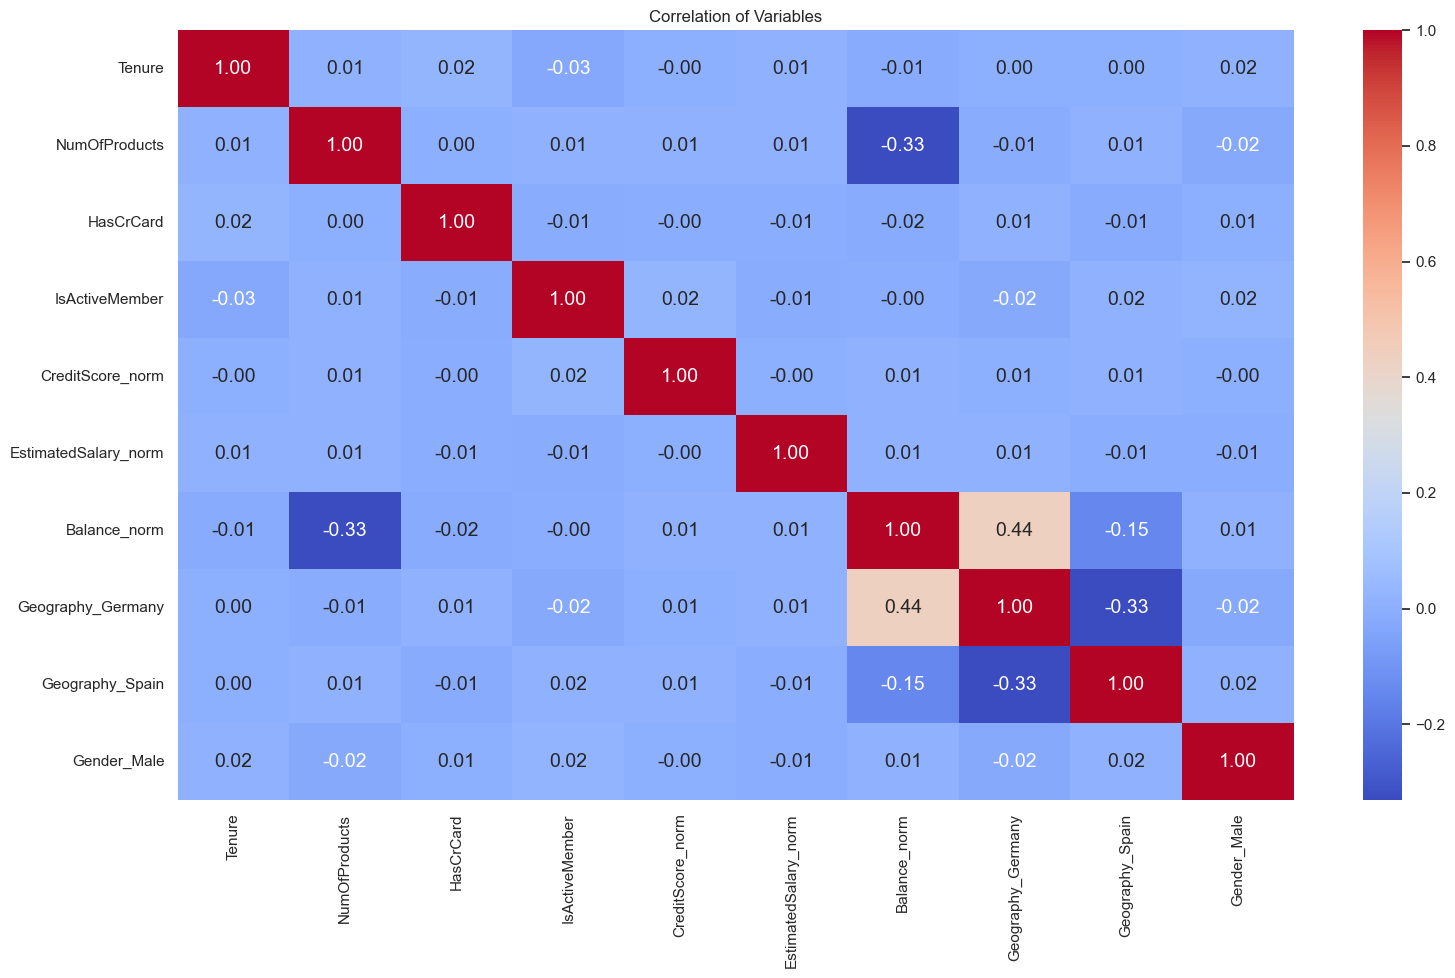

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
Tenure: 3.8324402030646953
NumOfProducts: 7.654860743671387
HasCrCard: 3.2574866109905374
IsActiveMember: 2.041418532618276
CreditScore_norm: 15.96793123086202
EstimatedSalary_norm: 5.401850025207158
Balance_norm: 3.597922058840982
Geography_Germany: 1.8537611588890917
Geography_Spain: 1.4801070745040388
Gender_Male: 2.1623368945255828

1 cases of possible multicollinearity
0 cases of definite multicollinearity

Assumption possibly satisfied

Coefficient interpretability may be problematic
Consider removing variables with a high Variance Inflation Factor (VIF)


In [226]:
multicollinearity_assumption(df3, X, y, X.columns)

In [227]:
df3=df3.drop('CreditScore_norm',axis=1)## Dropped CreditScore_norm
df3.shape

(9974, 10)

In [228]:
X=df3.drop('Exited',axis=1)
y=df3.Exited

In [229]:
X.shape

(9974, 9)

Assumption 2: Little to no multicollinearity among predictors


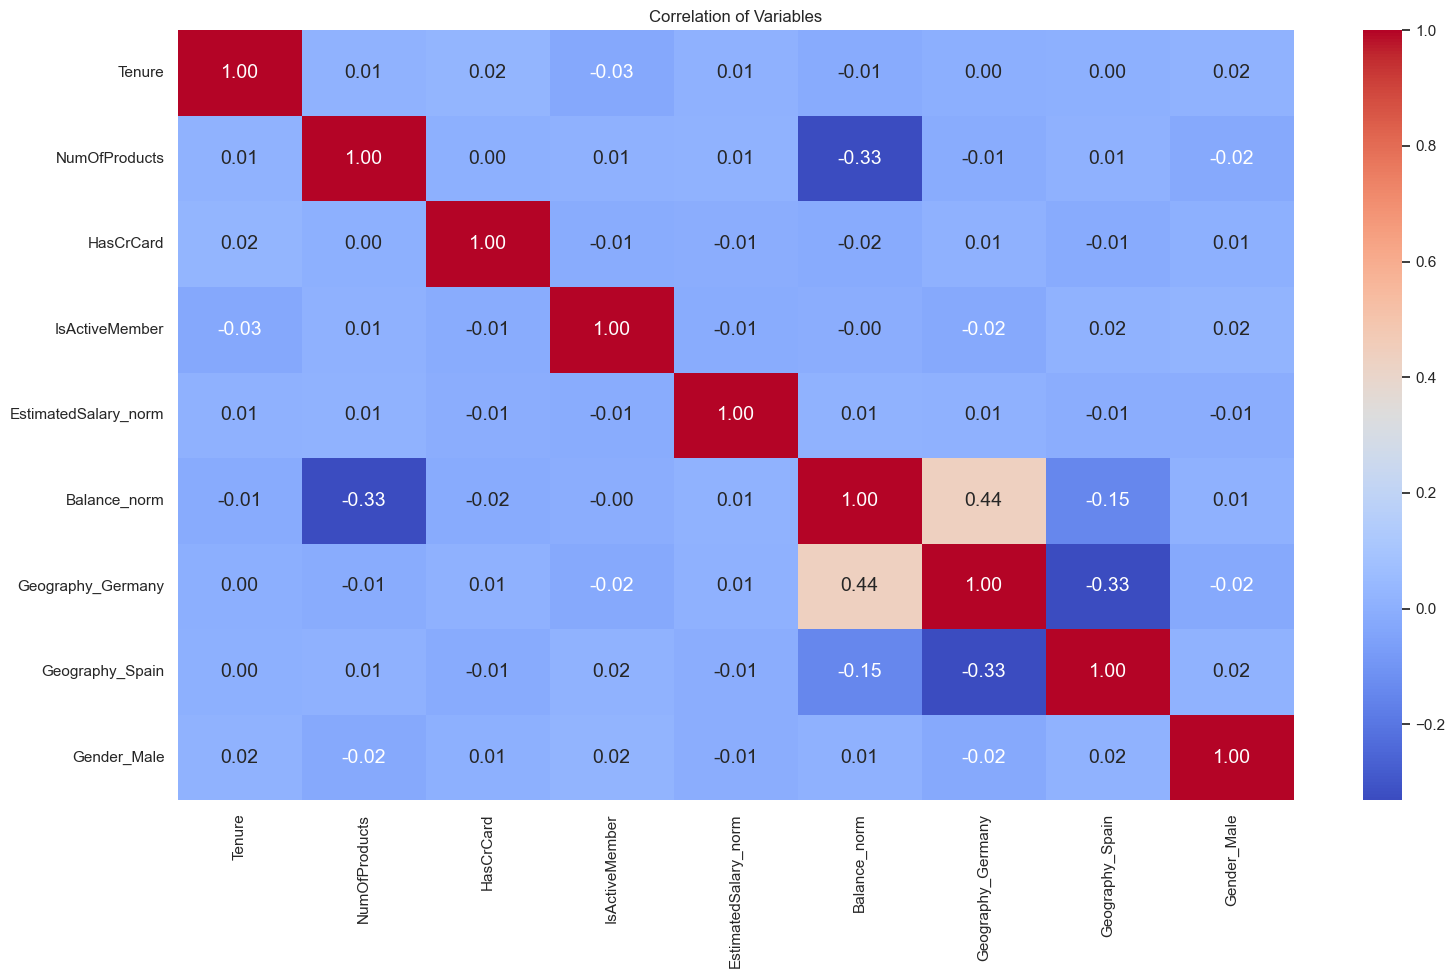

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
Tenure: 3.5846783512922977
NumOfProducts: 5.4979914427585435
HasCrCard: 3.0762287701246684
IsActiveMember: 1.9810698876658912
EstimatedSalary_norm: 4.832371402405052
Balance_norm: 3.1312244168217216
Geography_Germany: 1.8516321716618032
Geography_Spain: 1.4573856006481163
Gender_Male: 2.1074389303038723

0 cases of possible multicollinearity
0 cases of definite multicollinearity

Assumption satisfied


In [230]:
multicollinearity_assumption(df3, X, y, X.columns)

### Feature Elimination using Bad Correlation 

In [231]:
def bad_correlation(df1, threshold=0.3):
    pairs = pd.DataFrame(columns=['feature1','feature2','value'])
    cm = df1.corr() #correlation matrix
    np.fill_diagonal(cm.values, 0) # set diagonal to 0 
    corr = [(cm.index[x], cm.columns[y], cm.iloc[x,y]) for x, y in zip(*np.where(abs(np.tril(cm)) > threshold))] 
    for couple in corr:
        feature1, feature2, value = couple
        entry = {'feature1': [feature1], 'feature2' : [feature2], 'value' : [value]}
        temp = pd.DataFrame(entry)
        pairs= pd.concat([pairs,temp], axis=1)
    return pairs

In [232]:
df4=bad_correlation(df3, threshold=0.60)

In [233]:
df4

Empty DataFrame
Columns: [feature1, feature2, value]
Index: []

### Stats Model used for Feature Selection

In [234]:
import statsmodels.api as sm

X_with_const = sm.add_constant(X)

ols_model = sm.OLS(y, X_with_const)
ols_results = ols_model.fit()

print(ols_results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Exited   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     79.85
Date:                Tue, 05 Mar 2024   Prob (F-statistic):          1.27e-143
Time:                        10:39:34   Log-Likelihood:                -4711.1
No. Observations:                9974   AIC:                             9442.
Df Residuals:                    9964   BIC:                             9514.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2888 

In [235]:
ols_results.pvalues[ols_results.pvalues > 0.05]

Tenure                 0.14
HasCrCard              0.34
EstimatedSalary_norm   0.57
Geography_Spain        0.48
dtype: float64

In [236]:
df4=df3.drop(['EstimatedSalary_norm','Geography_Spain','Tenure','HasCrCard'],axis=1)

In [237]:
X=df4.drop('Exited',axis=1)
y=df4.Exited

In [238]:
import statsmodels.api as sm

X_with_const = sm.add_constant(X)

ols_model = sm.OLS(y, X_with_const)
ols_results = ols_model.fit()

print(ols_results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Exited   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     142.9
Date:                Tue, 05 Mar 2024   Prob (F-statistic):          6.20e-147
Time:                        10:39:40   Log-Likelihood:                -4713.1
No. Observations:                9974   AIC:                             9438.
Df Residuals:                    9968   BIC:                             9481.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2797      0.01

In [239]:
df4.shape

(9974, 6)

<div style="padding: 10px; font-size: 30px; text-align: center; font-weight: bold;">
Model Building with 6 features
</div>

In [240]:
X=df4.drop('Exited',axis=1)
y=df4.Exited

In [241]:
X_train, X_test, y_train,y_test = train_test_split(X, y,stratify=y,shuffle = True,test_size=0.20,random_state=1)

In [242]:
X_train.shape, X_test.shape, y_train.shape,y_test.shape

((7979, 5), (1995, 5), (7979,), (1995,))

## Sampling Techniques

### 1. Random under-sampling majority class:

In [216]:
df4.to_csv('df4',index=False)

In [2]:
import pandas as pd
df4=pd.read_csv('df4')
df4.head()

NumOfProducts  IsActiveMember  Balance_norm  Geography_Germany  \
0              1               1      0.000000                  0   
1              1               1     28.900279                  0   
2              3               0     32.417997                  0   
3              2               0      0.000000                  0   
4              1               1     31.065765                  0   

   Gender_Male  Exited  
0            0       1  
1            0       0  
2            0       1  
3            0       0  
4            0       0

In [387]:
conda install -c conda-forge imbalanced-learn

Retrieving notices: ...working... done
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\ProgramData\anaconda3

  added / updated specs:
    - imbalanced-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2024.2.2   |       h56e8100_0         152 KB  conda-forge
    certifi-2024.2.2           |     pyhd8ed1ab_0         157 KB  conda-forge
    imbalanced-learn-0.12.0    |     pyhd8ed1ab_0         155 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         464 KB

The following packages will be UPDATED:

  ca-certificates    pkgs/main::ca-certificates-2023.12.12~ --> conda-forge::ca-certificates-2024.2.2-h56e8100_0 
  imbalanced-learn   pkgs/main/win-64::imbalanced-learn-0.~ --> conda-forge/noarch::imbalanced-learn-0.12.0-pyhd8ed1ab_0 

The following



==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 24.1.2

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.1.2



EnvironmentNotWritableError: The current user does not have write permissions to the target environment.
  environment location: C:\ProgramData\anaconda3




In [389]:
conda install conda=24.1.2

^C

Note: you may need to restart the kernel to use updated packages.


In [214]:
pip install --upgrade imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/92/e8/86c36e1b13007ca9c89381adac6c078cfc8fb71841a76c08a3fe3eca91d3/imbalanced_learn-0.12.0-py3-none-any.whl.metadata
  Using cached imbalanced_learn-0.12.0-py3-none-any.whl.metadata (8.2 kB)
Using cached imbalanced_learn-0.12.0-py3-none-any.whl (257 kB)
Note: you may need to restart the kernel to use updated packages.


In [243]:
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(random_state=1, replacement=True)

X_under_tr, y_under_tr = undersample.fit_resample(X_train, y_train)

data_undersampled = pd.concat([X_under_tr, y_under_tr], axis =1)
data_undersampled.shape

(3230, 6)

pip install --upgrade scikit-learn

pip install imbalanced-learn

In [244]:
data_undersampled.Exited.value_counts()

Exited
0    1615
1    1615
Name: count, dtype: int64

In [245]:
sc_under = StandardScaler()
X_under_tr = sc_under.fit_transform(X_under_tr)
X_under_te = sc_under.transform(X_test)
X_under_tr.shape, X_under_te.shape

((3230, 5), (1995, 5))

### 2. Random over-sampling minority class:

In [246]:
pd.DataFrame(y_train).value_counts()

Exited
0         6364
1         1615
Name: count, dtype: int64

In [247]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(random_state=1)

X_over_tr, y_over_tr = oversample.fit_resample(X_train, y_train)

data_oversampled = pd.concat([X_over_tr, y_over_tr], axis =1)
data_oversampled.shape

(12728, 6)

In [248]:
data_oversampled.Exited.value_counts()

Exited
1    6364
0    6364
Name: count, dtype: int64

In [249]:
sc_over = StandardScaler()
X_over_tr = sc_over.fit_transform(X_over_tr)
X_over_te = sc_over.transform(X_test)

### 3. Synthetic Minority Oversampling Technique (SMOTE):

In [250]:
from imblearn.over_sampling import SMOTE

smote = SMOTE() 

In [251]:
pd.DataFrame(y_train).value_counts()

Exited
0         6364
1         1615
Name: count, dtype: int64

In [252]:
X_smote_tr, y_smote_tr = smote.fit_resample(X_train, y_train)
X_smote_tr.shape, y_smote_tr.shape

((12728, 5), (12728,))

In [253]:
pd.DataFrame(y_smote_tr).value_counts()

Exited
0         6364
1         6364
Name: count, dtype: int64

In [254]:
#scaling the train and test datasets for SMOTE

sc_smote = StandardScaler()
X_smote_tr = sc_smote.fit_transform(X_smote_tr)
X_smote_te = sc_smote.transform(X_test)

### Model 1. Dummy Classifier based on Imbalanced Data 

Classification_report - TEST SET:

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1591
           1       0.00      0.00      0.00       404

    accuracy                           0.80      1995
   macro avg       0.40      0.50      0.44      1995
weighted avg       0.64      0.80      0.71      1995



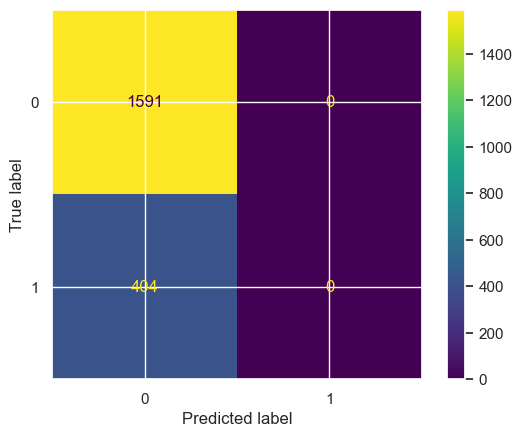

train f1 score:

0.0
test f1 score:

0.0


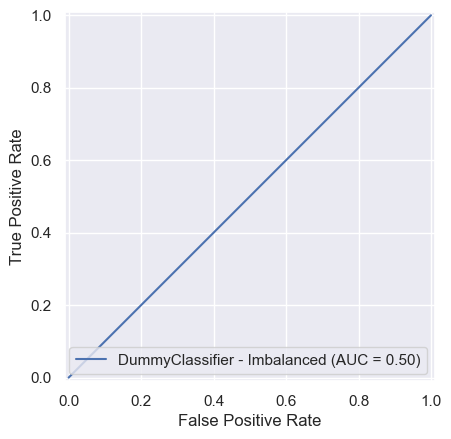

Model Class_weight  AUC-Train  AUC-Test  \
0  DummyClassifier - Imbalanced          N/A       0.50      0.50   

   train_recall_pos_class  test_recall_pos_class  train_accuracy_score  \
0                    0.00                   0.00                  0.80   

   test_accuracy_score  train_f1_score  test_f1_score  \
0                 0.80            0.00           0.00   

   CrossVal_Mean(Accuracy)  CrossVal_Mean(F1_score)  CrossVal1(f1)  \
0                     0.80                     0.00           0.00   

   CrossVal2(f1)  CrossVal3(f1)  CrossVal4(f1)  CrossVal5(f1)  
0           0.00           0.00           0.00           0.00

In [25]:
dummy_clf = DummyClassifier(strategy="most_frequent")

X_imb_tr, X_imb_te, y_imb_tr, y_imb_te = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 0)

All_Models = model_results("DummyClassifier - Imbalanced", X_imb_tr, y_imb_tr, X_imb_te, y_imb_te, \
                           dummy_clf, 5, Class_weight="N/A" )
All_Models

### Model 2- Dummy classifier based on undersamples dataset

Classification_report - TEST SET:

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1591
           1       0.00      0.00      0.00       404

    accuracy                           0.80      1995
   macro avg       0.40      0.50      0.44      1995
weighted avg       0.64      0.80      0.71      1995



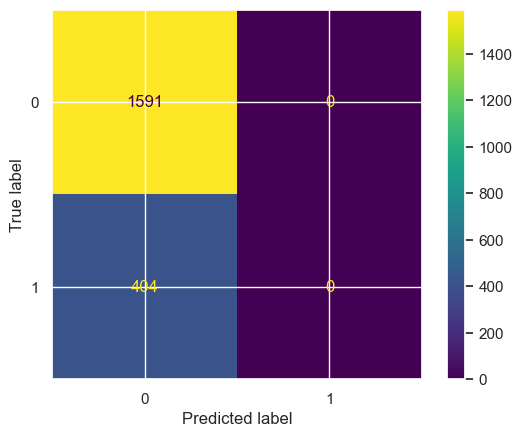

train f1 score:

0.0
test f1 score:

0.0


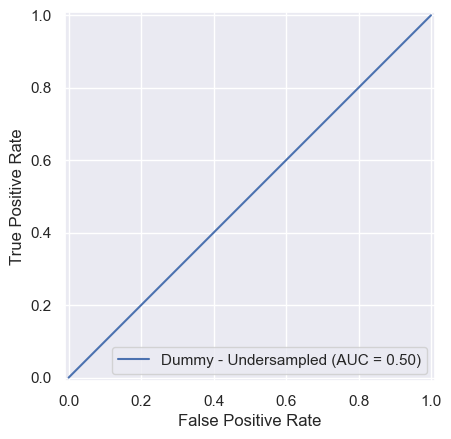

Model Class_weight  AUC-Train  AUC-Test  \
0  DummyClassifier - Imbalanced          N/A       0.50      0.50   
0          Dummy - Undersampled          N/A       0.50      0.50   

   train_recall_pos_class  test_recall_pos_class  train_accuracy_score  \
0                    0.00                   0.00                  0.80   
0                    0.00                   0.00                  0.50   

   test_accuracy_score  train_f1_score  test_f1_score  \
0                 0.80            0.00           0.00   
0                 0.80            0.00           0.00   

   CrossVal_Mean(Accuracy)  CrossVal_Mean(F1_score)  CrossVal1(f1)  \
0                     0.80                     0.00           0.00   
0                     0.50                     0.00           0.00   

   CrossVal2(f1)  CrossVal3(f1)  CrossVal4(f1)  CrossVal5(f1)  
0           0.00           0.00           0.00           0.00  
0           0.00           0.00           0.00           0.00

In [30]:
dummy_clf = DummyClassifier(strategy="most_frequent")

next_model = model_results("Dummy - Undersampled", X_under_tr, y_under_tr, X_under_te, y_test, \
                           dummy_clf, 5, Class_weight="N/A" )

All_Models = pd.concat([All_Models, next_model])
All_Models

### Model 3: Dummy classifier based on oversamples dataset

Classification_report - TEST SET:

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1591
           1       0.00      0.00      0.00       404

    accuracy                           0.80      1995
   macro avg       0.40      0.50      0.44      1995
weighted avg       0.64      0.80      0.71      1995



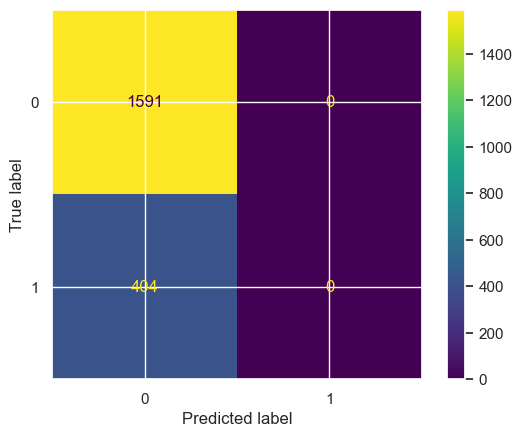

train f1 score:

0.0
test f1 score:

0.0


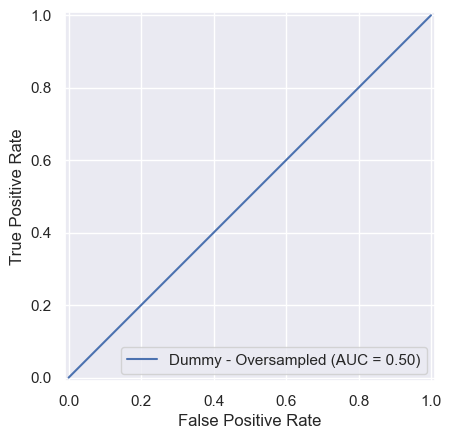

Model Class_weight  AUC-Train  AUC-Test  \
0  DummyClassifier - Imbalanced          N/A       0.50      0.50   
0          Dummy - Undersampled          N/A       0.50      0.50   
0           Dummy - Oversampled          N/A       0.50      0.50   

   train_recall_pos_class  test_recall_pos_class  train_accuracy_score  \
0                    0.00                   0.00                  0.80   
0                    0.00                   0.00                  0.50   
0                    0.00                   0.00                  0.50   

   test_accuracy_score  train_f1_score  test_f1_score  \
0                 0.80            0.00           0.00   
0                 0.80            0.00           0.00   
0                 0.80            0.00           0.00   

   CrossVal_Mean(Accuracy)  CrossVal_Mean(F1_score)  CrossVal1(f1)  \
0                     0.80                     0.00           0.00   
0                     0.50                     0.00           0.00   
0                     0.50                     0.13           0.00   

   CrossVal2(f1)  CrossVal3(f1)  CrossVal4(f1)  CrossVal5(f1)  
0           0.00           0.00           0.00           0.00  
0           0.00           0.00           0.00           0.00  
0           0.00           0.00           0.00           0.67

In [31]:
dummy_clf_over = DummyClassifier(strategy="most_frequent")

next_model = model_results("Dummy - Oversampled", X_over_tr, y_over_tr, X_over_te, y_test, \
                           dummy_clf_over, 5, Class_weight="N/A" )

All_Models = pd.concat([All_Models, next_model])

All_Models

### Model 4: Dummy classifier based on SMOTE dataset

Classification_report - TEST SET:

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1591
           1       0.00      0.00      0.00       404

    accuracy                           0.80      1995
   macro avg       0.40      0.50      0.44      1995
weighted avg       0.64      0.80      0.71      1995



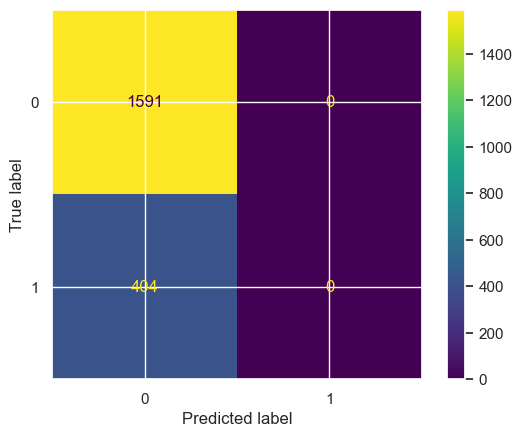

train f1 score:

0.0
test f1 score:

0.0


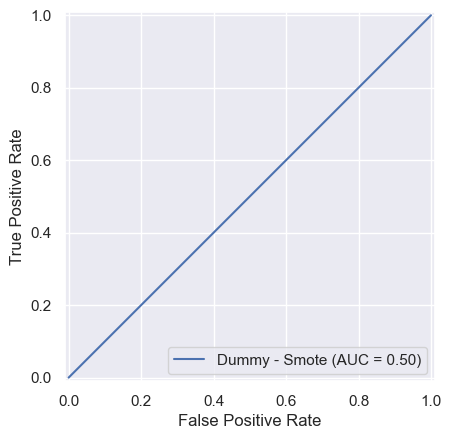

Model Class_weight  AUC-Train  AUC-Test  \
0  DummyClassifier - Imbalanced          N/A       0.50      0.50   
0          Dummy - Undersampled          N/A       0.50      0.50   
0           Dummy - Oversampled          N/A       0.50      0.50   
0                 Dummy - Smote          N/A       0.50      0.50   

   train_recall_pos_class  test_recall_pos_class  train_accuracy_score  \
0                    0.00                   0.00                  0.80   
0                    0.00                   0.00                  0.50   
0                    0.00                   0.00                  0.50   
0                    0.00                   0.00                  0.50   

   test_accuracy_score  train_f1_score  test_f1_score  \
0                 0.80            0.00           0.00   
0                 0.80            0.00           0.00   
0                 0.80            0.00           0.00   
0                 0.80            0.00           0.00   

   CrossVal_Mean(Accuracy)  CrossVal_Mean(F1_score)  CrossVal1(f1)  \
0                     0.80                     0.00           0.00   
0                     0.50                     0.00           0.00   
0                     0.50                     0.13           0.00   
0                     0.50                     0.13           0.00   

   CrossVal2(f1)  CrossVal3(f1)  CrossVal4(f1)  CrossVal5(f1)  
0           0.00           0.00           0.00           0.00  
0           0.00           0.00           0.00           0.00  
0           0.00           0.00           0.00           0.67  
0           0.00           0.00           0.00           0.67

In [32]:
dummy_smote= DummyClassifier(strategy="most_frequent")

next_model = model_results("Dummy - Smote", X_smote_tr, y_smote_tr, X_smote_te, y_test, \
                           dummy_smote, 5, Class_weight="N/A" )

All_Models = pd.concat([All_Models, next_model])

All_Models

### Model 5: Logistic Regression classifier based on imbalanced dataset

Classification_report - TEST SET:

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1591
           1       0.00      0.00      0.00       404

    accuracy                           0.80      1995
   macro avg       0.40      0.50      0.44      1995
weighted avg       0.64      0.80      0.71      1995



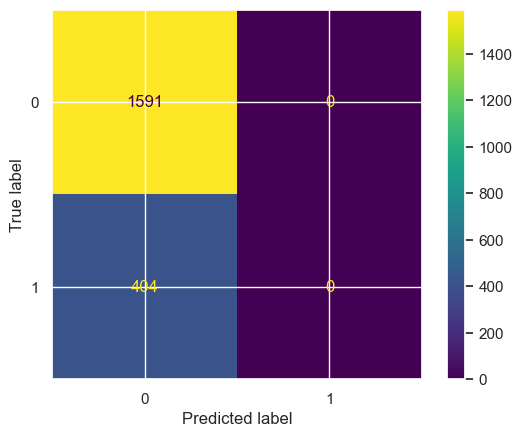

train f1 score:

0.0
test f1 score:

0.0


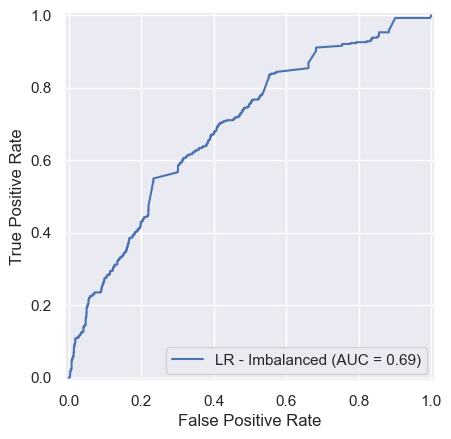

Model Class_weight  AUC-Train  AUC-Test  \
0  DummyClassifier - Imbalanced          N/A       0.50      0.50   
0          Dummy - Undersampled          N/A       0.50      0.50   
0           Dummy - Oversampled          N/A       0.50      0.50   
0                 Dummy - Smote          N/A       0.50      0.50   
0               LR - Imbalanced          N/A       0.68      0.69   

   train_recall_pos_class  test_recall_pos_class  train_accuracy_score  \
0                    0.00                   0.00                  0.80   
0                    0.00                   0.00                  0.50   
0                    0.00                   0.00                  0.50   
0                    0.00                   0.00                  0.50   
0                    0.00                   0.00                  0.80   

   test_accuracy_score  train_f1_score  test_f1_score  \
0                 0.80            0.00           0.00   
0                 0.80            0.00           0.00   
0                 0.80            0.00           0.00   
0                 0.80            0.00           0.00   
0                 0.80            0.00           0.00   

   CrossVal_Mean(Accuracy)  CrossVal_Mean(F1_score)  CrossVal1(f1)  \
0                     0.80                     0.00           0.00   
0                     0.50                     0.00           0.00   
0                     0.50                     0.13           0.00   
0                     0.50                     0.13           0.00   
0                     0.80                     0.00           0.00   

   CrossVal2(f1)  CrossVal3(f1)  CrossVal4(f1)  CrossVal5(f1)  
0           0.00           0.00           0.00           0.00  
0           0.00           0.00           0.00           0.00  
0           0.00           0.00           0.00           0.67  
0           0.00           0.00           0.00           0.67  
0           0.00           0.00           0.00           0.00

In [33]:
LR_imb = LogisticRegression()

X_imb_tr, X_imb_te, y_imb_tr, y_imb_te = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 1)

sc_imb = StandardScaler()
X_imb_tr = sc_imb.fit_transform(X_imb_tr)
X_imb_te = sc_imb.transform(X_imb_te)

next_model = model_results("LR - Imbalanced", X_imb_tr, y_imb_tr, X_imb_te, y_imb_te, \
                           LR_imb, 5, Class_weight="N/A" )

All_Models = pd.concat([All_Models, next_model])
All_Models

### Model 6: Logistic Regression classifier based on undersamples dataset

Classification_report - TEST SET:

              precision    recall  f1-score   support

           0       0.88      0.65      0.74      1591
           1       0.31      0.64      0.42       404

    accuracy                           0.65      1995
   macro avg       0.59      0.64      0.58      1995
weighted avg       0.76      0.65      0.68      1995



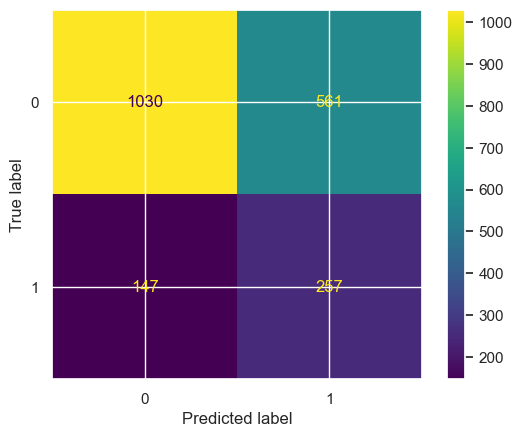

train f1 score:

0.62
test f1 score:

0.4206


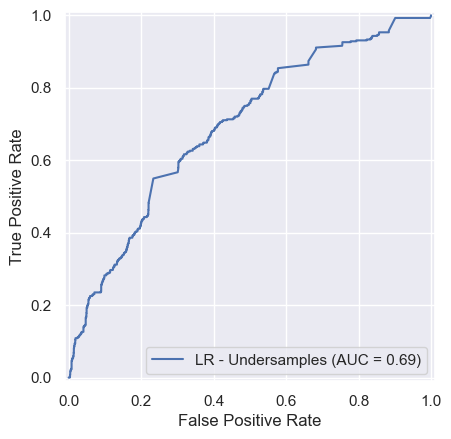

Model Class_weight  AUC-Train  AUC-Test  \
0  DummyClassifier - Imbalanced          N/A       0.50      0.50   
0          Dummy - Undersampled          N/A       0.50      0.50   
0           Dummy - Oversampled          N/A       0.50      0.50   
0                 Dummy - Smote          N/A       0.50      0.50   
0               LR - Imbalanced          N/A       0.68      0.69   
0             LR - Undersamples     balanced       0.69      0.69   

   train_recall_pos_class  test_recall_pos_class  train_accuracy_score  \
0                    0.00                   0.00                  0.80   
0                    0.00                   0.00                  0.50   
0                    0.00                   0.00                  0.50   
0                    0.00                   0.00                  0.50   
0                    0.00                   0.00                  0.80   
0                    0.60                   0.64                  0.64   

   test_accuracy_score  train_f1_score  test_f1_score  \
0                 0.80            0.00           0.00   
0                 0.80            0.00           0.00   
0                 0.80            0.00           0.00   
0                 0.80            0.00           0.00   
0                 0.80            0.00           0.00   
0                 0.65            0.62           0.42   

   CrossVal_Mean(Accuracy)  CrossVal_Mean(F1_score)  CrossVal1(f1)  \
0                     0.80                     0.00           0.00   
0                     0.50                     0.00           0.00   
0                     0.50                     0.13           0.00   
0                     0.50                     0.13           0.00   
0                     0.80                     0.00           0.00   
0                     0.63                     0.62           0.61   

   CrossVal2(f1)  CrossVal3(f1)  CrossVal4(f1)  CrossVal5(f1)  
0           0.00           0.00           0.00           0.00  
0           0.00           0.00           0.00           0.00  
0           0.00           0.00           0.00           0.67  
0           0.00           0.00           0.00           0.67  
0           0.00           0.00           0.00           0.00  
0           0.62           0.57           0.66           0.60

In [34]:
LR_under = LogisticRegression(class_weight=None,solver='liblinear')

next_model = model_results("LR - Undersamples", X_under_tr, y_under_tr, X_under_te, y_test, \
                           LR_under, 5, Class_weight="balanced" )

All_Models = pd.concat([All_Models, next_model])

All_Models

### Model 7: Logistic Regression based on oversamples dataset

Classification_report - TEST SET:

              precision    recall  f1-score   support

           0       0.88      0.61      0.72      1591
           1       0.31      0.68      0.42       404

    accuracy                           0.63      1995
   macro avg       0.60      0.65      0.57      1995
weighted avg       0.77      0.63      0.66      1995



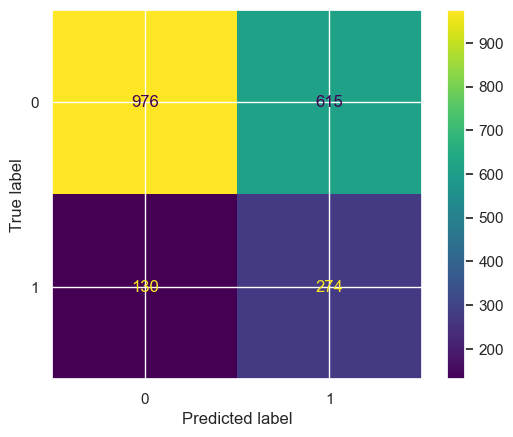

train f1 score:

0.6453
test f1 score:

0.4238


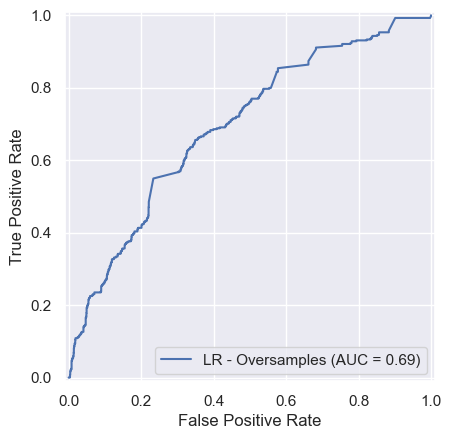

Model Class_weight  AUC-Train  AUC-Test  \
0  DummyClassifier - Imbalanced          N/A       0.50      0.50   
0          Dummy - Undersampled          N/A       0.50      0.50   
0           Dummy - Oversampled          N/A       0.50      0.50   
0                 Dummy - Smote          N/A       0.50      0.50   
0               LR - Imbalanced          N/A       0.68      0.69   
0             LR - Undersamples     balanced       0.69      0.69   
0              LR - Oversamples          N/A       0.68      0.69   

   train_recall_pos_class  test_recall_pos_class  train_accuracy_score  \
0                    0.00                   0.00                  0.80   
0                    0.00                   0.00                  0.50   
0                    0.00                   0.00                  0.50   
0                    0.00                   0.00                  0.50   
0                    0.00                   0.00                  0.80   
0                    0.60                   0.64                  0.64   
0                    0.65                   0.68                  0.64   

   test_accuracy_score  train_f1_score  test_f1_score  \
0                 0.80            0.00           0.00   
0                 0.80            0.00           0.00   
0                 0.80            0.00           0.00   
0                 0.80            0.00           0.00   
0                 0.80            0.00           0.00   
0                 0.65            0.62           0.42   
0                 0.63            0.65           0.42   

   CrossVal_Mean(Accuracy)  CrossVal_Mean(F1_score)  CrossVal1(f1)  \
0                     0.80                     0.00           0.00   
0                     0.50                     0.00           0.00   
0                     0.50                     0.13           0.00   
0                     0.50                     0.13           0.00   
0                     0.80                     0.00           0.00   
0                     0.63                     0.62           0.61   
0                     0.64                     0.64           0.62   

   CrossVal2(f1)  CrossVal3(f1)  CrossVal4(f1)  CrossVal5(f1)  
0           0.00           0.00           0.00           0.00  
0           0.00           0.00           0.00           0.00  
0           0.00           0.00           0.00           0.67  
0           0.00           0.00           0.00           0.67  
0           0.00           0.00           0.00           0.00  
0           0.62           0.57           0.66           0.60  
0           0.64           0.64           0.65           0.65

In [35]:
LR_over = LogisticRegression()

next_model = model_results("LR - Oversamples", X_over_tr, y_over_tr, X_over_te, y_test, \
                           LR_over, 5, Class_weight="N/A" )

All_Models = pd.concat([All_Models, next_model])

All_Models

### Model 8: Logistic Regression based on SMOTE dataset

Classification_report - TEST SET:

              precision    recall  f1-score   support

           0       0.87      0.62      0.72      1591
           1       0.30      0.65      0.41       404

    accuracy                           0.62      1995
   macro avg       0.59      0.63      0.57      1995
weighted avg       0.76      0.62      0.66      1995



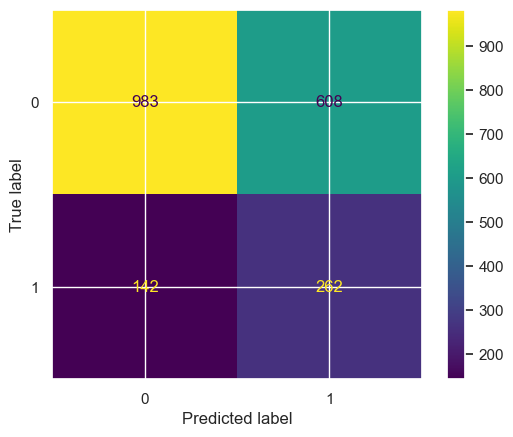

train f1 score:

0.6346
test f1 score:

0.4113


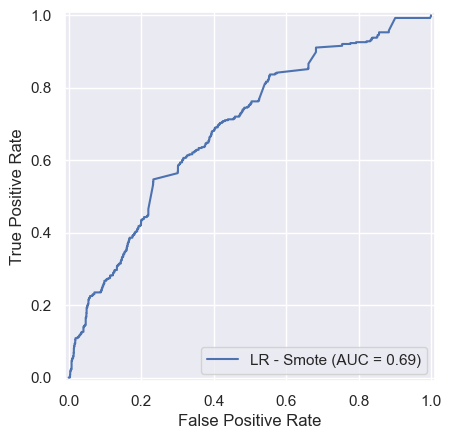

Model Class_weight  AUC-Train  AUC-Test  \
0  DummyClassifier - Imbalanced          N/A       0.50      0.50   
0          Dummy - Undersampled          N/A       0.50      0.50   
0           Dummy - Oversampled          N/A       0.50      0.50   
0                 Dummy - Smote          N/A       0.50      0.50   
0               LR - Imbalanced          N/A       0.68      0.69   
0             LR - Undersamples     balanced       0.69      0.69   
0              LR - Oversamples          N/A       0.68      0.69   
0                    LR - Smote          N/A       0.68      0.69   

   train_recall_pos_class  test_recall_pos_class  train_accuracy_score  \
0                    0.00                   0.00                  0.80   
0                    0.00                   0.00                  0.50   
0                    0.00                   0.00                  0.50   
0                    0.00                   0.00                  0.50   
0                    0.00                   0.00                  0.80   
0                    0.60                   0.64                  0.64   
0                    0.65                   0.68                  0.64   
0                    0.64                   0.65                  0.63   

   test_accuracy_score  train_f1_score  test_f1_score  \
0                 0.80            0.00           0.00   
0                 0.80            0.00           0.00   
0                 0.80            0.00           0.00   
0                 0.80            0.00           0.00   
0                 0.80            0.00           0.00   
0                 0.65            0.62           0.42   
0                 0.63            0.65           0.42   
0                 0.62            0.63           0.41   

   CrossVal_Mean(Accuracy)  CrossVal_Mean(F1_score)  CrossVal1(f1)  \
0                     0.80                     0.00           0.00   
0                     0.50                     0.00           0.00   
0                     0.50                     0.13           0.00   
0                     0.50                     0.13           0.00   
0                     0.80                     0.00           0.00   
0                     0.63                     0.62           0.61   
0                     0.64                     0.64           0.62   
0                     0.63                     0.63           0.62   

   CrossVal2(f1)  CrossVal3(f1)  CrossVal4(f1)  CrossVal5(f1)  
0           0.00           0.00           0.00           0.00  
0           0.00           0.00           0.00           0.00  
0           0.00           0.00           0.00           0.67  
0           0.00           0.00           0.00           0.67  
0           0.00           0.00           0.00           0.00  
0           0.62           0.57           0.66           0.60  
0           0.64           0.64           0.65           0.65  
0           0.64           0.62           0.65           0.64

In [36]:
LR_smote = LogisticRegression()

next_model = model_results("LR - Smote", X_smote_tr, y_smote_tr, X_smote_te, y_test, \
                           LR_smote, 5, Class_weight="N/A" )

All_Models = pd.concat([All_Models, next_model])

All_Models

### Model 9: Logistic Regression based on balanced class weights

Classification_report - TEST SET:

              precision    recall  f1-score   support

           0       0.88      0.61      0.72      1591
           1       0.30      0.66      0.41       404

    accuracy                           0.62      1995
   macro avg       0.59      0.64      0.57      1995
weighted avg       0.76      0.62      0.66      1995



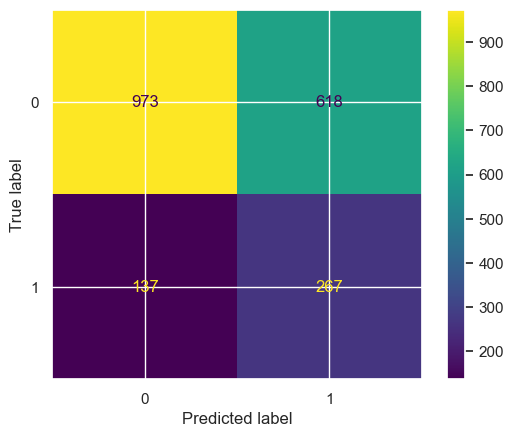

train f1 score:

0.4093
test f1 score:

0.4143


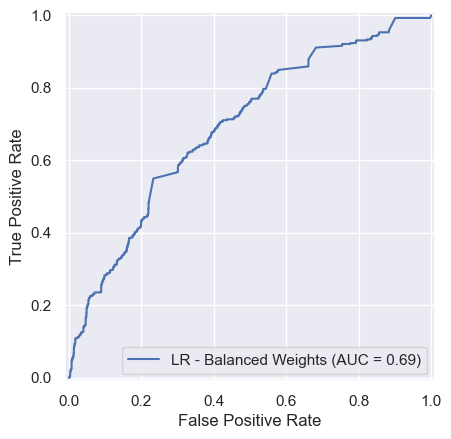

Model Class_weight  AUC-Train  AUC-Test  \
0  DummyClassifier - Imbalanced          N/A       0.50      0.50   
0          Dummy - Undersampled          N/A       0.50      0.50   
0           Dummy - Oversampled          N/A       0.50      0.50   
0                 Dummy - Smote          N/A       0.50      0.50   
0               LR - Imbalanced          N/A       0.68      0.69   
0             LR - Undersamples     balanced       0.69      0.69   
0              LR - Oversamples          N/A       0.68      0.69   
0                    LR - Smote          N/A       0.68      0.69   
0         LR - Balanced Weights     Balanced       0.68      0.69   

   train_recall_pos_class  test_recall_pos_class  train_accuracy_score  \
0                    0.00                   0.00                  0.80   
0                    0.00                   0.00                  0.50   
0                    0.00                   0.00                  0.50   
0                    0.00                   0.00                  0.50   
0                    0.00                   0.00                  0.80   
0                    0.60                   0.64                  0.64   
0                    0.65                   0.68                  0.64   
0                    0.64                   0.65                  0.63   
0                    0.64                   0.66                  0.63   

   test_accuracy_score  train_f1_score  test_f1_score  \
0                 0.80            0.00           0.00   
0                 0.80            0.00           0.00   
0                 0.80            0.00           0.00   
0                 0.80            0.00           0.00   
0                 0.80            0.00           0.00   
0                 0.65            0.62           0.42   
0                 0.63            0.65           0.42   
0                 0.62            0.63           0.41   
0                 0.62            0.41           0.41   

   CrossVal_Mean(Accuracy)  CrossVal_Mean(F1_score)  CrossVal1(f1)  \
0                     0.80                     0.00           0.00   
0                     0.50                     0.00           0.00   
0                     0.50                     0.13           0.00   
0                     0.50                     0.13           0.00   
0                     0.80                     0.00           0.00   
0                     0.63                     0.62           0.61   
0                     0.64                     0.64           0.62   
0                     0.63                     0.63           0.62   
0                     0.63                     0.41           0.41   

   CrossVal2(f1)  CrossVal3(f1)  CrossVal4(f1)  CrossVal5(f1)  
0           0.00           0.00           0.00           0.00  
0           0.00           0.00           0.00           0.00  
0           0.00           0.00           0.00           0.67  
0           0.00           0.00           0.00           0.67  
0           0.00           0.00           0.00           0.00  
0           0.62           0.57           0.66           0.60  
0           0.64           0.64           0.65           0.65  
0           0.64           0.62           0.65           0.64  
0           0.40           0.38           0.42           0.42

In [37]:
LR_weights_bal = LogisticRegression(class_weight='balanced')

next_model = model_results("LR - Balanced Weights", X_imb_tr, y_imb_tr, X_imb_te, y_imb_te, \
                           LR_weights_bal, 5, Class_weight="Balanced" )

All_Models = pd.concat([All_Models, next_model])
All_Models

### Model 10: Random Forest classifier based on imbalanced dataset- RandomizedSearchCV

In [38]:
from sklearn.model_selection import RandomizedSearchCV
params = {
    'n_estimators':[50,100,130,180],
    'max_depth': [4,5,6,11],
    'min_samples_split': [2, 3, 5],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'criterion':['entropy','gini']
}
rf = RandomForestClassifier(random_state=1)
RSC = RandomizedSearchCV(estimator=rf, param_distributions=params, n_iter=100, cv=5, verbose=2, random_state=1, n_jobs=-1)

In [39]:
RSC.fit(X_imb_tr,y_imb_tr)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['entropy', 'gini'],
                                        'max_depth': [4, 5, 6, 11],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 3, 5],
                                        'n_estimators': [50, 100, 130, 180]},
                   random_state=1, verbose=2)

In [40]:
best_params=RSC.best_params_
best_params

{'n_estimators': 50,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_depth': 6,
 'criterion': 'gini',
 'bootstrap': False}

In [41]:
best_score=RSC.best_score_
best_score

0.8318089895585358

In [42]:
Rf_best= RSC.best_estimator_
Rf_best

RandomForestClassifier(bootstrap=False, max_depth=6, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=50, random_state=1)

In [43]:
Rf_best.fit(X_imb_tr,y_imb_tr)

RandomForestClassifier(bootstrap=False, max_depth=6, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=50, random_state=1)

Classification_report - TEST SET:

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1591
           1       0.68      0.33      0.44       404

    accuracy                           0.83      1995
   macro avg       0.77      0.65      0.67      1995
weighted avg       0.82      0.83      0.81      1995



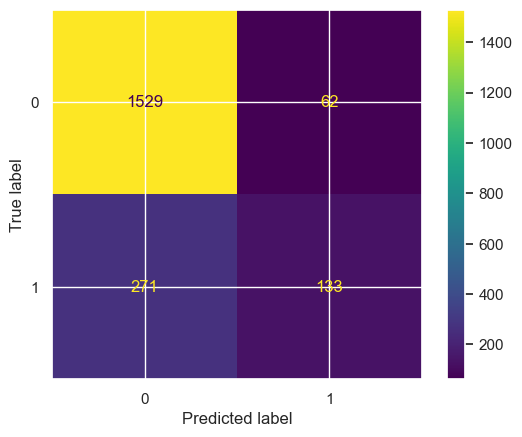

train f1 score:

0.4516
test f1 score:

0.4441


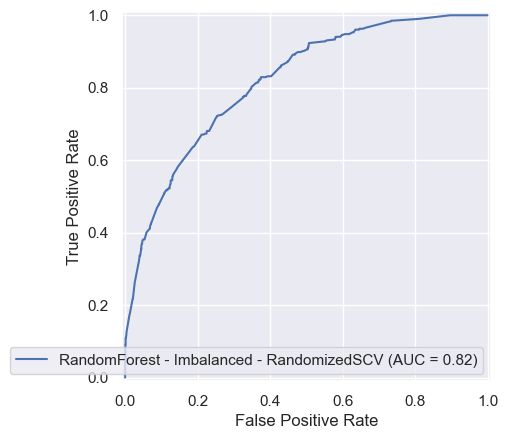

Model Class_weight  AUC-Train  \
0               DummyClassifier - Imbalanced          N/A       0.50   
0                       Dummy - Undersampled          N/A       0.50   
0                        Dummy - Oversampled          N/A       0.50   
0                              Dummy - Smote          N/A       0.50   
0                            LR - Imbalanced          N/A       0.68   
0                          LR - Undersamples     balanced       0.69   
0                           LR - Oversamples          N/A       0.68   
0                                 LR - Smote          N/A       0.68   
0                      LR - Balanced Weights     Balanced       0.68   
0  RandomForest - Imbalanced - RandomizedSCV          N/A       0.81   

   AUC-Test  train_recall_pos_class  test_recall_pos_class  \
0      0.50                    0.00                   0.00   
0      0.50                    0.00                   0.00   
0      0.50                    0.00                   0.00   
0      0.50                    0.00                   0.00   
0      0.69                    0.00                   0.00   
0      0.69                    0.60                   0.64   
0      0.69                    0.65                   0.68   
0      0.69                    0.64                   0.65   
0      0.69                    0.64                   0.66   
0      0.82                    0.33                   0.33   

   train_accuracy_score  test_accuracy_score  train_f1_score  test_f1_score  \
0                  0.80                 0.80            0.00           0.00   
0                  0.50                 0.80            0.00           0.00   
0                  0.50                 0.80            0.00           0.00   
0                  0.50                 0.80            0.00           0.00   
0                  0.80                 0.80            0.00           0.00   
0                  0.64                 0.65            0.62           0.42   
0                  0.64                 0.63            0.65           0.42   
0                  0.63                 0.62            0.63           0.41   
0                  0.63                 0.62            0.41           0.41   
0                  0.84                 0.83            0.45           0.44   

   CrossVal_Mean(Accuracy)  CrossVal_Mean(F1_score)  CrossVal1(f1)  \
0                     0.80                     0.00           0.00   
0                     0.50                     0.00           0.00   
0                     0.50                     0.13           0.00   
0                     0.50                     0.13           0.00   
0                     0.80                     0.00           0.00   
0                     0.63                     0.62           0.61   
0                     0.64                     0.64           0.62   
0                     0.63                     0.63           0.62   
0                     0.63                     0.41           0.41   
0                     0.83                     0.43           0.41   

   CrossVal2(f1)  CrossVal3(f1)  CrossVal4(f1)  CrossVal5(f1)  
0           0.00           0.00           0.00           0.00  
0           0.00           0.00           0.00           0.00  
0           0.00           0.00           0.00           0.67  
0           0.00           0.00           0.00           0.67  
0           0.00           0.00           0.00           0.00  
0           0.62           0.57           0.66           0.60  
0           0.64           0.64           0.65           0.65  
0           0.64           0.62           0.65           0.64  
0           0.40           0.38           0.42           0.42  
0           0.43           0.45           0.44           0.44

In [44]:
next_model = model_results("RandomForest - Imbalanced - RandomizedSCV", X_imb_tr, y_imb_tr, X_imb_te, y_imb_te, \
                           Rf_best, 5, Class_weight="N/A" )

All_Models = pd.concat([All_Models, next_model])
All_Models

### Model 11: Random Forest classifier based on undersamples dataset

Classification_report - TEST SET:

              precision    recall  f1-score   support

           0       0.91      0.74      0.82      1591
           1       0.41      0.72      0.52       404

    accuracy                           0.74      1995
   macro avg       0.66      0.73      0.67      1995
weighted avg       0.81      0.74      0.76      1995



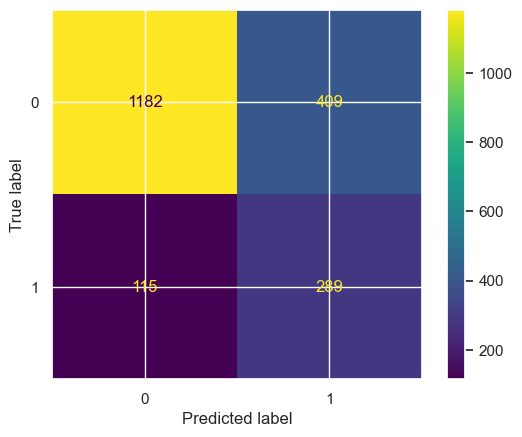

train f1 score:

0.7569
test f1 score:

0.5245


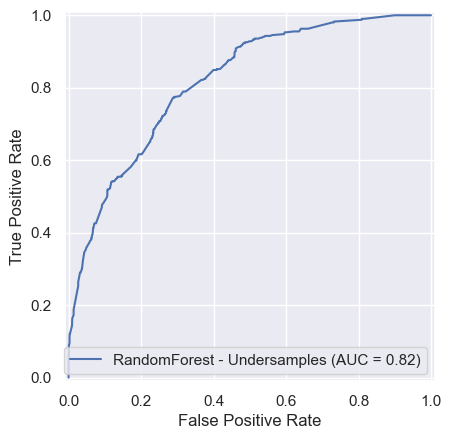

Model Class_weight  AUC-Train  \
0               DummyClassifier - Imbalanced          N/A       0.50   
0                       Dummy - Undersampled          N/A       0.50   
0                        Dummy - Oversampled          N/A       0.50   
0                              Dummy - Smote          N/A       0.50   
0                            LR - Imbalanced          N/A       0.68   
0                          LR - Undersamples     balanced       0.69   
0                           LR - Oversamples          N/A       0.68   
0                                 LR - Smote          N/A       0.68   
0                      LR - Balanced Weights     Balanced       0.68   
0  RandomForest - Imbalanced - RandomizedSCV          N/A       0.81   
0                RandomForest - Undersamples          N/A       0.82   

   AUC-Test  train_recall_pos_class  test_recall_pos_class  \
0      0.50                    0.00                   0.00   
0      0.50                    0.00                   0.00   
0      0.50                    0.00                   0.00   
0      0.50                    0.00                   0.00   
0      0.69                    0.00                   0.00   
0      0.69                    0.60                   0.64   
0      0.69                    0.65                   0.68   
0      0.69                    0.64                   0.65   
0      0.69                    0.64                   0.66   
0      0.82                    0.33                   0.33   
0      0.82                    0.73                   0.72   

   train_accuracy_score  test_accuracy_score  train_f1_score  test_f1_score  \
0                  0.80                 0.80            0.00           0.00   
0                  0.50                 0.80            0.00           0.00   
0                  0.50                 0.80            0.00           0.00   
0                  0.50                 0.80            0.00           0.00   
0                  0.80                 0.80            0.00           0.00   
0                  0.64                 0.65            0.62           0.42   
0                  0.64                 0.63            0.65           0.42   
0                  0.63                 0.62            0.63           0.41   
0                  0.63                 0.62            0.41           0.41   
0                  0.84                 0.83            0.45           0.44   
0                  0.76                 0.74            0.76           0.52   

   CrossVal_Mean(Accuracy)  CrossVal_Mean(F1_score)  CrossVal1(f1)  \
0                     0.80                     0.00           0.00   
0                     0.50                     0.00           0.00   
0                     0.50                     0.13           0.00   
0                     0.50                     0.13           0.00   
0                     0.80                     0.00           0.00   
0                     0.63                     0.62           0.61   
0                     0.64                     0.64           0.62   
0                     0.63                     0.63           0.62   
0                     0.63                     0.41           0.41   
0                     0.83                     0.43           0.41   
0                     0.74                     0.73           0.71   

   CrossVal2(f1)  CrossVal3(f1)  CrossVal4(f1)  CrossVal5(f1)  
0           0.00           0.00           0.00           0.00  
0           0.00           0.00           0.00           0.00  
0           0.00           0.00           0.00           0.67  
0           0.00           0.00           0.00           0.67  
0           0.00           0.00           0.00           0.00  
0           0.62           0.57           0.66           0.60  
0           0.64           0.64           0.65           0.65  
0           0.64           0.62           0.65           0.64  
0           0.40           0.38           0.42           0.42  

In [45]:
rf_under = RandomForestClassifier(bootstrap=False, max_depth=6, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=50, random_state=1)

next_model = model_results("RandomForest - Undersamples", X_under_tr, y_under_tr, X_under_te, y_test, \
                           rf_under, 5, Class_weight="N/A" )

All_Models = pd.concat([All_Models, next_model])

All_Models

### Model 12: Random Forest classifier based on oversamples dataset

Classification_report - TEST SET:

              precision    recall  f1-score   support

           0       0.91      0.77      0.83      1591
           1       0.43      0.70      0.53       404

    accuracy                           0.75      1995
   macro avg       0.67      0.73      0.68      1995
weighted avg       0.81      0.75      0.77      1995



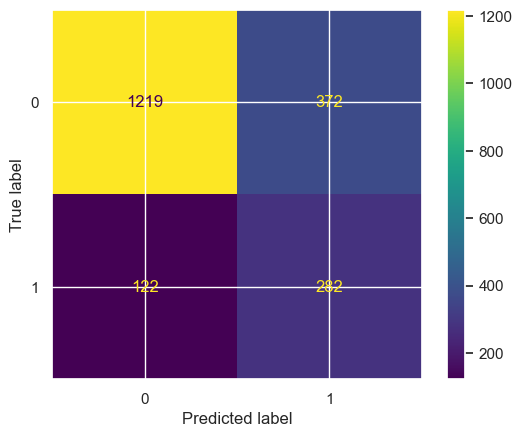

train f1 score:

0.753
test f1 score:

0.5331


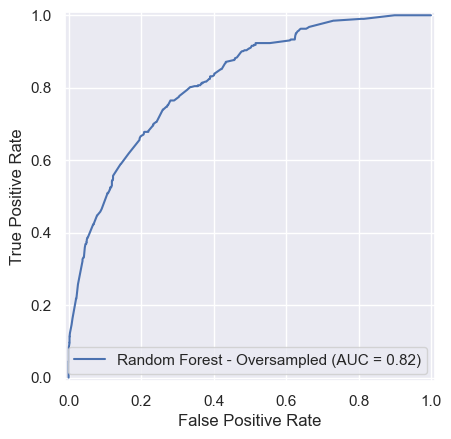

Model Class_weight  AUC-Train  \
0               DummyClassifier - Imbalanced          N/A       0.50   
0                       Dummy - Undersampled          N/A       0.50   
0                        Dummy - Oversampled          N/A       0.50   
0                              Dummy - Smote          N/A       0.50   
0                            LR - Imbalanced          N/A       0.68   
0                          LR - Undersamples     balanced       0.69   
0                           LR - Oversamples          N/A       0.68   
0                                 LR - Smote          N/A       0.68   
0                      LR - Balanced Weights     Balanced       0.68   
0  RandomForest - Imbalanced - RandomizedSCV          N/A       0.81   
0                RandomForest - Undersamples          N/A       0.82   
0                Random Forest - Oversampled          N/A       0.83   

   AUC-Test  train_recall_pos_class  test_recall_pos_class  \
0      0.50                    0.00                   0.00   
0      0.50                    0.00                   0.00   
0      0.50                    0.00                   0.00   
0      0.50                    0.00                   0.00   
0      0.69                    0.00                   0.00   
0      0.69                    0.60                   0.64   
0      0.69                    0.65                   0.68   
0      0.69                    0.64                   0.65   
0      0.69                    0.64                   0.66   
0      0.82                    0.33                   0.33   
0      0.82                    0.73                   0.72   
0      0.82                    0.74                   0.70   

   train_accuracy_score  test_accuracy_score  train_f1_score  test_f1_score  \
0                  0.80                 0.80            0.00           0.00   
0                  0.50                 0.80            0.00           0.00   
0                  0.50                 0.80            0.00           0.00   
0                  0.50                 0.80            0.00           0.00   
0                  0.80                 0.80            0.00           0.00   
0                  0.64                 0.65            0.62           0.42   
0                  0.64                 0.63            0.65           0.42   
0                  0.63                 0.62            0.63           0.41   
0                  0.63                 0.62            0.41           0.41   
0                  0.84                 0.83            0.45           0.44   
0                  0.76                 0.74            0.76           0.52   
0                  0.76                 0.75            0.75           0.53   

   CrossVal_Mean(Accuracy)  CrossVal_Mean(F1_score)  CrossVal1(f1)  \
0                     0.80                     0.00           0.00   
0                     0.50                     0.00           0.00   
0                     0.50                     0.13           0.00   
0                     0.50                     0.13           0.00   
0                     0.80                     0.00           0.00   
0                     0.63                     0.62           0.61   
0                     0.64                     0.64           0.62   
0                     0.63                     0.63           0.62   
0                     0.63                     0.41           0.41   
0                     0.83                     0.43           0.41   
0                     0.74                     0.73           0.71   
0                     0.75                     0.75           0.74   

   CrossVal2(f1)  CrossVal3(f1)  CrossVal4(f1)  CrossVal5(f1)  
0           0.00           0.00           0.00           0.00  
0           0.00           0.00           0.00           0.00  
0           0.00           0.00           0.00           0.67  
0           0.00           0.00           0.00           0.67  
0           0.00           0.00     

In [46]:
rf_over = RandomForestClassifier(bootstrap=False, max_depth=6, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=50, random_state=1)

next_model = model_results("Random Forest - Oversampled", X_over_tr, y_over_tr, X_over_te, y_test, \
                           rf_over, 5, Class_weight="N/A" )

All_Models = pd.concat([All_Models, next_model])

All_Models

### Model 13: Random Forest classifier based on SMOTE dataset

Classification_report - TEST SET:

              precision    recall  f1-score   support

           0       0.91      0.77      0.83      1591
           1       0.44      0.69      0.53       404

    accuracy                           0.76      1995
   macro avg       0.67      0.73      0.68      1995
weighted avg       0.81      0.76      0.77      1995



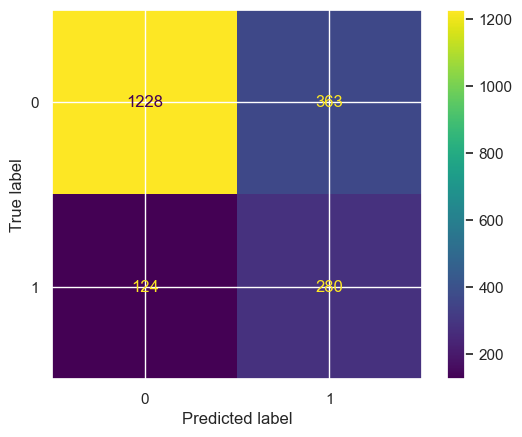

train f1 score:

0.7455
test f1 score:

0.5349


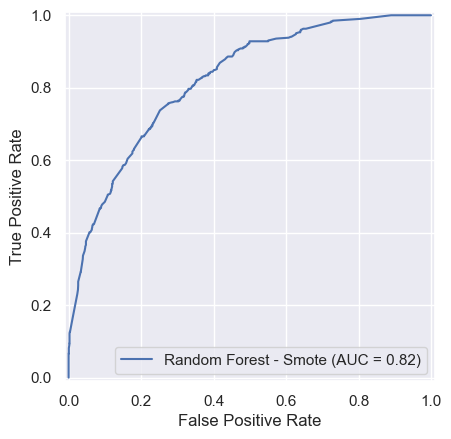

Model Class_weight  AUC-Train  \
0               DummyClassifier - Imbalanced          N/A       0.50   
0                       Dummy - Undersampled          N/A       0.50   
0                        Dummy - Oversampled          N/A       0.50   
0                              Dummy - Smote          N/A       0.50   
0                            LR - Imbalanced          N/A       0.68   
0                          LR - Undersamples     balanced       0.69   
0                           LR - Oversamples          N/A       0.68   
0                                 LR - Smote          N/A       0.68   
0                      LR - Balanced Weights     Balanced       0.68   
0  RandomForest - Imbalanced - RandomizedSCV          N/A       0.81   
0                RandomForest - Undersamples          N/A       0.82   
0                Random Forest - Oversampled          N/A       0.83   
0                      Random Forest - Smote          N/A       0.82   

   AUC-Test  train_recall_pos_class  test_recall_pos_class  \
0      0.50                    0.00                   0.00   
0      0.50                    0.00                   0.00   
0      0.50                    0.00                   0.00   
0      0.50                    0.00                   0.00   
0      0.69                    0.00                   0.00   
0      0.69                    0.60                   0.64   
0      0.69                    0.65                   0.68   
0      0.69                    0.64                   0.65   
0      0.69                    0.64                   0.66   
0      0.82                    0.33                   0.33   
0      0.82                    0.73                   0.72   
0      0.82                    0.74                   0.70   
0      0.82                    0.73                   0.69   

   train_accuracy_score  test_accuracy_score  train_f1_score  test_f1_score  \
0                  0.80                 0.80            0.00           0.00   
0                  0.50                 0.80            0.00           0.00   
0                  0.50                 0.80            0.00           0.00   
0                  0.50                 0.80            0.00           0.00   
0                  0.80                 0.80            0.00           0.00   
0                  0.64                 0.65            0.62           0.42   
0                  0.64                 0.63            0.65           0.42   
0                  0.63                 0.62            0.63           0.41   
0                  0.63                 0.62            0.41           0.41   
0                  0.84                 0.83            0.45           0.44   
0                  0.76                 0.74            0.76           0.52   
0                  0.76                 0.75            0.75           0.53   
0                  0.75                 0.76            0.75           0.53   

   CrossVal_Mean(Accuracy)  CrossVal_Mean(F1_score)  CrossVal1(f1)  \
0                     0.80                     0.00           0.00   
0                     0.50                     0.00           0.00   
0                     0.50                     0.13           0.00   
0                     0.50                     0.13           0.00   
0                     0.80                     0.00           0.00   
0                     0.63                     0.62           0.61   
0                     0.64                     0.64           0.62   
0                     0.63                     0.63           0.62   
0                     0.63                     0.41           0.41   
0                     0.83                     0.43           0.41   
0                     0.74                     0.73           0.71   
0                     0.75                     0.75           0.74   
0                     0.74                     0.74           0.72   

   CrossVal2(f1)  CrossVal3(f1)  CrossVal4(f1)  CrossVal5(f1)  
0        

In [47]:
rf_smote = RandomForestClassifier(bootstrap=False, max_depth=6, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=50, random_state=1)

next_model = model_results("Random Forest - Smote", X_smote_tr, y_smote_tr, X_smote_te, y_test, \
                           rf_smote , 5, Class_weight="N/A" )

All_Models = pd.concat([All_Models, next_model])

All_Models

### Model 14: Random Forest Classifier based on undersamples Dataset- RandomizedSearchCV

In [48]:
params = {
    'n_estimators':[50,100,130],
    'max_depth': [4,5,6,11],
    'min_samples_split': [2, 3, 5],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'criterion':['entropy','gini']
}
rf_us = RandomForestClassifier()
rfc = RandomizedSearchCV(estimator=rf_us, param_distributions=params, n_iter=100, cv=5, verbose=2, random_state=1, n_jobs=-1)

In [49]:
rfc.fit(X_under_tr,y_under_tr)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['entropy', 'gini'],
                                        'max_depth': [4, 5, 6, 11],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 3, 5],
                                        'n_estimators': [50, 100, 130]},
                   random_state=1, verbose=2)

In [50]:
rfc.best_params_

{'n_estimators': 130,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 6,
 'criterion': 'gini',
 'bootstrap': True}

In [51]:
rfc.best_score_

0.7476780185758514

In [52]:
rfc_best = rfc.best_estimator_

In [53]:
rfc_best.fit(X_under_tr,y_under_tr)

RandomForestClassifier(max_depth=6, n_estimators=130)

Classification_report - TEST SET:

              precision    recall  f1-score   support

           0       0.91      0.75      0.82      1591
           1       0.42      0.72      0.53       404

    accuracy                           0.74      1995
   macro avg       0.67      0.73      0.68      1995
weighted avg       0.81      0.74      0.76      1995



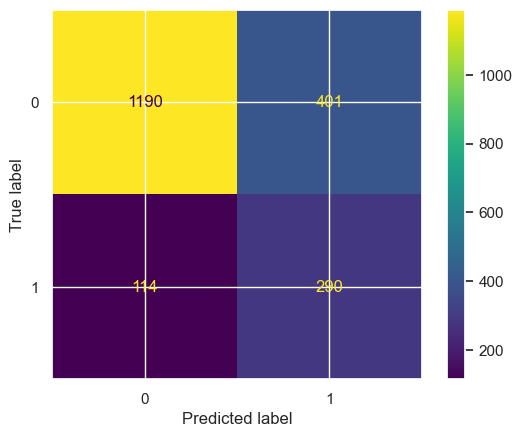

train f1 score:

0.7582
test f1 score:

0.5297


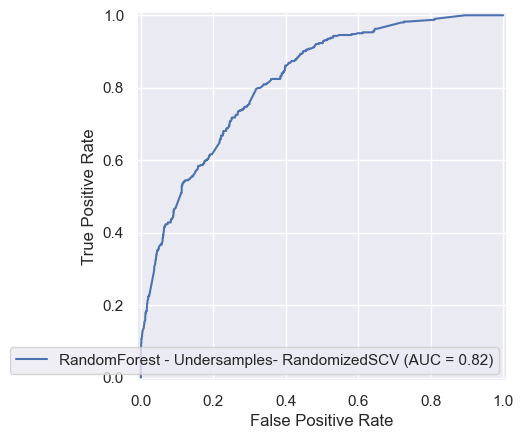

Model Class_weight  AUC-Train  \
0                DummyClassifier - Imbalanced          N/A       0.50   
0                        Dummy - Undersampled          N/A       0.50   
0                         Dummy - Oversampled          N/A       0.50   
0                               Dummy - Smote          N/A       0.50   
0                             LR - Imbalanced          N/A       0.68   
0                           LR - Undersamples     balanced       0.69   
0                            LR - Oversamples          N/A       0.68   
0                                  LR - Smote          N/A       0.68   
0                       LR - Balanced Weights     Balanced       0.68   
0   RandomForest - Imbalanced - RandomizedSCV          N/A       0.81   
0                 RandomForest - Undersamples          N/A       0.82   
0                 Random Forest - Oversampled          N/A       0.83   
0                       Random Forest - Smote          N/A       0.82   
0  RandomForest - Undersamples- RandomizedSCV          N/A       0.82   

   AUC-Test  train_recall_pos_class  test_recall_pos_class  \
0      0.50                    0.00                   0.00   
0      0.50                    0.00                   0.00   
0      0.50                    0.00                   0.00   
0      0.50                    0.00                   0.00   
0      0.69                    0.00                   0.00   
0      0.69                    0.60                   0.64   
0      0.69                    0.65                   0.68   
0      0.69                    0.64                   0.65   
0      0.69                    0.64                   0.66   
0      0.82                    0.33                   0.33   
0      0.82                    0.73                   0.72   
0      0.82                    0.74                   0.70   
0      0.82                    0.73                   0.69   
0      0.82                    0.74                   0.72   

   train_accuracy_score  test_accuracy_score  train_f1_score  test_f1_score  \
0                  0.80                 0.80            0.00           0.00   
0                  0.50                 0.80            0.00           0.00   
0                  0.50                 0.80            0.00           0.00   
0                  0.50                 0.80            0.00           0.00   
0                  0.80                 0.80            0.00           0.00   
0                  0.64                 0.65            0.62           0.42   
0                  0.64                 0.63            0.65           0.42   
0                  0.63                 0.62            0.63           0.41   
0                  0.63                 0.62            0.41           0.41   
0                  0.84                 0.83            0.45           0.44   
0                  0.76                 0.74            0.76           0.52   
0                  0.76                 0.75            0.75           0.53   
0                  0.75                 0.76            0.75           0.53   
0                  0.77                 0.74            0.76           0.53   

   CrossVal_Mean(Accuracy)  CrossVal_Mean(F1_score)  CrossVal1(f1)  \
0                     0.80                     0.00           0.00   
0                     0.50                     0.00           0.00   
0                     0.50                     0.13           0.00   
0                     0.50                     0.13           0.00   
0                     0.80                     0.00           0.00   
0                     0.63                     0.62           0.61   
0                     0.64                     0.64           0.62   
0                     0.63                     0.63           0.62   
0                     0.63                     0.41           0.41   
0                     0.83                     0.43           0.41   
0                     0.74                     0.73      

In [54]:
next_model = model_results("RandomForest - Undersamples- RandomizedSCV", X_under_tr, y_under_tr, X_under_te, y_test, \
                           rfc_best, 5, Class_weight="N/A" )

All_Models = pd.concat([All_Models, next_model])

All_Models

### Model 15- Logistic Regression based on Smote Dataset - RandomizedSearchCV

In [55]:
param={
        "penalty": ["l1", "l2","elasticnet"],
        'C':[1,1.05,.05,2],
        'class_weight':[None,'balanced',{0:1,1:4}],
        'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}
LR_smote=LogisticRegression()
model = RandomizedSearchCV(LR_smote,param,cv=5,random_state=1)

In [56]:
model.fit(X_smote_tr, y_smote_tr)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [1, 1.05, 0.05, 2],
                                        'class_weight': [None, 'balanced',
                                                         {0: 1, 1: 4}],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['lbfgs', 'liblinear',
                                                   'newton-cg',
                                                   'newton-cholesky', 'sag',
                                                   'saga']},
                   random_state=1)

In [57]:
model.best_params_

{'solver': 'lbfgs', 'penalty': 'l2', 'class_weight': 'balanced', 'C': 1.05}

In [58]:
model.best_score_

0.6322292374339655

In [59]:
LR_best=model.best_estimator_

Classification_report - TEST SET:

              precision    recall  f1-score   support

           0       0.87      0.62      0.72      1591
           1       0.30      0.65      0.41       404

    accuracy                           0.62      1995
   macro avg       0.59      0.63      0.57      1995
weighted avg       0.76      0.62      0.66      1995



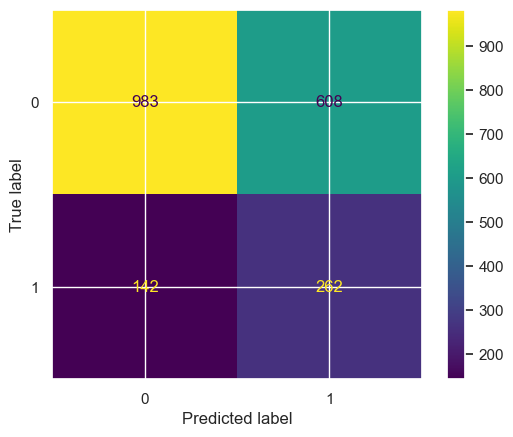

train f1 score:

0.6346
test f1 score:

0.4113


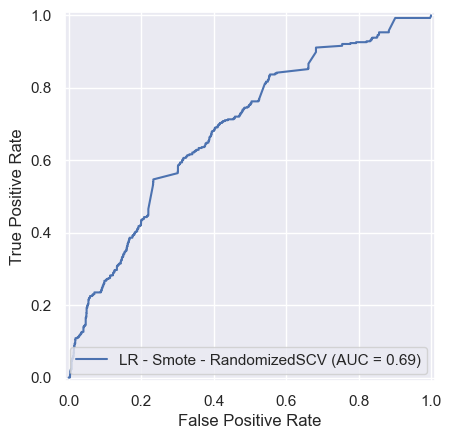

Model Class_weight  AUC-Train  \
0                DummyClassifier - Imbalanced          N/A       0.50   
0                        Dummy - Undersampled          N/A       0.50   
0                         Dummy - Oversampled          N/A       0.50   
0                               Dummy - Smote          N/A       0.50   
0                             LR - Imbalanced          N/A       0.68   
0                           LR - Undersamples     balanced       0.69   
0                            LR - Oversamples          N/A       0.68   
0                                  LR - Smote          N/A       0.68   
0                       LR - Balanced Weights     Balanced       0.68   
0   RandomForest - Imbalanced - RandomizedSCV          N/A       0.81   
0                 RandomForest - Undersamples          N/A       0.82   
0                 Random Forest - Oversampled          N/A       0.83   
0                       Random Forest - Smote          N/A       0.82   
0  RandomForest - Undersamples- RandomizedSCV          N/A       0.82   
0                  LR - Smote - RandomizedSCV         None       0.68   

   AUC-Test  train_recall_pos_class  test_recall_pos_class  \
0      0.50                    0.00                   0.00   
0      0.50                    0.00                   0.00   
0      0.50                    0.00                   0.00   
0      0.50                    0.00                   0.00   
0      0.69                    0.00                   0.00   
0      0.69                    0.60                   0.64   
0      0.69                    0.65                   0.68   
0      0.69                    0.64                   0.65   
0      0.69                    0.64                   0.66   
0      0.82                    0.33                   0.33   
0      0.82                    0.73                   0.72   
0      0.82                    0.74                   0.70   
0      0.82                    0.73                   0.69   
0      0.82                    0.74                   0.72   
0      0.69                    0.64                   0.65   

   train_accuracy_score  test_accuracy_score  train_f1_score  test_f1_score  \
0                  0.80                 0.80            0.00           0.00   
0                  0.50                 0.80            0.00           0.00   
0                  0.50                 0.80            0.00           0.00   
0                  0.50                 0.80            0.00           0.00   
0                  0.80                 0.80            0.00           0.00   
0                  0.64                 0.65            0.62           0.42   
0                  0.64                 0.63            0.65           0.42   
0                  0.63                 0.62            0.63           0.41   
0                  0.63                 0.62            0.41           0.41   
0                  0.84                 0.83            0.45           0.44   
0                  0.76                 0.74            0.76           0.52   
0                  0.76                 0.75            0.75           0.53   
0                  0.75                 0.76            0.75           0.53   
0                  0.77                 0.74            0.76           0.53   
0                  0.63                 0.62            0.63           0.41   

   CrossVal_Mean(Accuracy)  CrossVal_Mean(F1_score)  CrossVal1(f1)  \
0                     0.80                     0.00           0.00   
0                     0.50                     0.00           0.00   
0                     0.50                     0.13           0.00   
0                     0.50                     0.13           0.00   
0                     0.80                     0.00           0.00   
0                     0.63                     0.62           0.61   
0                     0.64                     0.64           0.62   
0                     0.63                     0.63  

In [60]:
next_model = model_results("LR - Smote - RandomizedSCV", X_smote_tr, y_smote_tr, X_smote_te, y_test, \
                           LR_best, 5, Class_weight=None )

All_Models = pd.concat([All_Models, next_model])

All_Models

### Model 16 : XGBoost based on Imbalanced data 

Classification_report - TEST SET:

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      1591
           1       0.60      0.37      0.46       404

    accuracy                           0.82      1995
   macro avg       0.73      0.65      0.68      1995
weighted avg       0.80      0.82      0.81      1995



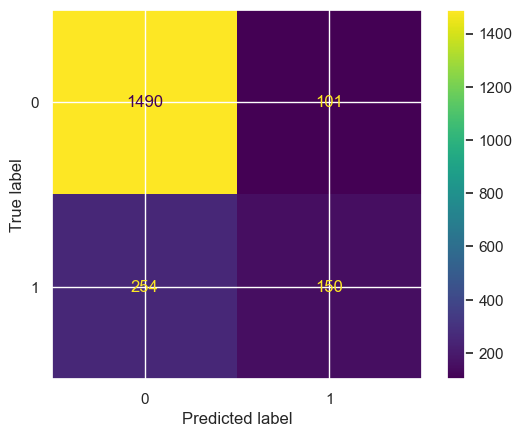

train f1 score:

0.5581
test f1 score:

0.458


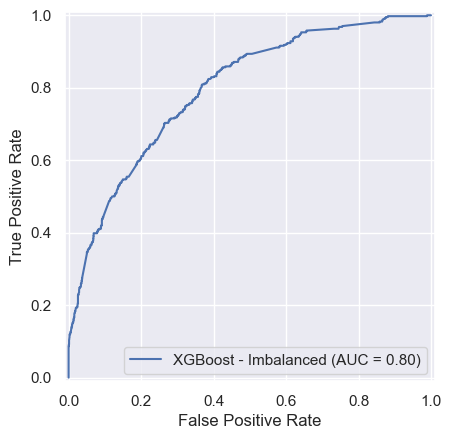

Model Class_weight  AUC-Train  \
0                DummyClassifier - Imbalanced          N/A       0.50   
0                        Dummy - Undersampled          N/A       0.50   
0                         Dummy - Oversampled          N/A       0.50   
0                               Dummy - Smote          N/A       0.50   
0                             LR - Imbalanced          N/A       0.68   
0                           LR - Undersamples     balanced       0.69   
0                            LR - Oversamples          N/A       0.68   
0                                  LR - Smote          N/A       0.68   
0                       LR - Balanced Weights     Balanced       0.68   
0   RandomForest - Imbalanced - RandomizedSCV          N/A       0.81   
0                 RandomForest - Undersamples          N/A       0.82   
0                 Random Forest - Oversampled          N/A       0.83   
0                       Random Forest - Smote          N/A       0.82   
0  RandomForest - Undersamples- RandomizedSCV          N/A       0.82   
0                  LR - Smote - RandomizedSCV         None       0.68   
0                        XGBoost - Imbalanced          N/A       0.78   

   AUC-Test  train_recall_pos_class  test_recall_pos_class  \
0      0.50                    0.00                   0.00   
0      0.50                    0.00                   0.00   
0      0.50                    0.00                   0.00   
0      0.50                    0.00                   0.00   
0      0.69                    0.00                   0.00   
0      0.69                    0.60                   0.64   
0      0.69                    0.65                   0.68   
0      0.69                    0.64                   0.65   
0      0.69                    0.64                   0.66   
0      0.82                    0.33                   0.33   
0      0.82                    0.73                   0.72   
0      0.82                    0.74                   0.70   
0      0.82                    0.73                   0.69   
0      0.82                    0.74                   0.72   
0      0.69                    0.64                   0.65   
0      0.80                    0.45                   0.37   

   train_accuracy_score  test_accuracy_score  train_f1_score  test_f1_score  \
0                  0.80                 0.80            0.00           0.00   
0                  0.50                 0.80            0.00           0.00   
0                  0.50                 0.80            0.00           0.00   
0                  0.50                 0.80            0.00           0.00   
0                  0.80                 0.80            0.00           0.00   
0                  0.64                 0.65            0.62           0.42   
0                  0.64                 0.63            0.65           0.42   
0                  0.63                 0.62            0.63           0.41   
0                  0.63                 0.62            0.41           0.41   
0                  0.84                 0.83            0.45           0.44   
0                  0.76                 0.74            0.76           0.52   
0                  0.76                 0.75            0.75           0.53   
0                  0.75                 0.76            0.75           0.53   
0                  0.77                 0.74            0.76           0.53   
0                  0.63                 0.62            0.63           0.41   
0                  0.86                 0.82            0.56           0.46   

   CrossVal_Mean(Accuracy)  CrossVal_Mean(F1_score)  CrossVal1(f1)  \
0                     0.80                     0.00           0.00   
0                     0.50                     0.00           0.00   
0                     0.50                     0.13           0.00   
0                     0.50                     0.13           0.00   
0                     0.80                     0.

In [61]:
XGB = xgboost.XGBClassifier(random_state=1)
next_model = model_results("XGBoost - Imbalanced", X_imb_tr, y_imb_tr, X_imb_te, y_imb_te, \
                           XGB, 5, Class_weight="N/A" )

All_Models = pd.concat([All_Models, next_model])
All_Models

### Model 17 : XGBoost based on Undersamples Dataset

Classification_report - TEST SET:

              precision    recall  f1-score   support

           0       0.91      0.69      0.79      1591
           1       0.38      0.74      0.50       404

    accuracy                           0.70      1995
   macro avg       0.65      0.72      0.65      1995
weighted avg       0.81      0.70      0.73      1995



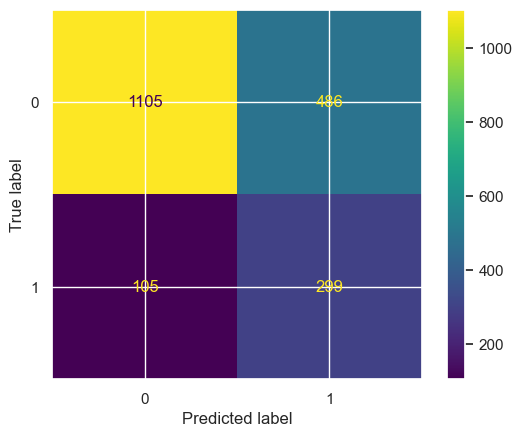

train f1 score:

0.8285
test f1 score:

0.5029


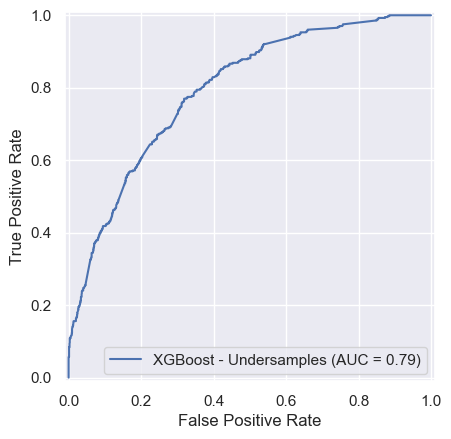

Model Class_weight  AUC-Train  \
0                DummyClassifier - Imbalanced          N/A       0.50   
0                        Dummy - Undersampled          N/A       0.50   
0                         Dummy - Oversampled          N/A       0.50   
0                               Dummy - Smote          N/A       0.50   
0                             LR - Imbalanced          N/A       0.68   
0                           LR - Undersamples     balanced       0.69   
0                            LR - Oversamples          N/A       0.68   
0                                  LR - Smote          N/A       0.68   
0                       LR - Balanced Weights     Balanced       0.68   
0   RandomForest - Imbalanced - RandomizedSCV          N/A       0.81   
0                 RandomForest - Undersamples          N/A       0.82   
0                 Random Forest - Oversampled          N/A       0.83   
0                       Random Forest - Smote          N/A       0.82   
0  RandomForest - Undersamples- RandomizedSCV          N/A       0.82   
0                  LR - Smote - RandomizedSCV         None       0.68   
0                        XGBoost - Imbalanced          N/A       0.78   
0                      XGBoost - Undersamples          N/A       0.80   

   AUC-Test  train_recall_pos_class  test_recall_pos_class  \
0      0.50                    0.00                   0.00   
0      0.50                    0.00                   0.00   
0      0.50                    0.00                   0.00   
0      0.50                    0.00                   0.00   
0      0.69                    0.00                   0.00   
0      0.69                    0.60                   0.64   
0      0.69                    0.65                   0.68   
0      0.69                    0.64                   0.65   
0      0.69                    0.64                   0.66   
0      0.82                    0.33                   0.33   
0      0.82                    0.73                   0.72   
0      0.82                    0.74                   0.70   
0      0.82                    0.73                   0.69   
0      0.82                    0.74                   0.72   
0      0.69                    0.64                   0.65   
0      0.80                    0.45                   0.37   
0      0.79                    0.83                   0.74   

   train_accuracy_score  test_accuracy_score  train_f1_score  test_f1_score  \
0                  0.80                 0.80            0.00           0.00   
0                  0.50                 0.80            0.00           0.00   
0                  0.50                 0.80            0.00           0.00   
0                  0.50                 0.80            0.00           0.00   
0                  0.80                 0.80            0.00           0.00   
0                  0.64                 0.65            0.62           0.42   
0                  0.64                 0.63            0.65           0.42   
0                  0.63                 0.62            0.63           0.41   
0                  0.63                 0.62            0.41           0.41   
0                  0.84                 0.83            0.45           0.44   
0                  0.76                 0.74            0.76           0.52   
0                  0.76                 0.75            0.75           0.53   
0                  0.75                 0.76            0.75           0.53   
0                  0.77                 0.74            0.76           0.53   
0                  0.63                 0.62            0.63           0.41   
0                  0.86                 0.82            0.56           0.46   
0                  0.83                 0.70            0.83           0.50   

   CrossVal_Mean(Accuracy)  CrossVal_Mean(F1_score)  CrossVal1(f1)  \
0                     0.80                     0.00           0.00   
0                     0.50                   

In [62]:
next_model = model_results("XGBoost - Undersamples", X_under_tr, y_under_tr, X_under_te, y_test, \
                           XGB, 5, Class_weight="N/A" )

All_Models = pd.concat([All_Models, next_model])

All_Models

### Model 18 : XGBoost based on Oversampled dataset

Classification_report - TEST SET:

              precision    recall  f1-score   support

           0       0.90      0.76      0.82      1591
           1       0.41      0.65      0.50       404

    accuracy                           0.74      1995
   macro avg       0.65      0.71      0.66      1995
weighted avg       0.80      0.74      0.76      1995



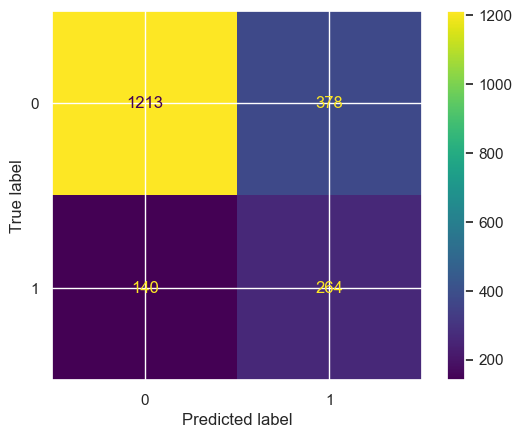

train f1 score:

0.831
test f1 score:

0.5048


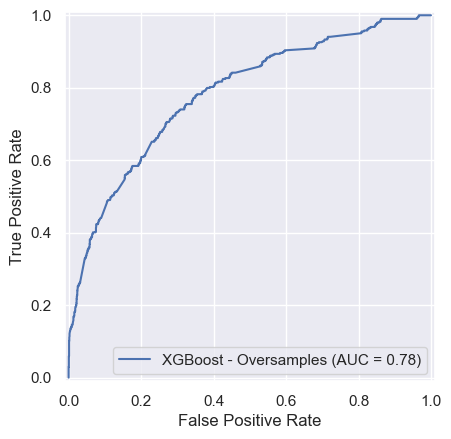

Model Class_weight  AUC-Train  \
0                DummyClassifier - Imbalanced          N/A       0.50   
0                        Dummy - Undersampled          N/A       0.50   
0                         Dummy - Oversampled          N/A       0.50   
0                               Dummy - Smote          N/A       0.50   
0                             LR - Imbalanced          N/A       0.68   
0                           LR - Undersamples     balanced       0.69   
0                            LR - Oversamples          N/A       0.68   
0                                  LR - Smote          N/A       0.68   
0                       LR - Balanced Weights     Balanced       0.68   
0   RandomForest - Imbalanced - RandomizedSCV          N/A       0.81   
0                 RandomForest - Undersamples          N/A       0.82   
0                 Random Forest - Oversampled          N/A       0.83   
0                       Random Forest - Smote          N/A       0.82   
0  RandomForest - Undersamples- RandomizedSCV          N/A       0.82   
0                  LR - Smote - RandomizedSCV         None       0.68   
0                        XGBoost - Imbalanced          N/A       0.78   
0                      XGBoost - Undersamples          N/A       0.80   
0                       XGBoost - Oversamples          N/A       0.87   

   AUC-Test  train_recall_pos_class  test_recall_pos_class  \
0      0.50                    0.00                   0.00   
0      0.50                    0.00                   0.00   
0      0.50                    0.00                   0.00   
0      0.50                    0.00                   0.00   
0      0.69                    0.00                   0.00   
0      0.69                    0.60                   0.64   
0      0.69                    0.65                   0.68   
0      0.69                    0.64                   0.65   
0      0.69                    0.64                   0.66   
0      0.82                    0.33                   0.33   
0      0.82                    0.73                   0.72   
0      0.82                    0.74                   0.70   
0      0.82                    0.73                   0.69   
0      0.82                    0.74                   0.72   
0      0.69                    0.64                   0.65   
0      0.80                    0.45                   0.37   
0      0.79                    0.83                   0.74   
0      0.78                    0.86                   0.65   

   train_accuracy_score  test_accuracy_score  train_f1_score  test_f1_score  \
0                  0.80                 0.80            0.00           0.00   
0                  0.50                 0.80            0.00           0.00   
0                  0.50                 0.80            0.00           0.00   
0                  0.50                 0.80            0.00           0.00   
0                  0.80                 0.80            0.00           0.00   
0                  0.64                 0.65            0.62           0.42   
0                  0.64                 0.63            0.65           0.42   
0                  0.63                 0.62            0.63           0.41   
0                  0.63                 0.62            0.41           0.41   
0                  0.84                 0.83            0.45           0.44   
0                  0.76                 0.74            0.76           0.52   
0                  0.76                 0.75            0.75           0.53   
0                  0.75                 0.76            0.75           0.53   
0                  0.77                 0.74            0.76           0.53   
0                  0.63                 0.62            0.63           0.41   
0                  0.86                 0.82            0.56           0.46   
0                  0.83                 0.70            0.83           0.50   
0                  0.83                 0.74       

In [63]:
next_model = model_results("XGBoost - Oversamples", X_over_tr, y_over_tr, X_over_te, y_test, \
                           XGB, 5, Class_weight="N/A" )

All_Models = pd.concat([All_Models, next_model])

All_Models

### Model 19 : XGBoost based on Undersamples Dataset - RandomizedSearchCV

In [64]:
p= {
    'n_estimators': [50, 100, 130, 150],
    'max_depth': [4, 5, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [1, 1.5, 2],
}
XGB = xgboost.XGBClassifier(random_state=1)
model1 = RandomizedSearchCV(XGB, p, cv=5, scoring='f1')
model1.fit(X_under_tr, y_under_tr)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=1, ...),
                   param_distributions={'gamma': [0, 0.1, 0.2],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [4, 5, 6, 8, 10],
                                        'n_estimators': [50, 100, 130, 150],
                                        'reg_alpha': [0, 0.1, 0.5],
                                        'reg_lambda': [1, 1.5, 2]},
                   scoring='f1')

In [65]:
model1.best_params_

{'reg_lambda': 2,
 'reg_alpha': 0,
 'n_estimators': 100,
 'max_depth': 6,
 'learning_rate': 0.1,
 'gamma': 0}

In [66]:
model1.best_score_

0.7363343566607823

In [67]:
Xgb_best=model1.best_estimator_
Xgb_best

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [68]:
Xgb_best.fit(X_under_tr, y_under_tr)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

Classification_report - TEST SET:

              precision    recall  f1-score   support

           0       0.92      0.70      0.80      1591
           1       0.39      0.75      0.51       404

    accuracy                           0.71      1995
   macro avg       0.65      0.73      0.65      1995
weighted avg       0.81      0.71      0.74      1995



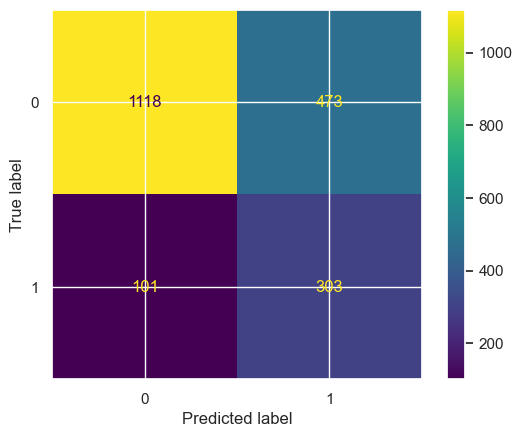

train f1 score:

0.7994
test f1 score:

0.5136


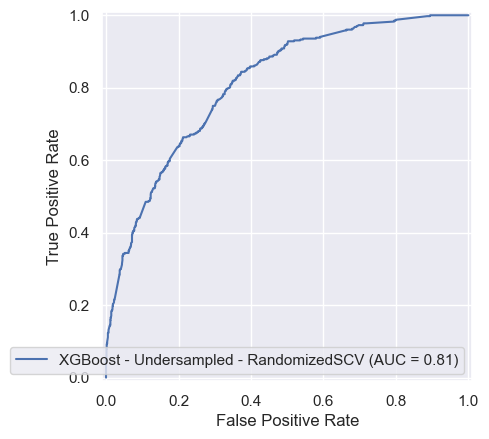

Model Class_weight  AUC-Train  \
0                DummyClassifier - Imbalanced          N/A       0.50   
0                        Dummy - Undersampled          N/A       0.50   
0                         Dummy - Oversampled          N/A       0.50   
0                               Dummy - Smote          N/A       0.50   
0                             LR - Imbalanced          N/A       0.68   
0                           LR - Undersamples     balanced       0.69   
0                            LR - Oversamples          N/A       0.68   
0                                  LR - Smote          N/A       0.68   
0                       LR - Balanced Weights     Balanced       0.68   
0   RandomForest - Imbalanced - RandomizedSCV          N/A       0.81   
0                 RandomForest - Undersamples          N/A       0.82   
0                 Random Forest - Oversampled          N/A       0.83   
0                       Random Forest - Smote          N/A       0.82   
0  RandomForest - Undersamples- RandomizedSCV          N/A       0.82   
0                  LR - Smote - RandomizedSCV         None       0.68   
0                        XGBoost - Imbalanced          N/A       0.78   
0                      XGBoost - Undersamples          N/A       0.80   
0                       XGBoost - Oversamples          N/A       0.87   
0      XGBoost - Undersampled - RandomizedSCV          N/A       0.81   

   AUC-Test  train_recall_pos_class  test_recall_pos_class  \
0      0.50                    0.00                   0.00   
0      0.50                    0.00                   0.00   
0      0.50                    0.00                   0.00   
0      0.50                    0.00                   0.00   
0      0.69                    0.00                   0.00   
0      0.69                    0.60                   0.64   
0      0.69                    0.65                   0.68   
0      0.69                    0.64                   0.65   
0      0.69                    0.64                   0.66   
0      0.82                    0.33                   0.33   
0      0.82                    0.73                   0.72   
0      0.82                    0.74                   0.70   
0      0.82                    0.73                   0.69   
0      0.82                    0.74                   0.72   
0      0.69                    0.64                   0.65   
0      0.80                    0.45                   0.37   
0      0.79                    0.83                   0.74   
0      0.78                    0.86                   0.65   
0      0.81                    0.80                   0.75   

   train_accuracy_score  test_accuracy_score  train_f1_score  test_f1_score  \
0                  0.80                 0.80            0.00           0.00   
0                  0.50                 0.80            0.00           0.00   
0                  0.50                 0.80            0.00           0.00   
0                  0.50                 0.80            0.00           0.00   
0                  0.80                 0.80            0.00           0.00   
0                  0.64                 0.65            0.62           0.42   
0                  0.64                 0.63            0.65           0.42   
0                  0.63                 0.62            0.63           0.41   
0                  0.63                 0.62            0.41           0.41   
0                  0.84                 0.83            0.45           0.44   
0                  0.76                 0.74            0.76           0.52   
0                  0.76                 0.75            0.75           0.53   
0                  0.75                 0.76            0.75           0.53   
0                  0.77                 0.74            0.76           0.53   
0                  0.63                 0.62            0.63           0.41   
0                  0.86                 0.82            0.56           0.4

In [69]:
next_model = model_results("XGBoost - Undersampled - RandomizedSCV", X_under_tr, y_under_tr, X_under_te, y_test, \
                           Xgb_best, 5, Class_weight="N/A" )

All_Models = pd.concat([All_Models, next_model])

All_Models

In [86]:
All_Models

Model Class_weight  AUC-Train  \
0                DummyClassifier - Imbalanced          N/A       0.50   
0                        Dummy - Undersampled          N/A       0.50   
0                         Dummy - Oversampled          N/A       0.50   
0                               Dummy - Smote          N/A       0.50   
0                             LR - Imbalanced          N/A       0.68   
0                           LR - Undersamples     balanced       0.69   
0                            LR - Oversamples          N/A       0.68   
0                                  LR - Smote          N/A       0.68   
0                       LR - Balanced Weights     Balanced       0.68   
0   RandomForest - Imbalanced - RandomizedSCV          N/A       0.81   
0                 RandomForest - Undersamples          N/A       0.82   
0                 Random Forest - Oversampled          N/A       0.83   
0                       Random Forest - Smote          N/A       0.82   
0  RandomForest - Undersamples- RandomizedSCV          N/A       0.82   
0                  LR - Smote - RandomizedSCV         None       0.68   
0                        XGBoost - Imbalanced          N/A       0.78   
0                      XGBoost - Undersamples          N/A       0.80   
0                       XGBoost - Oversamples          N/A       0.87   
0      XGBoost - Undersampled - RandomizedSCV          N/A       0.81   

   AUC-Test  train_recall_pos_class  test_recall_pos_class  \
0      0.50                    0.00                   0.00   
0      0.50                    0.00                   0.00   
0      0.50                    0.00                   0.00   
0      0.50                    0.00                   0.00   
0      0.69                    0.00                   0.00   
0      0.69                    0.60                   0.64   
0      0.69                    0.65                   0.68   
0      0.69                    0.64                   0.65   
0      0.69                    0.64                   0.66   
0      0.82                    0.33                   0.33   
0      0.82                    0.73                   0.72   
0      0.82                    0.74                   0.70   
0      0.82                    0.73                   0.69   
0      0.82                    0.74                   0.72   
0      0.69                    0.64                   0.65   
0      0.80                    0.45                   0.37   
0      0.79                    0.83                   0.74   
0      0.78                    0.86                   0.65   
0      0.81                    0.80                   0.75   

   train_accuracy_score  test_accuracy_score  train_f1_score  test_f1_score  \
0                  0.80                 0.80            0.00           0.00   
0                  0.50                 0.80            0.00           0.00   
0                  0.50                 0.80            0.00           0.00   
0                  0.50                 0.80            0.00           0.00   
0                  0.80                 0.80            0.00           0.00   
0                  0.64                 0.65            0.62           0.42   
0                  0.64                 0.63            0.65           0.42   
0                  0.63                 0.62            0.63           0.41   
0                  0.63                 0.62            0.41           0.41   
0                  0.84                 0.83            0.45           0.44   
0                  0.76                 0.74            0.76           0.52   
0                  0.76                 0.75            0.75           0.53   
0                  0.75                 0.76            0.75           0.53   
0                  0.77                 0.74            0.76           0.53   
0                  0.63                 0.62            0.63           0.41   
0                  0.86                 0.82            0.56           0.4

In [87]:
All_models_sorted=All_Models.sort_values(['test_recall_pos_class','train_recall_pos_class'],ascending=[False,False])
All_models_sorted

Model Class_weight  AUC-Train  \
0      XGBoost - Undersampled - RandomizedSCV          N/A       0.81   
0                      XGBoost - Undersamples          N/A       0.80   
0  RandomForest - Undersamples- RandomizedSCV          N/A       0.82   
0                 RandomForest - Undersamples          N/A       0.82   
0                 Random Forest - Oversampled          N/A       0.83   
0                       Random Forest - Smote          N/A       0.82   
0                            LR - Oversamples          N/A       0.68   
0                       LR - Balanced Weights     Balanced       0.68   
0                       XGBoost - Oversamples          N/A       0.87   
0                                  LR - Smote          N/A       0.68   
0                  LR - Smote - RandomizedSCV         None       0.68   
0                           LR - Undersamples     balanced       0.69   
0                        XGBoost - Imbalanced          N/A       0.78   
0   RandomForest - Imbalanced - RandomizedSCV          N/A       0.81   
0                DummyClassifier - Imbalanced          N/A       0.50   
0                        Dummy - Undersampled          N/A       0.50   
0                         Dummy - Oversampled          N/A       0.50   
0                               Dummy - Smote          N/A       0.50   
0                             LR - Imbalanced          N/A       0.68   

   AUC-Test  train_recall_pos_class  test_recall_pos_class  \
0      0.81                    0.80                   0.75   
0      0.79                    0.83                   0.74   
0      0.82                    0.74                   0.72   
0      0.82                    0.73                   0.72   
0      0.82                    0.74                   0.70   
0      0.82                    0.73                   0.69   
0      0.69                    0.65                   0.68   
0      0.69                    0.64                   0.66   
0      0.78                    0.86                   0.65   
0      0.69                    0.64                   0.65   
0      0.69                    0.64                   0.65   
0      0.69                    0.60                   0.64   
0      0.80                    0.45                   0.37   
0      0.82                    0.33                   0.33   
0      0.50                    0.00                   0.00   
0      0.50                    0.00                   0.00   
0      0.50                    0.00                   0.00   
0      0.50                    0.00                   0.00   
0      0.69                    0.00                   0.00   

   train_accuracy_score  test_accuracy_score  train_f1_score  test_f1_score  \
0                  0.80                 0.71            0.80           0.51   
0                  0.83                 0.70            0.83           0.50   
0                  0.77                 0.74            0.76           0.53   
0                  0.76                 0.74            0.76           0.52   
0                  0.76                 0.75            0.75           0.53   
0                  0.75                 0.76            0.75           0.53   
0                  0.64                 0.63            0.65           0.42   
0                  0.63                 0.62            0.41           0.41   
0                  0.83                 0.74            0.83           0.50   
0                  0.63                 0.62            0.63           0.41   
0                  0.63                 0.62            0.63           0.41   
0                  0.64                 0.65            0.62           0.42   
0                  0.86                 0.82            0.56           0.46   
0                  0.84                 0.83            0.45           0.44   
0                  0.80                 0.80            0.00           0.00   
0                  0.50                 0.80            0.00           0.0

In [88]:
All_models_sorted.index= range(1, len(All_models_sorted) + 1)
All_models_sorted

Model Class_weight  AUC-Train  \
1       XGBoost - Undersampled - RandomizedSCV          N/A       0.81   
2                       XGBoost - Undersamples          N/A       0.80   
3   RandomForest - Undersamples- RandomizedSCV          N/A       0.82   
4                  RandomForest - Undersamples          N/A       0.82   
5                  Random Forest - Oversampled          N/A       0.83   
6                        Random Forest - Smote          N/A       0.82   
7                             LR - Oversamples          N/A       0.68   
8                        LR - Balanced Weights     Balanced       0.68   
9                        XGBoost - Oversamples          N/A       0.87   
10                                  LR - Smote          N/A       0.68   
11                  LR - Smote - RandomizedSCV         None       0.68   
12                           LR - Undersamples     balanced       0.69   
13                        XGBoost - Imbalanced          N/A       0.78   
14   RandomForest - Imbalanced - RandomizedSCV          N/A       0.81   
15                DummyClassifier - Imbalanced          N/A       0.50   
16                        Dummy - Undersampled          N/A       0.50   
17                         Dummy - Oversampled          N/A       0.50   
18                               Dummy - Smote          N/A       0.50   
19                             LR - Imbalanced          N/A       0.68   

    AUC-Test  train_recall_pos_class  test_recall_pos_class  \
1       0.81                    0.80                   0.75   
2       0.79                    0.83                   0.74   
3       0.82                    0.74                   0.72   
4       0.82                    0.73                   0.72   
5       0.82                    0.74                   0.70   
6       0.82                    0.73                   0.69   
7       0.69                    0.65                   0.68   
8       0.69                    0.64                   0.66   
9       0.78                    0.86                   0.65   
10      0.69                    0.64                   0.65   
11      0.69                    0.64                   0.65   
12      0.69                    0.60                   0.64   
13      0.80                    0.45                   0.37   
14      0.82                    0.33                   0.33   
15      0.50                    0.00                   0.00   
16      0.50                    0.00                   0.00   
17      0.50                    0.00                   0.00   
18      0.50                    0.00                   0.00   
19      0.69                    0.00                   0.00   

    train_accuracy_score  test_accuracy_score  train_f1_score  test_f1_score  \
1                   0.80                 0.71            0.80           0.51   
2                   0.83                 0.70            0.83           0.50   
3                   0.77                 0.74            0.76           0.53   
4                   0.76                 0.74            0.76           0.52   
5                   0.76                 0.75            0.75           0.53   
6                   0.75                 0.76            0.75           0.53   
7                   0.64                 0.63            0.65           0.42   
8                   0.63                 0.62            0.41           0.41   
9                   0.83                 0.74            0.83           0.50   
10                  0.63                 0.62            0.63           0.41   
11                  0.63                 0.62            0.63           0.41   
12                  0.64                 0.65            0.62           0.42   
13                  0.86                 0.82            0.56           0.46   
14                  0.84                 0.83            0.45           0.44   
15                  0.80                 0.80            0.00           0.00   
16                 

In [89]:
Top_models = All_models_sorted[(All_models_sorted['test_recall_pos_class']>=.70) & (All_models_sorted['train_recall_pos_class']>=.70)]

In [90]:
Top_models

Model Class_weight  AUC-Train  \
1      XGBoost - Undersampled - RandomizedSCV          N/A       0.81   
2                      XGBoost - Undersamples          N/A       0.80   
3  RandomForest - Undersamples- RandomizedSCV          N/A       0.82   
4                 RandomForest - Undersamples          N/A       0.82   
5                 Random Forest - Oversampled          N/A       0.83   

   AUC-Test  train_recall_pos_class  test_recall_pos_class  \
1      0.81                    0.80                   0.75   
2      0.79                    0.83                   0.74   
3      0.82                    0.74                   0.72   
4      0.82                    0.73                   0.72   
5      0.82                    0.74                   0.70   

   train_accuracy_score  test_accuracy_score  train_f1_score  test_f1_score  \
1                  0.80                 0.71            0.80           0.51   
2                  0.83                 0.70            0.83           0.50   
3                  0.77                 0.74            0.76           0.53   
4                  0.76                 0.74            0.76           0.52   
5                  0.76                 0.75            0.75           0.53   

   CrossVal_Mean(Accuracy)  CrossVal_Mean(F1_score)  CrossVal1(f1)  \
1                     0.74                     0.74           0.71   
2                     0.73                     0.73           0.70   
3                     0.74                     0.74           0.72   
4                     0.74                     0.73           0.71   
5                     0.75                     0.75           0.74   

   CrossVal2(f1)  CrossVal3(f1)  CrossVal4(f1)  CrossVal5(f1)  
1           0.71           0.71           0.78           0.77  
2           0.72           0.71           0.75           0.75  
3           0.73           0.69           0.77           0.78  
4           0.73           0.69           0.74           0.77  
5           0.75           0.75           0.74           0.76

In [91]:
best_result_selected=Top_models[['Model','train_recall_pos_class','AUC-Test','test_recall_pos_class','test_accuracy_score']]
best_scores=best_result_selected.set_index('Model')

<Figure size 500x1000 with 0 Axes>

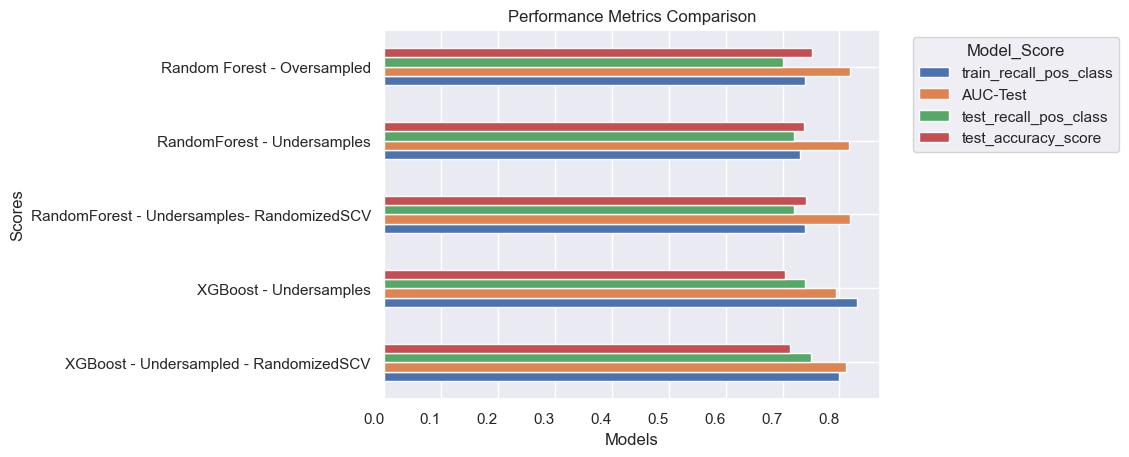

In [92]:
plt.figure(figsize=(5,10))
best_scores.plot.barh()
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Performance Metrics Comparison')
plt.xticks(ha='right')
plt.legend(title='Model_Score', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Model Evaluation:

**Based on the evaluation metrics, RandomForest - Undersampled - RandomizedSCV model and XGBoost - Undersampled - RandomizedSCV model seems to perform the best. Both have relatively high AUC scores, recall rates, accuracy scores, F1 scores, and cross-validation mean scores compared to other models. Out of these two RandomForest - Undersampled - RandomizedSCV Model is likely the best choice among the given options.**

### Recommendations:

**Intervention:** Leveraging the model's satisfactory recall rate, the bank should identify customers at risk of churn and offer personalized discounts or loyalty rewards to strengthen their relationship with the institution.<br>

**Increased Attention:** To reduce the probability of churn, the bank should focus on providing an enhanced customer experience, improving service quality, and addressing pain points for customers.<br>

**Communication:** Effective communication, including seeking customer feedback and keeping customers informed about business updates, can foster a closer connection with the organization and encourage customers to reconsider churning.<br>

**Focus on Inactive members:** The company could focus on enhancing the engagement and retention strategies for inactive members. This might include targeted communication campaigns, personalized offers, or incentives to encourage inactive members to become more active and engaged with the company's products or services.<br>

**Geographical Correlations:** Optimize product offerings based on geographical correlations, considering the higher account balances of customers from Germany, to enhance customer satisfaction and loyalty.

### Conclusion

The model demonstrates fair performance overall, with an accuracy rate indicating the correctness in its predictions. Additionally, the recall rate of positive class suggests that the model effectively identifies a significant portion of potential churner customers, allowing the bank to allocate resources more efficiently and proactively mitigate churn.<br>

While the predictive model produced encouraging findings, it is crucial to remember that customer churn is a complicated and dynamic process that is influenced by a variety of internal and external factors. In order to adjust to shifting consumer behavior and market conditions, regular monitoring and model development are advised.
